In [76]:
import pandas as pd
pd.set_option('display.max_colwidth', 0) #To display entire text content of a column
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
import joblib as joblib
import twint
import nest_asyncio
import spacy
import datetime as dt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

It has been noticed that city and geolocation information is usually missing for a lot of tweets. Hencewe will extract Tweets  by specifying both name of the city and geolocation in two separate instances. The dataframes from these instances will then be combined into one master df and duplicates removed.

# Ottawa

Lat, Long = 45.2502975,-76.0804344
<br>radius = 35 km

In [55]:
##########################by city name
#To allow for asynchronous loop
nest_asyncio.apply()
#Twint configs 
c = twint.Config()
#c.Search = "Shutterstock OR shutterstock"
#c.Geo = "45.2502975,-76.0804344, 40 km"
c.Near = "Ottawa"
#c.Min_retweets = 25
#c.Filter_retweets = True
c.Limit = 10000
c.Pandas = True 
twint.run.Search(c)
tweets_df_ottawa = twint.storage.panda.Tweets_df

1357194249939353601 2021-02-04 00:08:19 -0500 <FueledByRam> it’s been almost a year huh  https://t.co/8KRdM24xGj
1357194245917057027 2021-02-04 00:08:18 -0500 <JoannaKusmic> My car got towed this morning. At first I thought I completely lost it &amp; forgot where I was/parked. I called the towing number &amp; they said it was stolen, but then they realized it was just moved down the street by the Chapel, with a cute parking ticket sitting on top. Good day
1357194212467482626 2021-02-04 00:08:10 -0500 <MarcoPasa1919> @CosgunAbdulbaki @fatihtezcan Bunlari unutturamazsiniz  https://t.co/4eZtUunQHm
1357194185565229057 2021-02-04 00:08:03 -0500 <GlendaGravel21> @OnlyFansHero  https://t.co/VpK7rfsPyW  https://t.co/0bHKA13FI2
1357194180057989120 2021-02-04 00:08:02 -0500 <ottawaweather> Current Conditions: Partly Cloudy, -2.6°C  https://t.co/fQhg9YdkS4
1357194165575114753 2021-02-04 00:07:59 -0500 <alemiredesigns> Curb side pick up?..
1357194143085322240 2021-02-04 00:07:53 -0500 <ren_lessard

1357192577129283587 2021-02-04 00:01:40 -0500 <MarcoPasa1919> @CosgunAbdulbaki @fatihtezcan Biri 30 sene meclisi kapatir halkini maraba yapar ona hakan derler .. digeri cumhuriyet kurarbonu elestirirler .. akp kafasi.. akliniz anca hirsizliga calisiyor .. normal cok basit birseyi bile idraktan yoksunuz..
1357192562382168069 2021-02-04 00:01:36 -0500 <priina> Sou mestre em derrubar o telefone na cara 😑
1357192559383175169 2021-02-04 00:01:36 -0500 <RDK2112> 🎉 🎉 🎉 TIME FOR A NEW YOU!! 🎉 🎉🎉  Let us Keep 2021 going on the right foot. Let us get the proper sleep we need and also get our bodies working at peak performance. Let's Lose Weight And Feel Great Together  💥💥💥💥💥💥💥💥💥💥💥💥💥💥   https://t.co/zk1deYGR7H  https://t.co/uWJsyr1EoK
1357192536641699843 2021-02-04 00:01:30 -0500 <KoriRuff> @StevenDorsher @BrainAblaze Sending hugs. I program as well, and I am always questioning myself when I get stuck and take a while to figure out how to work through something: how much of the difficulty I am ha

1357190764149809153 2021-02-03 23:54:28 -0500 <OttawaPete> @qnp @lindseybartlett Still a lot better than bottle tokes.
1357190753215262723 2021-02-03 23:54:25 -0500 <djbip1986> @jmt_18325 @OttawaCitizen ... are the law. Sometimes they are unanimous, sometimes there are minority opinions or dissents. Often decisions of the lower courts were different. The law is not always clear, but someone needs to be tasked with adjudicating it. I think he’d be fine with charter decisions ...
1357190738233208832 2021-02-03 23:54:22 -0500 <CurmudgeonChief> no, YOUR mother!!
1357190734911258624 2021-02-03 23:54:21 -0500 <TCrosbie11> @JaneLebak @elffys @AITA_reddit One of my coworkers would do this on Valentine's Day. A rose for every co-worker sweet gesture and truly just out of friendship
1357190722525532162 2021-02-03 23:54:18 -0500 <xcottawa> @NCC_GatPark #xcski ( https://t.co/ctRPlMLX7f)  I started at P20 and took 50 to 55, and then skied the 56 back-country trail. Although ungroomed, the trail has

1357189098079977472 2021-02-03 23:47:50 -0500 <HCI_Ottawa> #DekhoApnaDesh  #IncredibleIndia
1357189080434561024 2021-02-03 23:47:46 -0500 <ren_lessard> @jon_bois Warren Cromartie baseball and Pierre Mondou hockey
1357189074206019585 2021-02-03 23:47:45 -0500 <Kaiye__> @amiii_nah Have you seen that clip of him in a lawyers outfit 😂 😂 😭
1357189074147299330 2021-02-03 23:47:45 -0500 <Appolon3> @PokerStars 5 of spades [pappo052] #5050Series
1357189070686937096 2021-02-03 23:47:44 -0500 <chay__babe> @theprivflamingo I eat cremini and bellos like 3 times a week and I feel betrayed lmao
1357189040106319872 2021-02-03 23:47:37 -0500 <Beingsmartbih> Je vais mourrir
1357189039560998912 2021-02-03 23:47:37 -0500 <MiscBillyCorgan> @Eve6 yee haw
1357189001439031296 2021-02-03 23:47:27 -0500 <dmeneilley> One more time: Fuck Trump and Miller.
1357188967091814402 2021-02-03 23:47:19 -0500 <MicaylahG> Chansleys Mummy said QAnon son isn't being served proper nom noms. I don't believe this idiot. Not eve

1357187648486580224 2021-02-03 23:42:05 -0500 <revmuse1> @elisekennedyuk @SinnovatorHQ 😂😂😂
1357187642320969730 2021-02-03 23:42:03 -0500 <Anthony_JNC> @doof_ebooks Elmo knows where you live
1357187637677858818 2021-02-03 23:42:02 -0500 <TopAlioune> 3 match 2 top 1🤝🤝🤝
1357187608946827264 2021-02-03 23:41:55 -0500 <ST_Phelan> @Lawsome_ When you play the game of thrones, you either win or you die. There is no middle ground  https://t.co/JGhLTc95tS
1357187605809553408 2021-02-03 23:41:55 -0500 <ConnorGrail> @RachelGrail yeah right I know youre probably watching tv right now
1357187604400242689 2021-02-03 23:41:54 -0500 <irajveer_singh7> @KanganaTeam He is not khalistani but tum ho modi ki janani means modi ki rakhel #KanganaPagalHai
1357187591582416902 2021-02-03 23:41:51 -0500 <virushuo> @yuxhuang 咱不带这么抬杠的吧？电台打电话都算上？这是“互联网上”的吗？还是凡是xxx over ip就都算互联网上了？
1357187582791200770 2021-02-03 23:41:49 -0500 <WaliFarah6> @SuheibAqil @TheVillaSomalia Madoobe looks like a sad and worried person. This i

1357186291532779521 2021-02-03 23:36:41 -0500 <corgidurst> Google is free
1357186290610036737 2021-02-03 23:36:41 -0500 <bradsucks> @mc_frontalot Will bug ya tomorrow
1357186290287079424 2021-02-03 23:36:41 -0500 <BalayiraKaadii> Mon meilleur mec
1357186284687613952 2021-02-03 23:36:40 -0500 <KoriRuff> @BrainAblaze The info doctors give epileptics.  (1) I never heard about SUDEP from my doctor(s), I heard about it from other epileptics. I have lost a friend to SUDEP. I’ve never even had a doctor check if I know about it. (2) So many don’t even mention epilepsy societies to newly diagnosed.
1357186280921194496 2021-02-03 23:36:39 -0500 <malazan79> @PNWWonderWoman Great Expectations. Grade 10 maybe? Loved it. There was also some Edgar Allen Poe, which I also loved.   Wasn’t particularly fond in the Sherlock Holmes - Hounds of the Baskervilles i think.   Wasn’t assigned but read Of Mice and Men, also loved.
1357186261107236869 2021-02-03 23:36:34 -0500 <tinkerbeckss> @ThiefCGT wait actual

1357185024655777794 2021-02-03 23:31:39 -0500 <AshDarji> #IStandWithFarmers   More Like  #IStandWithFoodProcessors
1357185018175578112 2021-02-03 23:31:38 -0500 <kansuze> @c_middlet 8 weeks, a gradual change.
1357185010147741698 2021-02-03 23:31:36 -0500 <PerlaHabchi> I’m watching the episode of parks and rec where they have a drill about their emergency response to the avian flu and just the fact that it’s an infectious disease is traumatizing me rn.... the things Covid has ruined for me...
1357185006469328897 2021-02-03 23:31:35 -0500 <LukaCopelli> @OGHAlienGTS  https://t.co/E747UZO59r
1357184976400375808 2021-02-03 23:31:28 -0500 <reignssupremacy> @PDaphneyy Good night! 😘
1357184965256044544 2021-02-03 23:31:25 -0500 <djbip1986> @jmt_18325 @OttawaCitizen ... how courts will interpret a law’s constitutionality, he’s arguing that the courts are effectively making the laws at that point. One might ask in such a case whether that should signal that perhaps courts should be deferring to 

1357183757506260994 2021-02-03 23:26:37 -0500 <Dragons_Quest> @CanesGirl1999 Must be talking about the Corona vaccine lol
1357183722672504834 2021-02-03 23:26:29 -0500 <KuochSJ> @theJagmeetSingh Is there a reason why you didn’t include Asians in your statement? Or are we immune to racism? #cdnpoli @AndreaHorwath
1357183720516632579 2021-02-03 23:26:28 -0500 <NarcoMonarchist> @l0gicth0t @olivesagan But the cool kind of prison
1357183706864246792 2021-02-03 23:26:25 -0500 <roxyfoxybaby69> #NewProfilePic  💋💋👅  https://t.co/YHZPFf0cwJ
1357183706767720451 2021-02-03 23:26:25 -0500 <itsyaboythom> WATCH OR WONDER...  THOM'S CONSPIRACIES PART. 4 (JFK &amp; ABRAHAM LINCOLN)  https://t.co/M14peLfMIn via @YouTube  https://t.co/6zaVXaDK5d
1357183690288336896 2021-02-03 23:26:21 -0500 <l0la0m0wa> Okay I’m in-love with these fashion
1357183681815851008 2021-02-03 23:26:19 -0500 <jose_machismo> @GuanoKing73 @Super70sSports  https://t.co/I7EnpuHhO5
1357183665273507841 2021-02-03 23:26:15 -0500 <rkenna

1357182572904775682 2021-02-03 23:21:55 -0500 <ottawasuncom> LILLEY: Trudeau turns to the equivalent of the vaccine food bank  https://t.co/xYG7uM3LLg  https://t.co/2Ei0H67lcU
1357182569637441536 2021-02-03 23:21:54 -0500 <kevraire17> @joseph_darren @ThatEricAlper Second Time Around by Shalamar
1357182556295344135 2021-02-03 23:21:51 -0500 <cowgoesmoooooo> @Stop_Trump20 I'm so ashamed to be that guy who likes leftover pizza for breakfast.
1357182547634098176 2021-02-03 23:21:49 -0500 <jace2020> @ceresminerve Il faudrait aussi faire une annonce comme ça pour Trudeau 😅.
1357182538821828612 2021-02-03 23:21:47 -0500 <LeanderCampbell> @ABM_Editor High res typically is not cheap. Your best free bet for viewing is Google Earth (or Google Maps), the image currently on display was acquired June 9, 2019. If you want to see something newer Planet has a 14-day free trial of 3-5m images  https://t.co/tzXDNJT5Gv @ambermac @Agridome  https://t.co/EujrIfZPp5
1357182533855805440 2021-02-03 23:21:45 -0

1357181420649734146 2021-02-03 23:17:20 -0500 <karanchahal315> @KanganaTeam  are u bitch of fucking asshole ... if u r not satisfied at home .. i wil send u air ticket for Nigeria 🇳🇬..
1357181414811271168 2021-02-03 23:17:19 -0500 <YOW55593869>  https://t.co/EE9bNQJUyi
1357181399082631169 2021-02-03 23:17:15 -0500 <yukiyuking_1996> ゴールドS持ちました
1357181393504198657 2021-02-03 23:17:14 -0500 <DioxideMusic> @FuntCaseUK I'm proud to say I've never bought one either. 😀
1357181393059643392 2021-02-03 23:17:13 -0500 <malazan79> @PNWWonderWoman I didn’t mind Oedipus Tex, except for forgetting my copy of Oedipus at Colonus for a test that you needed them both for a comparison, then Borrowing Antigone from someone, reading it on the fly during the exam, and then doing the actual exam.
1357181382930407424 2021-02-03 23:17:11 -0500 <NarcoMonarchist> @MarxIsMyNigga Man was recommending Parenti to his followers the other day. Pretty cool tbh.
1357181364819394561 2021-02-03 23:17:07 -0500 <Luccidor> @T

1357180417338671110 2021-02-03 23:13:21 -0500 <Rehzurek> @BleachBottleDBD that happens now. happened to me and my friend if ur right on hook its broken
1357180413169590272 2021-02-03 23:13:20 -0500 <alisonbflynn> Superb messages by a superb educator. Check out what @WorkentinChem has to say here.   #AcademicTwitter
1357180409331777545 2021-02-03 23:13:19 -0500 <Stefan_Keyes> On behalf of the adorable puppies: thank you 🙏🏾 #TheTejidoProject
1357180385856225283 2021-02-03 23:13:13 -0500 <reignssupremacy> @pourquoireigns No
1357180383821971456 2021-02-03 23:13:13 -0500 <KirkAndersonCda> @CaraBanksGC @JWMarriott @WMPhoenixOpen Regrettably Cara, as it relates to the Newark Airport, you ain’t seen anything yet
1357180323839307777 2021-02-03 23:12:59 -0500 <virushuo> @jordanschnyc @Yaqiu people always do other things while their listen to podcast, I mean, never forces.
1357180322924920835 2021-02-03 23:12:58 -0500 <charleybrown77> @JonahofNinevah @ignitetheheart @0remvs @Roguemomma1 So you AR

1357179344465104899 2021-02-03 23:09:05 -0500 <KFlanaganphotos> @samthebirder Thanks for looking Sam!
1357179340451160064 2021-02-03 23:09:04 -0500 <malazan79> @PNWWonderWoman Hated The Great Gatsby. Hated Catcher in the Rye. Hated Lord of the Flies.   Most of high school English class reading for me was crap I read as fast as possible so I could go back to my good book.
1357179330389020672 2021-02-03 23:09:02 -0500 <DorvalTony> @Acyn  https://t.co/TbI2mXCSam
1357179328761638913 2021-02-03 23:09:01 -0500 <TPPPC20> @TheTrialsofMAP Very physical too
1357179313402093571 2021-02-03 23:08:58 -0500 <levin_n> @drewwpg Clearly not running for mayor.
1357179306326298626 2021-02-03 23:08:56 -0500 <franceswoolley> @AlexUsherHESA Salary cap and lots of people close to the top? Carleton is similar - respectable median, but the mean is actually quite low IIRC
1357179302933061634 2021-02-03 23:08:55 -0500 <abu_sasa2015> @aburakanksa2 نتمنى ان يكون في الدكة واعطاء فرصة للغامدي وليشكل حمد الله ورقة ضغط

1357178304659394561 2021-02-03 23:04:57 -0500 <Adam9keven> @EpXn8undtnvX9Ww چبير يوجع 🥺
1357178301903732741 2021-02-03 23:04:56 -0500 <kryphi> @dartcey 🚀🪐 1000mg in a bottle  https://t.co/hwCRzQJc4s
1357178300565774340 2021-02-03 23:04:56 -0500 <ptimusk> @JLeiper @OttFire Is that the monkey lab?
1357178293217357826 2021-02-03 23:04:54 -0500 <ElanaAptowitzer> In a week of heavy news, in the midst of a pandemic, this is the fluff I need... Hi, Poseidon! #Photography   https://t.co/EBd32T1h3b
1357178288901414913 2021-02-03 23:04:53 -0500 <RTeebo> What say you Rebels? Are your feet on the ground? Does their heart make a sound?  Does your world go round?  https://t.co/p6faqYmpPB
1357178260464013313 2021-02-03 23:04:47 -0500 <taiboyce> finished my paper!!... yes I'll have some ice cream #everydayisacheatday
1357178256622047232 2021-02-03 23:04:46 -0500 <wilmayu79> @S_AnglinIV Is this the same as Ilustrato Pictures International?
1357178216058916864 2021-02-03 23:04:36 -0500 <vanessawh0> forg

1357177232918253573 2021-02-03 23:00:42 -0500 <kryphi> @dartcey u need to come over and try some canna lean sometime
1357177209459535872 2021-02-03 23:00:36 -0500 <danielgold1> @theSamParr @HubSpot Mazal Tov !
1357177183488405505 2021-02-03 23:00:30 -0500 <quanin> @jessmonsilva @deviousangel24 So the solution seems logical enough. You cook, make the other half clean. LOL
1357177175225548800 2021-02-03 23:00:28 -0500 <ProceduralGen> @laurenevemay Marry me? 😘
1357177168338558976 2021-02-03 23:00:26 -0500 <Unbranded63> @Dean_Winnipeg Without reservation. This is a data and evidence driven party dedicated to meeting the challenges of climate change, income disparity, gender equality, LGBQT rights, refugee/migration issues. Yet still understands we need a strong economy to carry that culture. #cdnpoli
1357177151485865985 2021-02-03 23:00:22 -0500 <EssayPlusR> @_bramcombo I've seen the strings in person
1357177129960673281 2021-02-03 23:00:17 -0500 <ripbabyface_> .@thecookingguy made this an

1357176163785994241 2021-02-03 22:56:27 -0500 <QuARTOttawa> Got a #ValentinesDay plan? Join us 7-8pm EST as we co-present QUEER SEX SCENES w/ @SurplaceMedia, an hour of 🇨🇦🌈writers sharing sexy original work! #QueerNaughtyBits  💜RSVP @Eventbrite: February 14 (Free) #QueerSexScenes A Valentine's (18+) #canlit Event  https://t.co/zypxljSjme  https://t.co/THXKhjMZSg
1357176163618222080 2021-02-03 22:56:27 -0500 <Marizmful> @ASKA_Pop_ASKA 人間不信は、人間を信じたい証。 ASKAさん、どうしたの？
1357176154344546304 2021-02-03 22:56:24 -0500 <PetriClub> Some intellectual heavyweights in the replies
1357176147558211585 2021-02-03 22:56:23 -0500 <asdfjklBTS> new update? poor devs
1357176144303423490 2021-02-03 22:56:22 -0500 <VeritasKnight> @JacalynLeake I feel more tired and I have had some weird episodes in places that I wouldn't have it. So maybe it is the ongoing stress? I also started a new position at work and that's always more stress too.
1357176143019995141 2021-02-03 22:56:22 -0500 <GKambile> Punchline anti aér

1357174940433326086 2021-02-03 22:51:35 -0500 <merbrebner> @pjohanneson It's always easier that way...
1357174938491322368 2021-02-03 22:51:35 -0500 <JamesAVincent1> @trevortrader @SilkLifeMedSpa  https://t.co/PLjxY8Fcxy
1357174931528818692 2021-02-03 22:51:33 -0500 <KimberCanada49> @LindaWesson No...it just gets colder inside because it’s colder outside. My beagle loves it!
1357174922049703941 2021-02-03 22:51:31 -0500 <KFlanaganphotos> @leo_qbn Thanks so much.  Appreciate the lovely comment.🙂
1357174919109484544 2021-02-03 22:51:30 -0500 <GayleThomson13> @Liz_Cheney We are with you Liz.
1357174914487357441 2021-02-03 22:51:29 -0500 <ottawasuncom> U.S. 'deeply disturbed' by reports of systematic rape of Muslims in China camps  https://t.co/gSnzsuozW9  https://t.co/AD8HVnUmd0
1357174913560440836 2021-02-03 22:51:29 -0500 <robinlmay> @ryanwashere I’ll book a time tomorrow with you to chat. Thx again.
1357174907424112640 2021-02-03 22:51:27 -0500 <ElanaAptowitzer> Tomorrow is Thursday, w

1357174134426525697 2021-02-03 22:48:23 -0500 <PXAbstraction> Nope! Plugged into a powered USB 3.0 hub, the Cam Link says there are communication issues. But plugged into the monitor hub that can't reliably provide power? No problem. 🤣
1357174113870237697 2021-02-03 22:48:18 -0500 <TariqAnwar00> @jaredgibson_ @sahfiks_ @PaulBoudreau83 thoughts?
1357174102344278018 2021-02-03 22:48:15 -0500 <sehaj1330> @comfortcmb Yes I mostly eat in my room
1357174093028741120 2021-02-03 22:48:13 -0500 <Unbranded63> @erin @Dean_Winnipeg Perfection is the enemy of progress.
1357174070610042886 2021-02-03 22:48:08 -0500 <EqualizerHuman1> @UncleBoBosBets @beneildariush If Dariush wins this fight he's getting closer to the Throne. Amazing fighter and all around nice guy.  https://t.co/I0qW6PcGKk
1357174056668200960 2021-02-03 22:48:04 -0500 <jass_ghotra> @jaspratty2010 @jazzyb @akshaykumar @diljitdosanjh They are herd of sheeps.
1357174046434226176 2021-02-03 22:48:02 -0500 <KimberCanada49> @MountaineerInM

1357172985304645634 2021-02-03 22:43:49 -0500 <SasssCass> FACTS😂😂😂
1357172984822259713 2021-02-03 22:43:49 -0500 <braedono> @DNPthree @dakotaz #FreePC
1357172980619575297 2021-02-03 22:43:48 -0500 <NarcoMonarchist> @chelsey_rhodes I mean he recanted everything he said and went back to Kenya. But there was quite a lot of fuckery going on in Kenya overall. I want to know what happened to their CFO. He ducked out of his schedule testimony 5 times or something.
1357172977352249344 2021-02-03 22:43:47 -0500 <NatalMogwin_9> Parents: check out this life hack if it's blizzard conditions, but the little ones really want to play with snow
1357172965981454340 2021-02-03 22:43:44 -0500 <fatheaddean> @kaitlancollins @randikayeCNN What a scoop, and of such importance.
1357172963930476545 2021-02-03 22:43:44 -0500 <robinlmay> @nick_eubanks That’s sick Nick! Nice.
1357172943952953345 2021-02-03 22:43:39 -0500 <markmatthews> Hey @bretterlich, here's an article from *sigh* 1986 referring to that year of

1357172053342830593 2021-02-03 22:40:07 -0500 <one4Canada> Does anyone wonder where our money actually is? We never seem to follow the money and find the promised outcome. Never!
1357172040168579078 2021-02-03 22:40:04 -0500 <carolinas_sun> @T91913 @Maggiedeephoto *God
1357172034900537349 2021-02-03 22:40:02 -0500 <AliceJa58803501> @BreedersTV #antinatalism
1357172031683444737 2021-02-03 22:40:02 -0500 <poseidsonx> @withoutfinch gay
1357172027304599553 2021-02-03 22:40:01 -0500 <TheTimidDonut> @AaronJayBrooks Supreme royalty.
1357172026889408518 2021-02-03 22:40:00 -0500 <Corrupt_19> @ottawasuncom  https://t.co/3kmSshVs6B
1357172022523162626 2021-02-03 22:39:59 -0500 <CostaSpilios> #NHLBruins are tenacious! #Pasta
1357172005137764353 2021-02-03 22:39:55 -0500 <rye_b> Twitter is good today.
1357172004655366144 2021-02-03 22:39:55 -0500 <RodAVanier> But you failed to mention the most important metric, Canada has one of the lowest death rates.  So which do you prefer, deaths or deficits? 

1357171302428270592 2021-02-03 22:37:08 -0500 <DorvalTony> @cam_joseph  https://t.co/0dY2xfUEVV
1357171296866603008 2021-02-03 22:37:06 -0500 <kindalas> @ChrisWarcraft I had never thought of it like that, Henry Ford makes so much more sense now.
1357171288566071297 2021-02-03 22:37:04 -0500 <crafty_courtney> giving away one pair of these fuzzy peach ring earrings!  must be following me + RT this + tag a friend below!  Giveaway is worldwide. Ends 2/7  https://t.co/SurZ0s6k3F
1357171287358111745 2021-02-03 22:37:04 -0500 <Shane_Ryan97> @Safimod We will see what happens with that defence. Odds are usually made based off on paper rosters vs opponents. We will revisit this in April/may when the odds are released
1357171275685322753 2021-02-03 22:37:01 -0500 <keithlovemovies> I thought I was done but they pulled me back in. #NowWatching #flee #Sundance2021
1357171257297563651 2021-02-03 22:36:57 -0500 <oncivlib> "We're saying straight up that there is no justification for the declaration of 

1357170310068502529 2021-02-03 22:33:11 -0500 <hermotrapstar> WTF
1357170309477130241 2021-02-03 22:33:11 -0500 <RobLeForte> @steph_pineau As you should!
1357170309456142337 2021-02-03 22:33:11 -0500 <MissParlee> @MsDuchesne Do you have the physical copy? I would LOVE to borrow it! And thank you for the link!
1357170306251636736 2021-02-03 22:33:10 -0500 <SoniaSikka4> @poonamkachandd @sangram_enm This coarsening of public discourse is perhaps the biggest catastrophe for India.
1357170297737216002 2021-02-03 22:33:08 -0500 <Triple_B_Music> @AnimalisaKeys I do the same thing when I sleep, where I have my hand underneath my head for some reason lol. Also here's my majestic napping kitty 😇  https://t.co/VoGRCgcjBN
1357170296986427396 2021-02-03 22:33:08 -0500 <LukaCopelli> @Zal_Cryptid Dang it! You guessed my sense of humor!!
1357170281765343234 2021-02-03 22:33:04 -0500 <evemariedal> @naomy_duguay @needyemz 🥺🤍🤍🤍
1357170263054548992 2021-02-03 22:33:00 -0500 <TheCanadianDav1> Trying to fig

1357169428673273857 2021-02-03 22:29:41 -0500 <poseidsonx> @donnasheridd   https://t.co/2HY3XKKVMy
1357169423157706754 2021-02-03 22:29:40 -0500 <LinksBridges> @TurfgrassZealot Hahahaha
1357169421308080130 2021-02-03 22:29:39 -0500 <ericlanthier> Pourquoi mon enfant me tient tête? Partie 2  https://t.co/tzwKcUrxtw   Photos : User16298023 et Freepik   #parentdu21esiecle #927fm #radiovienouvelle #ottawa #gatineau #youtube #CJVN #tenirtete #resister #besoins #inapercu #coach #marsvenuscoaching #decentrer #penseealternative  https://t.co/rGsfXqYghK
1357169406460235780 2021-02-03 22:29:36 -0500 <OnePhillyCheese> Trash.
1357169404656640001 2021-02-03 22:29:35 -0500 <MmeKristina> @MrBasciano @ThomasMoreOCSB Wow! Que c’est beau! Bravo N! 😃👏
1357169372402434049 2021-02-03 22:29:28 -0500 <HelenadorfD> @starscreamsheel Inb4 Star Saber suddenly realizes he's in the middle of a Decepticon romantic drama as The Other Man and has no idea what to do
1357169356917112832 2021-02-03 22:29:24 -0500 <smsai

1357168563472187392 2021-02-03 22:26:15 -0500 <Jagpreet011> @Jamie_Margolin 🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘🤘
1357168563249958912 2021-02-03 22:26:15 -0500 <ottawakev> @krissy_leah I hope that you don't have to do this. If you do though it is liberating. I dropped my support of Essendon in the AFL over their cheating scandal.
1357168557658898435 2021-02-03 22:26:13 -0500 <KimberCanada49> @MountaineerInMI Boooooo...long ago, my mom... who was a social worker...won a buttload of tickets to see our Hamilton Tigercats. One of her clients had found the wallet of one of the players. We all went to the game and ended up cheering for the wrong team.
1357168543888908290 2021-02-03 22:26:10 -0500 <AKACnut> Don't know if this is true but does not surprize me
1357168542488137728 2021-02-03 22:26:10 -0500 <essentialyes> @Simon_Barrett Brilliant is what it is.
1357168538994286593 2021-02-03 22:26:09 -0500 <PRlNCESSBRl> the ppl i want never want me back the same way and i think thats so rude
1357168535856906240 2021-02-0

1357167810837938177 2021-02-03 22:23:15 -0500 <ottawasuncom> SHOULD YOU GO? The Canadian Museum of History to reopen Feb. 10  https://t.co/gMYWRxOvzr  https://t.co/EF0h4XqvW5
1357167804278005762 2021-02-03 22:23:14 -0500 <peggy_blair> @marydavelindsay Isn't that the truth? You can't sell anything if you're depressed and unhappy.
1357167798934528002 2021-02-03 22:23:12 -0500 <TheJoelEllis> Watching family guy before bed i the only thing keeping me sane still
1357167790675775488 2021-02-03 22:23:10 -0500 <AKACnut> Trudeau's "strategy" is to go with the "all Canadians are racist strategy"and now we're going back to segregation and singling out race 😶🤔
1357167787895062529 2021-02-03 22:23:10 -0500 <KimberCanada49> @motherofuckers Beer always did that to me. I often drink Mike’s hard lemonade. Some restaurants will make my special drink that another teacher taught me...you make a strawberry daiquiri but instead of the base alcohol, you use Bailey’s...strawberry chocolate milkshake!!!
135716

1357167081444306947 2021-02-03 22:20:21 -0500 <cohix> @philletourneau @rickfillion I guess you can crash here on the way, hope you aren’t allergic to dogs 😛
1357167070610391042 2021-02-03 22:20:19 -0500 <jessiesimmonsxo> @__wadley__ He didn’t say fanm okap so 👀
1357167070086123520 2021-02-03 22:20:19 -0500 <ErinBlaskie> @HeyMonale @TayeDiggs That makes a lot of sense! The beautiful thing is there’s no right or wrong way. It just needs to work for you! ❤️
1357167068962054147 2021-02-03 22:20:18 -0500 <tjo_me> #demarco #NBAAllStar
1357167064335716352 2021-02-03 22:20:17 -0500 <PowerForeword> When Tony DeAngelo clears waivers  https://t.co/voTqE7pU7A
1357167060216930308 2021-02-03 22:20:16 -0500 <peggy_blair> @realdealdanter I so totally agree. Talk about killing off your favorites!
1357167050473545732 2021-02-03 22:20:14 -0500 <MrSarcasticJoe> I'm live on Twitch, come hang out!  https://t.co/KRmdCbZnDP
1357167048779059206 2021-02-03 22:20:14 -0500 <SocialKeenan> @ManuelBrent3207 An inter

1357166195569483777 2021-02-03 22:16:50 -0500 <joeboughner> @sproudfoot The man (??) himself posted a close up    https://t.co/S1nidaM11t
1357166193627586560 2021-02-03 22:16:50 -0500 <crod> @tkreidl @RonOglesby If you are to take flying shit, take a Flying Spur.
1357166192662831105 2021-02-03 22:16:49 -0500 <maimouna_kane> I just sent a risky text 😭😭 . May god soutoural me 😭
1357166183355731969 2021-02-03 22:16:47 -0500 <msfaithmonique> @nia_nicolexo Absolutely stunning!
1357166178477740034 2021-02-03 22:16:46 -0500 <hannah_waye> The reminder I didn’t know I needed today:  “Why do you think you should be used to this by now? We’re all beginners at this,” Masten told me. “This is a once in a lifetime experience. It’s expecting a lot to think we’d be managing this really well.”   https://t.co/hmClXajN8c
1357166172056223745 2021-02-03 22:16:45 -0500 <Genesisoflegend> @kindalas I absolutely despise the 'he/she' construction and always use they to replace it.
1357166160815546370 2021-02-03

1357165380993757185 2021-02-03 22:13:36 -0500 <carolinas_sun> @thereds8 slow boiling frog
1357165365147664385 2021-02-03 22:13:32 -0500 <loudcmila> NAAAAOOOO THAYS
1357165360382955520 2021-02-03 22:13:31 -0500 <ErinBlaskie> FWIW, I don’t really pay attention to many of the vanity metrics on my personal social (brand accounts are a bit different).   I’m more interested in the conversations I’m having or creating and the value I can bring to people. If I hear, “thanks!” THAT is the only metric I need.
1357165352371834887 2021-02-03 22:13:29 -0500 <realgentlemanty> @lady_ty919 @AEW Who won the battle royal I could not watch it
1357165346264928258 2021-02-03 22:13:28 -0500 <_Luklu_Games_> I dunno about you guys, but I think roblox is pretty fun. I've been making a custom Davenport 2-6-2 in roblox studio for the past 3 days and it's pretty cool so far. Making it actually run will be hard, especially with me making custom rails but yea.  https://t.co/qK84EDVtLw
1357165337930792962 2021-02-03

1357164676585582596 2021-02-03 22:10:48 -0500 <joseethefirst> and like, it's literally nothing I can do and she's the one in constant communication with him and she keeps being like "it would be really nice of you if you-", like hi, idk if you know this, but I can tell when someone is trying to manipulate me kthx
1357164675306291201 2021-02-03 22:10:48 -0500 <SophieAnneB> My latest painting  https://t.co/LtndtNGlbH
1357164657992155136 2021-02-03 22:10:44 -0500 <KimberCanada49> @motherofuckers I’m similar with my alcohol. Don’t like wine or beer either. I do like cider, which is related to beer but much better.
1357164652136968192 2021-02-03 22:10:42 -0500 <TariqAnwar00> @slowhnds @shannonmattern @CommTechCurator @coolcatmum 😍
1357164648680857601 2021-02-03 22:10:41 -0500 <cohix> @philletourneau Possibly 🧐
1357164633614917635 2021-02-03 22:10:38 -0500 <JerryFZhang> @ethanhuang13 WWDC 出新机😅
1357164631882629121 2021-02-03 22:10:37 -0500 <vincy_radio> NowPlaying Boogie Fever  - The Sylvers 

1357163843902971904 2021-02-03 22:07:29 -0500 <Amritpa48032197> @virklovey00 #FarmersProtest
1357163843584221185 2021-02-03 22:07:29 -0500 <Bianca5519> Cmon man, he was good last night and has showed up in big games all season
1357163833647898632 2021-02-03 22:07:27 -0500 <Ottawa_Cameron> *This just in: @MisonNathan CEO OF @diplomat will also be on the panel. #cannabis #cdnpoli
1357163832242819074 2021-02-03 22:07:27 -0500 <cocobaby> Me everyday :
1357163823023722497 2021-02-03 22:07:24 -0500 <AliAnne2010> Ya, so, the STRICTER SCREENING is a staff daily self-assessment telling us to stay home if sick.  Then, #LyingLecce turns around and says teacher absenteeism is a problem.  You are literally telling us to stay home if we have even one symptom!   I can’t even anymore! #onted
1357163798315073537 2021-02-03 22:07:19 -0500 <Amritpa48032197> @NorbartElakes @virklovey00 #FarmersProtest
1357163793860673537 2021-02-03 22:07:17 -0500 <TsarinaAJ> @GEPrager Masks on airplanes regardless? That’s

1357163051850620929 2021-02-03 22:04:21 -0500 <lunchbox_23> @marichard0817 @thehockeyexpert @AIMforGC That risk includes quarantine delays, chemistry etc.
1357163051045163010 2021-02-03 22:04:20 -0500 <EqualizerHuman1> @UncleBoBosBets I get it now so if I vet Volkov then Reem wins. I like this so if I bet Usman does Burns win? Or does it only work with Overeem.  #UFCVegas18  https://t.co/kGcAe1Hwqh
1357163049464057856 2021-02-03 22:04:20 -0500 <ErtlAnthony> The Kielburger boys speaking out! Lol.   “Political roadkill,” and “Politically mugged,” are the bites I’m hearing.
1357163024595968000 2021-02-03 22:04:14 -0500 <jared_kelly742> @abby0mal Tom Hanks you say?
1357163020212989957 2021-02-03 22:04:13 -0500 <hfjohnsen> @22hooser @AnnamiePaul You’re allowed to do a lot of selfish things. Doesn’t mean you should.
1357163006266929156 2021-02-03 22:04:10 -0500 <realDReynolds> @jonasloeb Low to none for sure
1357163000059334658 2021-02-03 22:04:08 -0500 <robmclennanblog> @juliancday @kevintm

1357162463293288450 2021-02-03 22:02:00 -0500 <venassa_bae> @stephenasmith and @Ludacris are sweet in the same way, I can’t stay quiet anymore
1357162460835438592 2021-02-03 22:02:00 -0500 <gravystacks> @stgrlee excuse me
1357162452555816960 2021-02-03 22:01:58 -0500 <JValley91> @ShackTS Why do 55% of responders want to protect one of the worst contracts in the league L O L.
1357162433866047495 2021-02-03 22:01:53 -0500 <merbrebner> I. Did. In fact. Lose my entire mind.  https://t.co/qtszfrTA0e
1357162433148825603 2021-02-03 22:01:53 -0500 <larosetabi> Je de crampeeeeee putainnnn
1357162430124687360 2021-02-03 22:01:52 -0500 <Sarsfield96> The Stock Market is bananas right now. Keep raising those prices!
1357162428241506304 2021-02-03 22:01:52 -0500 <braunovan> @Portland_Beer Haha its been way too long. Stay safe and hopefully there's some positive news in yhe near future
1357162420419121154 2021-02-03 22:01:50 -0500 <cakestar47> @OttawaCitizen Um. No
1357162395844685824 2021-02-03 22:0

1357161776627003392 2021-02-03 21:59:17 -0500 <wutadisaster> @TropicalMoist yoooo lets go!! looking good
1357161761544282117 2021-02-03 21:59:13 -0500 <krissvictoriam> @Ben_Armstrong10 @CollectCelticFC @abbiescholar @BorisJohnson Compare Japan and UK then...
1357161753927385090 2021-02-03 21:59:11 -0500 <israel__yav> WTF??
1357161752409088000 2021-02-03 21:59:11 -0500 <SimonSankoff> Yeah I guess you could say I'm a nerd:  not even remotely down to hear about your nerd interests
1357161737225555968 2021-02-03 21:59:07 -0500 <wainwill> @LizzyDanger Sending virtual support and well wishes to you. 💕
1357161733866070018 2021-02-03 21:59:06 -0500 <ReneeGendron> @BooksTransire Thank you ;)
1357161733496991752 2021-02-03 21:59:06 -0500 <David_Moscrop> @MorganeOgerBC At the very least the community has got to be less toxic.
1357161732666490882 2021-02-03 21:59:06 -0500 <ElanaAptowitzer> Recall, this is the woman who claims forest fires are caused by Jewish-controlled space lasers... 🤦‍♀️
135716

1357161098122719234 2021-02-03 21:56:35 -0500 <vincy_radio> NowPlaying HEALTHEWORLD  - MICHEAL  JACKSON  https://t.co/HV0aLtVBW3 02:55
1357161096780673024 2021-02-03 21:56:34 -0500 <lgayowski> @ericc Just a regular sack from the grocery store. They were supposed to be for hot chocolate. Too late.
1357161095971151874 2021-02-03 21:56:34 -0500 <TriciaRossOtt> @BritanniaTrail My pleasure, thanks for giving us the opportunity to fully enjoy winter! ❄️
1357161092821180419 2021-02-03 21:56:34 -0500 <cgovias> @dracimedea I'm still working on the wine. Negroni, please!
1357161079017766912 2021-02-03 21:56:30 -0500 <NatalyArar> @JordanaBetty @farhia4real @worldofabe @fractalfacil @afhill No just at IRCC 😂😂 not sure what every department is doing, everyone seems to have different restrictions! I’ll try to see if anything comes up when exporting to premiere, haven’t attempted that yet!!
1357161066778787841 2021-02-03 21:56:27 -0500 <imisssaku> @strombo Best of you. Just love this tune. A go-to sh

1357160365457608705 2021-02-03 21:53:40 -0500 <cohix> @jd_lewin It’s too big!!! 😭
1357160337842307073 2021-02-03 21:53:34 -0500 <NickPeron> @Nathanmacintosh #JusticeForToiletKiller
1357160333031399424 2021-02-03 21:53:32 -0500 <DewlineO> @KenRoth Fascism with Hindu-supremacist characteristics, it appears.  So many countries suffering outbreaks of their own versions of it...
1357160329306898438 2021-02-03 21:53:31 -0500 <braunovan> @Portland_Beer Ah got it! I've been following as I have a good buddy in Bend, bit I just realized today I wasn't actually sure what "Day 1" signified! Cheers!
1357160328765853699 2021-02-03 21:53:31 -0500 <Mariannalytical> @madferret21 Perhaps we’ll not find common ground in 300 characters at a time. But I think we can agree this global pandemic has been hard on every. single. person. And it’s worth noting that my kids (even in their privileged life) are so much better in school than not. In every, single way.
1357160325053771776 2021-02-03 21:53:30 -0500 <Eq

1357159732843335680 2021-02-03 21:51:09 -0500 <l0la0m0wa> @sik3mi Like just saw a clip of an episode where the girls were dressing up as differently ethnicity 😩 like they gave this white babe African American
1357159709275529224 2021-02-03 21:51:04 -0500 <kay_seven> @NicoleQuips I BELIEVE IN YOU
1357159705794273280 2021-02-03 21:51:03 -0500 <No_Plox> @extremelylowIQ  https://t.co/FPqzoJ9emq
1357159697661452291 2021-02-03 21:51:01 -0500 <CityNewsGLane> This self proclaimed ‘alternative newspaper’ is being delivered across Councillor @TimTierney ward and other parts of the city.   #ottnews
1357159693437796352 2021-02-03 21:51:00 -0500 <merbrebner> @saucyrockets Private security.
1357159691529441281 2021-02-03 21:50:59 -0500 <basicnbizarre> @MelindaEdits @CaseyExplosion Graphic novels! One of the main characters in "Lumberjanes" (Jo) is a teenage trans girl, and the book later introduces a nonbinary character. HIGHLY recommend. 100% age appropriate for a 14 year old, with genuinely really

1357159068759171073 2021-02-03 21:48:31 -0500 <cd_mariane> @UVGloPanda @heyjenbartel Really nice
1357159054817247235 2021-02-03 21:48:28 -0500 <gill_godwin> @DFisman I think I need a mental health break from 24/7 stupidity. Delays in vaccines, no problem, I get it.  Isolation, I can do that.  The rest of it is politicking, I could just 👇  https://t.co/fl7myCqx5s
1357159053672255490 2021-02-03 21:48:27 -0500 <David_Moscrop> @mynamesnotgordy Tell me you checked the best before
1357159052917243904 2021-02-03 21:48:27 -0500 <CoryMichaly> @jeffrey_doucet Both the best, and only, CEO I personally know named Jeff!
1357159052585955329 2021-02-03 21:48:27 -0500 <LeaskH> @catmamgo 什么时候能拿到都难说，哈。说是两周。到时候看吧。预计初期只有200M，不过按现在的卫星数，只有第一期预计发射数不到1/4，目前900颗，预计满足稳定服务需4000颗。每月目前发射100多个。按说到达4000颗时，理论速度1GB。估计不能拿到中国用。你可以去看看星图。不过就算星图有覆盖，估计也有其他限制。
1357159050765619200 2021-02-03 21:48:27 -0500 <BigredRyan01> Like 😭😭😭😭😭😭  https://t.co/lqDFiaM9OU
1357159044105048064 2021-02-03 21:48:25 -0500 <Janendunlop> @StephenP

1357158484131930112 2021-02-03 21:46:12 -0500 <PatrickAoust> @PHealthGnome @rnaguru We're all hands on deck to finish quantifying sensitivity this week, but it's i) at the very worst going to be a positive/negative, ii) likely going to be like the trends we're providing for wastewater now, just for the variant as well (so an extra graph, basically).
1357158474573099008 2021-02-03 21:46:09 -0500 <Dip_Passport> Today our #PAFSO friend and colleague #MichaelKovrig spent his third birthday in prison. It is time to bring him and fellow Canadian #MichaelSpavor home. #FreeMichaelKovrig #BringThemHome
1357158461797195777 2021-02-03 21:46:06 -0500 <kateburtney> wentworth is so underrated if you haven’t seen it WATCH IT NOW
1357158454255837184 2021-02-03 21:46:04 -0500 <Dangerheaux> @orogenz Omg I want to be Beyoncé
1357158438741147658 2021-02-03 21:46:01 -0500 <jaclyn613> @MiriRod I changed jobs over the pandemic so have never been to my new office or met a coworker in person. I look forward to

1357157771775467520 2021-02-03 21:43:22 -0500 <lina_sloan8> @Carolin96918620 @erinotoole Justin can start by telling the truth! He promised he’d be transparent. Since 2015 his transparency left when he fired anyone/everyone that could/would call him out on his ineptness 😡
1357157762980065280 2021-02-03 21:43:20 -0500 <ravenslax> A Kraber snipe even @BacKoFFmyJanKzz would love.  https://t.co/kM8s2DIrAq
1357157762753564674 2021-02-03 21:43:20 -0500 <rtaiter> @MR_WEEDMAN_ @weedstreet420 @Invest420 @todd_harrison Buy a townhouse in Caymens and register Corp there ( you can have dual citizenship) 😉then Air bnB it out most of the year to cover cost / or just count it as business expense . 0% corporate tax , no capital gains . At least that my plan if I approach 7 figures trading 🤣
1357157761126121472 2021-02-03 21:43:19 -0500 <jared_kelly742> @jackie_of_arc I like those cookies too! Yum.
1357157754042019840 2021-02-03 21:43:17 -0500 <polresmuse> @DavePalmerUSask I'm surprised your colleagues

1357157031279525888 2021-02-03 21:40:25 -0500 <Mariannalytical> @madferret21 No I think hazard and OT pay and countless FLW measures (+vaccines, rapid tests) that were never implemented. I don’t wish a beef with you Thomas, it’s with Ford. But should kids be in school, full time, with qualified educators in safe, stable environments? Unequivocally yes.
1357157020969926658 2021-02-03 21:40:23 -0500 <Wildside2060> @odysseusunbound @CDNWhiskyDoc @CorbySW Anything below 46 tastes very watered down. One of my main complaints about most Canadian Whisky.
1357157019808112644 2021-02-03 21:40:22 -0500 <No_Plox> @extremelylowIQ based
1357157017153134593 2021-02-03 21:40:22 -0500 <JordanaBetty> @farhia4real @NatalyArar @worldofabe @fractalfacil @afhill I've been using stream too! You can export closed captions with adobe premiere pro as well. I haven't done it yet but I think it's meant to be pretty straight forward. @NatalyArar has this expired for everyone gov?!? 🥺
1357157013697024000 2021-02-0

1357156371465183234 2021-02-03 21:37:48 -0500 <Dragons_Quest> @PTPJacob @parallelcircle Jake you guys should discuss Tippett not playing is bad for his development
1357156362950688770 2021-02-03 21:37:46 -0500 <bedelialuna> @trashdove_jpg me!!!! I try to wait like a minute so I don’t seem weird but I don’t always make it
1357156354948018176 2021-02-03 21:37:44 -0500 <SladeCunningham> @SamBrockNBC @NBCNews I feel like I could catch COVID just watching that video. Awful
1357156354583060481 2021-02-03 21:37:44 -0500 <vexedalex> @tobakiss i went to 4 of them on that list and ALMOST one of them with you, except we ended up going to knock out chicken instead. that was a glorious day.  https://t.co/kKX7QLbcN7
1357156339663986688 2021-02-03 21:37:40 -0500 <hannjpeg> just watched Coco bc apparently I was in the mood to cry my eyes out 🥲
1357156331829002240 2021-02-03 21:37:38 -0500 <Lavric77> @Chrlesb_ @DanielFerland8 @mathiasbrunet Un autre colonisé!!!!
1357156326959439872 2021-02-03 21:37:37 

1357155661038182401 2021-02-03 21:34:58 -0500 <67Capt_Canuck> You don’t know what you are talking about. Canada has an option to request the delivery of its contracted vaccines at any time. Why? Because Canada’s agreement with Covax alliance assures that part of Canada’s contract will go to a third world country.
1357155654180483073 2021-02-03 21:34:57 -0500 <chiznat> @Erdayastronaut I'm sure Elon could chop it up and sell it to fans.  It would sellout in minutes.
1357155647477977089 2021-02-03 21:34:55 -0500 <sergooten> @Iceman_AC *rake
1357155642524528646 2021-02-03 21:34:54 -0500 <scantrahan> @NotJohnnyBrown @CryogenPhd @GamingSheepy @RationalDis @TheFrogNation This post is pure projection
1357155639827574785 2021-02-03 21:34:53 -0500 <iconovoxx> @NicoleQuips Hot Wheels cars for a good job aka in the bowl. Keep a bag of them handy.
1357155638598639618 2021-02-03 21:34:53 -0500 <raincoaster> @molikigan The whole "No Muslim immigration" thing is just white supremacist playbook  https:

1357154881652592643 2021-02-03 21:31:53 -0500 <Beaubeezzz> Those of you who understand French must watch this. Never forget, #Auschwitz #shoah
1357154881602269184 2021-02-03 21:31:53 -0500 <maria_shanina_> @Asher_E_ Oh it’s so so good!
1357154879479898112 2021-02-03 21:31:52 -0500 <PetalEkelman> @meganiyoung @pamjamhildy @MarcelaPopowich @AmandaBernardo @OneTeamGovVT It'll be like the prairies version of Emily in Paris.
1357154877978406913 2021-02-03 21:31:52 -0500 <DawachRay> @softtaco2ndalt @LeGoat03824702 @____mbmn @sponhourm Kyrie is literally taking more shots than Curry a game😑.
1357154874467745792 2021-02-03 21:31:51 -0500 <Succy_1> @mmarzxs 😍
1357154856138637316 2021-02-03 21:31:47 -0500 <Peppy5555> @WinstonDeGres  https://t.co/zlt90uxO8c
1357154845308956681 2021-02-03 21:31:44 -0500 <mhmck> Republicans aren't sticking with Putin puppet Trump out of loyalty – they despise him. They aren't afraid of Trump – he's powerless to harm them now. Republicans defend the traitor and atta

1357154140359688195 2021-02-03 21:28:56 -0500 <mumsews> @RookieCityCop Took us long enough...
1357154140221280258 2021-02-03 21:28:56 -0500 <merbrebner> and its cousin "wow, you're REALLY insomniac" yes i'm bipolar with an anxiety disorder
1357154139613114374 2021-02-03 21:28:56 -0500 <WinePrincess65> @akikigate Financial situation too.  If you're broke in a powerful position, you can make a lot of money selling information to the highest bidder
1357154137515909120 2021-02-03 21:28:55 -0500 <Mickhockeyguy> I’m watching this Marjorie Greene in the Trump election saga. I love Pink Floyd but is it me or does she look a bit like a blonde Roger Waters ?! She acts like she’s done a ton of LSD !!
1357154135481712648 2021-02-03 21:28:55 -0500 <Mariannalytical> @madferret21 Yes, precisely. Although I’m not sure it’s looking after them as much as it is educating them?
1357154079789694982 2021-02-03 21:28:41 -0500 <SandhuKazy> @payalanornament If your bharat is Mahan then tell your PM to talk abo

1357153336739397632 2021-02-03 21:25:44 -0500 <ColtonPraill> @lastwordbkerr I mean that is an incredible stat. Depressing and painful, but also truly astonishing
1357153311250649088 2021-02-03 21:25:38 -0500 <CFNU> 📢 #PharmacareNow 📢
1357153284084097024 2021-02-03 21:25:32 -0500 <ldobsonhughes> @laura_payton And yet, none of these politicians ran a sketchy shell game "charity" that delivers very little impact and whose sole operating model is to get extremely close to powerful people
1357153280544096257 2021-02-03 21:25:31 -0500 <Newlevantine> Back to the outlanders
1357153277046063105 2021-02-03 21:25:30 -0500 <SChipwick> @BenGordon92 @JohnTory I’ll give u 3 to 1 odds that cases continue to drop. Have u taken a second to google cases in England? (where this scary variant HAS taken hold) ya that’s right falling just like Ontario and just like Florida and just like Arizona and and and
1357153263892787203 2021-02-03 21:25:27 -0500 <mediamorphis> @LaurenceP81 @NewsMediaCanada @s_guilbeaul

1357152483622096896 2021-02-03 21:22:21 -0500 <sarahenouy> @JoshuaGrubbsPhD This is hilarious. I know a guy who didn’t get into clinical psychology after an MA in *experimental* psych. He is now advertising as a “science-based” life coach with a masters in *unspecified* psychology. So bad.
1357152480505790466 2021-02-03 21:22:20 -0500 <LeclairDecor> In love with this new built in shelving we recently installed in the store. Can’t wait for you guys to see it when we are able to open back up! We’re also excited to start sharing our detailed plans for the new expansion!! 🥳  https://t.co/G7GW76G9fb  https://t.co/nPyGSOY98H
1357152478270263297 2021-02-03 21:22:20 -0500 <JohnBurrett> @CynthiaLIVE BBC Radio 1 - Scarlett Moffat wants to Believe. Hilarious.
1357152472821870594 2021-02-03 21:22:18 -0500 <peteshaw444> Just posted a video @ CrossFit NCR  https://t.co/lcmzyHvdH8
1357152471479640066 2021-02-03 21:22:18 -0500 <peggy_blair> @DarbyCar @NightShiftMD Unbelievably traumatic for these poor

1357151716572028928 2021-02-03 21:19:18 -0500 <DinoGiorgio72> @DaveyUpper @BillTouspille @omgrodnick He moved in with Tkachuk and Norris weeks ago
1357151711421493253 2021-02-03 21:19:17 -0500 <Justcudmore> Canada Formally Declares Proud Boys a Terrorist Group - The New York Times  https://t.co/vs5IkcLlAi
1357151708133154816 2021-02-03 21:19:16 -0500 <sophiaodwar> @cxc0_ @amyb245 @CierraChristin5 @LonelyLoquat @isssaburnr Ahh. You’re not wrong. You’re still cancelled though 🤷🏿‍♀️
1357151704416927745 2021-02-03 21:19:15 -0500 <mcryerse> Anonymous voting works better. GOP members can vote with their principles. House Republicans vote to keep Liz Cheney in leadership after impeachment vote   https://t.co/D9AOYzOXSq
1357151704370716672 2021-02-03 21:19:15 -0500 <tales_tomorrow> @MarshaBlackburn Then raise minimum wage
1357151699476086788 2021-02-03 21:19:14 -0500 <MakeIsn> What. Is. The. Form. Of. Given. Experience?
1357151697425092608 2021-02-03 21:19:13 -0500 <CanadaOllie> @matthewqmarti

1357151028228071425 2021-02-03 21:16:34 -0500 <projectsmith> Me when I sell #Crypto #ETH for 200% Gains :  https://t.co/zlSrfd5514
1357151022637023233 2021-02-03 21:16:33 -0500 <ottawanag> @Jealoushe That is a LOT of bridle 😱
1357151022041489410 2021-02-03 21:16:32 -0500 <SandhuKazy> @drtanmoymitr Oh bhrawaa teri umar a path karn di, Twitter chd #IStandWithFarmers #FarmersProtest
1357151017012453377 2021-02-03 21:16:31 -0500 <rye_b> @AntibioticDoc For masking @j_g_allen’s hierarchy is great:  https://t.co/R0fB62HXDr
1357151004274393093 2021-02-03 21:16:28 -0500 <scottshet> @Mattlsteve @TSNSimmer Beauty
1357151000654737419 2021-02-03 21:16:27 -0500 <SweetVanaya> @AIRCOINS_App @dogecoin #dogecoin
1357151000503742465 2021-02-03 21:16:27 -0500 <seamj11> @katecallen Makes me sick!
1357150987698511873 2021-02-03 21:16:24 -0500 <RobOnLocation> @JOJOSlWAS @Iuvcooper AND Hans Gruber!!!
1357150979641212934 2021-02-03 21:16:22 -0500 <_TaylorWilliams> @BarDown @TSN_Sports @meshuggah
13571509661900

1357150395223703554 2021-02-03 21:14:03 -0500 <SandhuKazy> @nirajcyber27 @miakhalifa Since people like you came to existence #IStandWithFarmers #FarmersProtest
1357150391520137219 2021-02-03 21:14:02 -0500 <BowenGaceta> Stop the cap (1/2)  https://t.co/lxiixnOORK
1357150390295416832 2021-02-03 21:14:02 -0500 <NarcoMonarchist> @LilTheTrill @Cate__Johnson Okay remember when I said I couldn't tell you how to clone a card? Nvm I'll figure it out for you
1357150366949851136 2021-02-03 21:13:56 -0500 <sirensikaa> 😭😭
1357150361849634816 2021-02-03 21:13:55 -0500 <DivineKanku> It has to be 😐
1357150350390816769 2021-02-03 21:13:52 -0500 <SPugechev> Cosas ñeras pero deliciosas Consuelo Duval y una coca fria en bolsa
1357150344908783619 2021-02-03 21:13:51 -0500 <lightamatchXL> Just posted a photo  https://t.co/YByUyXsh9z
1357150337195532288 2021-02-03 21:13:49 -0500 <Halaalfarra_> If one more guy HMU w the “I’m bored entertain me” no discussion it’s a straight block wtf do I look like to u ??? 

1357149743206572032 2021-02-03 21:11:28 -0500 <jfplante_Droit> Terminé à CHI #olympiques 1 #foreurs 2 -- tirs 31-20 pour VDO. Les #foreurs gagnent les 3 matches par la marge d'un but. Les #olympiques récoltent 2 points au classement.
1357149722524450817 2021-02-03 21:11:23 -0500 <SamGarn> @vwegs Why not 🤷🏻 it’s neat, I think.
1357149721555566592 2021-02-03 21:11:22 -0500 <koukamadx> @realtorottawa1 @TSNSteve I was in Chester, just outside of Liverpool that night and the town went mad!  Brawls in the streets and everything. Never forget it.
1357149716128088064 2021-02-03 21:11:21 -0500 <BroadviewPS1> @sab_saraj @HilsonAvenuePS @OCDSB Awesome!
1357149714014232580 2021-02-03 21:11:21 -0500 <madegoke_> the English is not Englishing
1357149710532964353 2021-02-03 21:11:20 -0500 <KFlanaganphotos> @morgfair Happy Birthday!🥳🍦
1357149709396246535 2021-02-03 21:11:19 -0500 <lamechelsea> i'm logging off twitter again but i just wanted to say that i love u &lt;3333
1357149708867825671 2021-02-03 2

1357149067143503872 2021-02-03 21:08:46 -0500 <mattyjay316> "Kayfabing all others"  WRESTLING!!!  #AEWDynamite
1357149058519941120 2021-02-03 21:08:44 -0500 <CBCPolitics> Kielburger brothers say WE Charity controversy left them 'political roadkill'  https://t.co/1nLxwZnyOJ #hw #cdnpoli  https://t.co/h28KQ9Ek0l
1357149051658076166 2021-02-03 21:08:43 -0500 <CBCPolitics> How Canada comes up with its terrorist list and what it means to be on it  https://t.co/W9MmLFbVeV #hw #cdnpoli  https://t.co/jTQAOaQIe7
1357149036957102081 2021-02-03 21:08:39 -0500 <nicolas2592> @PsychedDiego @OpenAcademics Hahahhahahahha
1357149036508233729 2021-02-03 21:08:39 -0500 <Prxovv> @NHLFlyers ⭐️ let the giveaways begin ⭐️
1357149024781008902 2021-02-03 21:08:36 -0500 <Connabin0id> He's lying, Donie.  The "I don't know" gimmick is their tactic. When they say they don't know, it's because they're complicit and likely in deep.  We need to stop analyzing what's said and see the denial for what it is.  This. Is. 

1357148513688301577 2021-02-03 21:06:34 -0500 <ArlyExperiences> @belore_invictus @noirsnowart @mynamedanielle
1357148509342957569 2021-02-03 21:06:33 -0500 <Izack89034380> pessoas frustradas estão sempre culpando os outros pelo próprio fracasso...
1357148503932358656 2021-02-03 21:06:32 -0500 <ReneeGendron> @CraigHoffman11 What's a reasonable output for you in these non-book formats? (ie: blogs, vlogs, newsletters, etc.) And what kind of content do you expect?
1357148490439274497 2021-02-03 21:06:29 -0500 <myjennspeer> @MsFerrarotto2 @stgemmacouncil @StGemmaOCSB ❤️❤️❤️
1357148487415119875 2021-02-03 21:06:28 -0500 <Si1va16> @NBAonTNT @Candace_Parker @chicagosky 🐐
1357148481740300289 2021-02-03 21:06:27 -0500 <Mavizmirim> Soylu bir aileden gelen, hiç bir zaman maddi sıkıntı yaşamayan Shakespeare’in oyunlarında tam 13 adet intihar sahnesi varmış. Edebiyattan kazandığı paraların yanında tefecilik yaptığı bilinen Shakespeare’i bolluk içindeyken intihar sahneleri yazmaya iten hangi psikoloj

1357147828770979841 2021-02-03 21:03:51 -0500 <JamesDBowie> One of my old friends wrote to me and asked me for a mug with my firm logo on it.  I'm out, so I'm ordering new mugs.    Do you want one?
1357147826216656901 2021-02-03 21:03:51 -0500 <RobOnLocation> Time for The Conners now!!! #TheConners
1357147817115025408 2021-02-03 21:03:48 -0500 <macdahustla> @GolfDigest Sorry Amy, I forgot you were having MJ over?
1357147799230545925 2021-02-03 21:03:44 -0500 <jemuelpaul> this one punched me in the face.
1357147785351598086 2021-02-03 21:03:41 -0500 <DelormierLogan> @IClappin Still can’t believe we won that one with no loot lol
1357147784919609347 2021-02-03 21:03:41 -0500 <Clint_Nunasi> Infrastructure Bank directed to invest $1-billion in Indigenous projects  https://t.co/9hsnc0uA7p
1357147775570427904 2021-02-03 21:03:38 -0500 <Canuckflack> When you work for a company based in Northern California, conversations about weather in February are ...
1357147770990305284 2021-02-03 21:03:37 

1357147207489716224 2021-02-03 21:01:23 -0500 <stewartd92> @Sflecce You couldn’t minister a lunch box.
1357147207267463169 2021-02-03 21:01:23 -0500 <mrslilascorner> Weekly #BlackHistoryMonth webinars on Tuesdays from 7-8pm for all @uOttawaEdu students! This series aims to celebrate Blackness while also provide opportunities for educators to think about how to counter anti-Black racism in the classroom. Register here!  https://t.co/58SfR3x5K1  https://t.co/Jo7Asc72gm
1357147202326528005 2021-02-03 21:01:22 -0500 <Angry_Poppins> @maki_itoh makes my boyfriend scream louder then I have our whole relationship. @AEW @AEWonTNT
1357147195863138305 2021-02-03 21:01:20 -0500 <CaseyE_Gray> @TheAwkwardDrop @nilikm @BogochIsaac @OBDoc5 @AntibioticDoc @MoriartyLab I imagine it's because they were excluded from the trials, but so were men having unprotected sex and they aren't excluded, so...🤷🏼‍♀️ I've heard the same as @TheAwkwardDrop
1357147185369014273 2021-02-03 21:01:18 -0500 <lantz_mikael> @NB

1357146436022976519 2021-02-03 20:58:19 -0500 <HumpTrades> @realJosephRich @texanatlarge @FlyrUsr I don’t agree.   Cars are basically going to become devices that you can load apps and services on for reoccurring revenues.   The sale of the car itself will be just a part of the revenue streams coming from these new online “devices”.
1357146434420826113 2021-02-03 20:58:19 -0500 <deathforloraine> Disclaimer: this is strictly for class and learning how to layout a book. It won’t be published. Tho I could consider turning it into a project to be published. This is an opportunity for me to interact more with you guys and read your material/ subscribe to your blogs
1357146431111499776 2021-02-03 20:58:18 -0500 <Wikisteff> @SJDJ @GlobeDebate @globeandmail South Korea, Vietnam, and Thailand did okay. As did New Brunswick.
1357146426313240577 2021-02-03 20:58:17 -0500 <steph11676> Do you remember when you joined Twitter? I do! #MyTwitterAnniversary Who knew 🤷‍♀️  https://t.co/YxwpFoadZj
135714

1357145762027692033 2021-02-03 20:55:38 -0500 <judyatrinh> @waikenup @dreamitnowdoit @OttawaPolice Not that I’m aware. I know that colleagues have reached out. There are many stories that should be covered and a fast depleting number of reporters
1357145746911461378 2021-02-03 20:55:35 -0500 <borealissaves> @nealkushwaha Hmm, maybe.  I still haven;t seen the legal process angle Neal. Hope you are well my friend!
1357145739810529287 2021-02-03 20:55:33 -0500 <FlemingImf2020> @Ariana_CMJ so hot!!
1357145732734713857 2021-02-03 20:55:31 -0500 <MaidensChris> @denisebatters Funny, I just made the exact same comparison in another post. 👍 We think alike.
1357145727911292930 2021-02-03 20:55:30 -0500 <Jiliana2> Feb. 3 gratitude: politicians who are real! I’m not gonna call myself a Conservative, but I definitely admire the ad and the concept here. Great work on this campaign! Kudos to the team at @ChesCrosbie!
1357145711226331136 2021-02-03 20:55:26 -0500 <Rajee_Rajakumar> 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥Repeated #

1357145092457443331 2021-02-03 20:52:59 -0500 <SophieAnneB> @JodiesJumpsuit You looks great! Good job on the self cuts!
1357145092327415810 2021-02-03 20:52:59 -0500 <iscotchdotca> @lscratch @MPAVictoria  https://t.co/6KehHnZLvi
1357145088745480192 2021-02-03 20:52:58 -0500 <NywrocB> @CraigUntlNytTym @AuditoreLink @RinoTheBouncer I think modern in the context of AC would be, without of the use of an animus, so the while being set in the 80s thing could be considered modern if you're actually playing AS William
1357145081623494657 2021-02-03 20:52:56 -0500 <ferrosondrills> Here’s a song for you… Over by Playboi Carti  https://t.co/pVK2C2J1rp
1357145076779122689 2021-02-03 20:52:55 -0500 <peggy_blair> @jo_finegan I paint with acrylics. I like them because they dry faster than oils, and I paint quickly. But I always enjoy taking the time to paint. I give most of my paintings away, they make nice gifts I think.
1357145067602014209 2021-02-03 20:52:53 -0500 <jeffjedras> @gmacofglebe No, the

1357144439903379456 2021-02-03 20:50:23 -0500 <rheytah> lost.and.found2009: Managing Risk  https://t.co/2lzTbjGDti
1357144424803930115 2021-02-03 20:50:20 -0500 <ae_anj> “The ability to get groceries, turn on the lights, access the internet, get Amazon deliveries and have access to health care exists thanks to workers putting themselves at a higher exposure risk.”   PLEASE be #COVIDwise, do it for all #EssentialWorkers👇🏼
1357144415685459968 2021-02-03 20:50:17 -0500 <kuda23> @Meta_Whale Is it trading on binance ?
1357144413588377601 2021-02-03 20:50:17 -0500 <HeatherMacPhai3> Lookeee good people! Glass bottles are coming back! I for one will pick the brand that comes in a glass bottle. Plus I'd happily put empties back into crates for the delivery people to take back! A bit of effort to save our seafood!   https://t.co/ogbOZ5FGAa
1357144393485017090 2021-02-03 20:50:12 -0500 <JJD_Aqua> @qjurecic It's the sort of person they don't even let into Hell.
1357144387688529920 2021-02-03 20:50

1357143714234253316 2021-02-03 20:47:30 -0500 <SuperDEBico>  https://t.co/bsYVkjDDKJ
1357143704931287046 2021-02-03 20:47:28 -0500 <HeatherBadenoch> @JLeiper Coming soon to @CanadasNAC?
1357143678926610437 2021-02-03 20:47:22 -0500 <Charlie_Senack> Ah! I didn’t know he’d also be guest hosting. How exciting!
1357143677987147779 2021-02-03 20:47:21 -0500 <FatiDemDem2001> 😭😭
1357143674283577344 2021-02-03 20:47:21 -0500 <diaperdon2020> @genesimmons There will be days of reckoning for MTG, I wonder if she has the heart, the courage, and conviction to see it through! Opinion, I think she is a coward and when shit gets real she will roll like a whiney little bitch!
1357143665307746306 2021-02-03 20:47:18 -0500 <UncleRickee> @98Simply Coffee and coffee!  And that is a gift I can guarantee I’ll get!👌
1357143663009267713 2021-02-03 20:47:18 -0500 <TroyStLouis> @Bastards_Boston Papelbon.
1357143660836622336 2021-02-03 20:47:17 -0500 <Omer_Livvarcin> Bu çocuklar terorist muamelesi görecek ne yapm

1357143104588034048 2021-02-03 20:45:05 -0500 <tara_shields13> @KayeEllen17 @makenaxsofia This is so cute. Snapchat for Molly!
1357143103195537410 2021-02-03 20:45:04 -0500 <marian_kwok> Oh dear...take good care, Sarah ☹️💗
1357143102432108544 2021-02-03 20:45:04 -0500 <diaperdon2020> @genesimmons Not the smartest knives in the drawer! Just ask @SethAbramson
1357143099588411394 2021-02-03 20:45:04 -0500 <G_Soule> @stphnmaher @Justin_Ling  https://t.co/75tBUonULN is the kind of specificity that some of us will appreciate.   Although you’re more likely to get wealthy donors the other way.   So 🤷‍♂️
1357143093787656193 2021-02-03 20:45:02 -0500 <KimberCanada49> @carlyjacksnstan Truth
1357143089727614976 2021-02-03 20:45:01 -0500 <gmacofglebe> Is the Globe recommending Australia-style lockdowns? If so, come out and say it, instead of vaguely calling them “aggressive.”
1357143081414500355 2021-02-03 20:44:59 -0500 <merbrebner> ADHD is telling @thescreambean you're quoting them on twitter and

1357142424183799810 2021-02-03 20:42:23 -0500 <bitterindigo> @onthehook @portiaclarkcbc Get some sleep Jim, tomorrow is a brand new day for you to continue... what, defending sexual harassment and bitching about the people who are against it? And also complaining about terrorists being called terrorists? Whoo, you're going to be busy!
1357142420694200326 2021-02-03 20:42:22 -0500 <lowradarrr> @SonRobKoga @LILUZIVERT Whew
1357142404869021696 2021-02-03 20:42:18 -0500 <RickMLynch> This is how far they are willing to go to push their "vaccines"!  https://t.co/l8b9AhXJcR
1357142399563292676 2021-02-03 20:42:17 -0500 <AmandaBernardo> @MarcelaPopowich @KristenKohli @PetalEkelman @Marieandreeh One line a day journals are really great too!
1357142399244509184 2021-02-03 20:42:17 -0500 <mariellequinton> Anyone else notice that traffic has gone back up to pre-lockdown levels now that schools back? Sigh. Did people just go back to work etc when the kids went back?
1357142378344304642 2021-02-03 2

1357141733696536577 2021-02-03 20:39:38 -0500 <_islandgyall> Still love this song ❤️
1357141717905002497 2021-02-03 20:39:34 -0500 <SensArmChairGM> @DefenseMinister We would undoubtedly have to retain a portion of his salary to facilitate any trade especially to a contender
1357141709386354693 2021-02-03 20:39:32 -0500 <Tracytms> Yes, like when they say they do. 🤔
1357141701110947840 2021-02-03 20:39:30 -0500 <RobOnLocation> @NRanatnik @ABCNetwork @CTV Oh I don't work for the show, I'm just a fan!
1357141700343455744 2021-02-03 20:39:30 -0500 <DisneyTory> @PEI_MelanieRae @sbarnable @Fffeisty I am just seeing this now and it’s Wednesday.
1357141699311599617 2021-02-03 20:39:30 -0500 <NathalySweets> @habfandan @SweetDanielle8 No 😬😬😬😬
1357141696740524032 2021-02-03 20:39:29 -0500 <cannibal_queer> @turtleshyell möther I want the tiny tree
1357141674045149190 2021-02-03 20:39:24 -0500 <Koryuken> Betting until I'm large and in charge.  https://t.co/Jx7QqrGh6X
1357141669905334278 2021-02-03 2

1357141047990759425 2021-02-03 20:36:54 -0500 <fortch58> @theTonyFerrari @WingedWheelPod So smart. He pulls the puck back into his feet and shoots from there. Anywhere else and it gets poked away. Impressive.
1357141046694731776 2021-02-03 20:36:54 -0500 <dvdpattee> @TrentCapelli And Grifters, like Conservatives...
1357141044463165440 2021-02-03 20:36:54 -0500 <cohix> Got the email saying Starlink is available, but alas it doesn’t make sense to get it right now :( Would normally snap it up for the cottage, but won’t be there much this summer due to the van trip…
1357141042605285376 2021-02-03 20:36:53 -0500 <said_m__> Im crushing hard on Big Latto fr  She is so fine🤤  https://t.co/pBMkFGVaOt
1357141024632688640 2021-02-03 20:36:49 -0500 <OtownSensFan> @PaulGb_ @ShackTS You can tell who isn't having a tire fire of a year (relatively speaking).
1357141012943171585 2021-02-03 20:36:46 -0500 <RobOnLocation> @NRanatnik @ABCNetwork @CTV It's not open to the public, sadly
1357141011563237376 

1357140286602948616 2021-02-03 20:33:53 -0500 <deborahc613> @McCormackJohn Did he quit yet?
1357140281167118338 2021-02-03 20:33:52 -0500 <maryssay65> @chrissyteigen @peteherr Did an 11th grade Economy paper on New Kids on the Block’s fortune in 1991 when Forbes rated them # 1 entertainers in the world for earning $115M. My teacher was a very serious man. Still got an A+ because it was well documented &amp; presented. Then I went on to become a lawyer.
1357140272497496073 2021-02-03 20:33:50 -0500 <_mariecarolyn> @jackharlow they don’t understand our love
1357140268659728384 2021-02-03 20:33:49 -0500 <FASDOttawa> #JordansPrinciple . Today we honour Jordan and his family @WabanoHealth @Odawa_NFC @MinwaashinLodge @OttawaInuit @TIOntario
1357140257997742080 2021-02-03 20:33:46 -0500 <TimberFinz> @malqore back in my day you could call someone a "cock sucking little mother fucking ni(twitter's gonna cancel me)ger-lover"
1357140257892945923 2021-02-03 20:33:46 -0500 <MiniShane> @miraongchua 

1357139740693266437 2021-02-03 20:31:43 -0500 <JF__Goyette> @austin_rief Hello. Does anyone know what type of 'niche media company' one can buy for $5.5m? I'm not in the market, just curious! 🙂
1357139740110303232 2021-02-03 20:31:43 -0500 <eljojo> @DonFilofio chumbawamba
1357139733034504200 2021-02-03 20:31:41 -0500 <dioum_abdoul> Luka ay ne torooop
1357139732522815488 2021-02-03 20:31:41 -0500 <Habsfan31YAC> @RRodeux @ffsPrice That game he gave up 10!
1357139725094633473 2021-02-03 20:31:39 -0500 <SensArmChairGM> Brannstrom ✔  So now the question is who is next to get regular NHL time
1357139721927942146 2021-02-03 20:31:38 -0500 <DAVET800> #NOWLISTENING     FASTER PUSSYCAT - SMASH ALLEY       https://t.co/NCMavX5OYc  - - - - -
1357139713954611200 2021-02-03 20:31:36 -0500 <DisneyTory> @jtquilliam I alternate between Royal documentaries and Disney Plus, I am complicated.
1357139712419446785 2021-02-03 20:31:36 -0500 <DelormierLogan> @vBleedingRed I don’t think I’ve ever seen so many 

1357139206368337923 2021-02-03 20:29:35 -0500 <RobOnLocation> @ImMegDonnelly @AmericanWifeABC @peytonmeyer9 Awww Trip is a scruff-muffin!!!
1357139182083309576 2021-02-03 20:29:30 -0500 <msfaithmonique> @tabbyldn Omg. Ordering ASAP.
1357139177951879170 2021-02-03 20:29:29 -0500 <furry_nic> goodnight
1357139171836649472 2021-02-03 20:29:27 -0500 <darthbonn> Greyhounds, cross stitching, metal bands 🤘🏼
1357139169353596935 2021-02-03 20:29:27 -0500 <StationZebra1> @jimsciutto Perhaps its time #media stops pretending there is a moderate #GOP?  Regardless of how many times #CNN pays @JohnKasich to pretend #Trump is not the leader of #GOP.
1357139165054386176 2021-02-03 20:29:26 -0500 <mlward54> @SarahSpain @SpainandFitz @jasonfitz How is this even a debate?
1357139159270502400 2021-02-03 20:29:24 -0500 <Queen_Exodus_> Canada accessing vaccine network for developing countries | COVID-19 pan...  https://t.co/G6Xfa3C9zH via @YouTube👉🏾”Moral Element...” #COVAX
1357139147996213248 2021-02-03 20:2

1357138633455771649 2021-02-03 20:27:19 -0500 <AmandaBernardo> Face hurt.  That’s been really hard for me and pretty much defined my last year, and the last five in my health diagnoses. I’ve been face down for many years and struggling to rise up because part of me doesn’t know what I’ll find when I do and that scares me. #thebookchats
1357138623515230209 2021-02-03 20:27:16 -0500 <dvdpattee> @dontlickchalk Wave, don't invite in.  Hope that helps!
1357138618519875584 2021-02-03 20:27:15 -0500 <DenisPBlondin> @Peter_Aldiss @justsaysinmice it's funny you say that, because many people have the same response, but having worked in both, I have never had anyone become irate and swear (at me, around me) in the cold, but in the heat, that was a different story... maybe because teeth chattering = 🔇  https://t.co/lWZwsDBKJM
1357138616443625474 2021-02-03 20:27:15 -0500 <sophiaodwar> @cxc0_ Years***
1357138613520187392 2021-02-03 20:27:14 -0500 <PeteyBeats> Lupin on @netflix deserves ALL the hype

1357138048413298689 2021-02-03 20:24:59 -0500 <skrenosky> ⚡️ “More people are being vaccinated against Covid-19 than are catching it” by @FinancialTimes  https://t.co/NIdPYOBBxC
1357138043237511168 2021-02-03 20:24:58 -0500 <trombojack> @chrtucci Yogyurt
1357138043002576898 2021-02-03 20:24:58 -0500 <NatalMogwin_9> *down
1357138033192144896 2021-02-03 20:24:56 -0500 <Connabin0id> @manicpixedreem Can't I want both?
1357138027039117316 2021-02-03 20:24:54 -0500 <FueledByRam> @whal3r SDJKJSHDHD P REALLY DOING IT FOR US I AM SO BLESSED 😭😭
1357138025021595648 2021-02-03 20:24:54 -0500 <TMcD1639> This is one of the best pressers I’ve seen! Have a watch!
1357138001529352195 2021-02-03 20:24:48 -0500 <FlippingFocus> The #FormativeAssessment Challenge! Don’t forget to enter the prize draw after participating! A copy of “Building #ThinkingClassrooms” @CorwinPress is up for grabs!!  https://t.co/GYUeell8xK
1357137997104361472 2021-02-03 20:24:47 -0500 <Alexis_Pflaum> @Gaziter Same. I've got somet

1357137307632025602 2021-02-03 20:22:03 -0500 <MattMartigon> Jade Cargill  https://t.co/wRMLymBaMI
1357137295212707840 2021-02-03 20:22:00 -0500 <terrorca> CHECKLIST OF TERROR: 2110 dark films - how many have you seen?  Buy the Kindle today!  https://t.co/k3KbyE3eSh
1357137295208554496 2021-02-03 20:22:00 -0500 <AmandaBernardo> QUESTION 3: What resonates with you about the rising strong process? / Qu'est-ce qui vous interpelle dans le processus de se relever après la chute?  Share your thoughts by commenting below using the hashtag #TheBookChats in your response. / Partagez vos pensées ci-dessous!  https://t.co/wZDG3XnlbB
1357137291534295041 2021-02-03 20:21:59 -0500 <posthumxn> *video chatting with the bf* bf: do you have a filter on? me: nope why? bf: oh you’re just so pretty! my fucking heaaaarrrrtttt 😭❤️
1357137287201619968 2021-02-03 20:21:58 -0500 <Monast24> @strombo Long Road to Ruin
1357137285456789507 2021-02-03 20:21:57 -0500 <tkachukmedaddy> @ShackTS his contract might suck 

1357136646811049986 2021-02-03 20:19:25 -0500 <DMike_Day> Brilliant and thank you for passing this on. A great education project: one name a day !!
1357136643615059973 2021-02-03 20:19:24 -0500 <IANMART1N>  https://t.co/jZGafFHufI
1357136641341726720 2021-02-03 20:19:24 -0500 <ChrisIngraham2> @elonmusk I'm gonna need the friends and family discount....  https://t.co/j8wAfHa7Ty
1357136639953424388 2021-02-03 20:19:24 -0500 <butterflylcf> @dylanblackradio You’re very welcome! ☺️
1357136628519731203 2021-02-03 20:19:21 -0500 <Platofin> @Teddy_r6s he was talking shit to me on my team earlierr
1357136620877668353 2021-02-03 20:19:19 -0500 <milhistorian> @S_Lockyer I'm on record as using FWW and SWW 'cause the King said so. It does remind me of seeing the movie The Madness of King George years ago. It reportedly was to have been called King George III, but the British producers were worried that US audiences would think it was a sequel.
1357136613445406720 2021-02-03 20:19:17 -0500 <heathert

1357136014444273666 2021-02-03 20:16:54 -0500 <xMarkBrown> @JustinTrudeau @BillBlair Huh.  https://t.co/vjRZZOBlSB
1357136009822154758 2021-02-03 20:16:53 -0500 <David_Moscrop> @amp6 That’s a lie and you know it!
1357136006307266566 2021-02-03 20:16:52 -0500 <sarinahughes> @vancitygibson  https://t.co/X49PBtVHBj
1357136001655853056 2021-02-03 20:16:51 -0500 <mattyjay316> Keep teasing that MJF/Guevara feud....  #AEWDynamite  https://t.co/iVLtfZ1hax
1357135987009331200 2021-02-03 20:16:48 -0500 <tara_shields13> @jack_turban @medstudent_kait Interesting. I need to speak to my psychiatrist about this tomorrow
1357135981003104261 2021-02-03 20:16:46 -0500 <SingOhFendii> @uke_peter Check my pinned Tweet
1357135973654663168 2021-02-03 20:16:45 -0500 <corgidurst> I hate to say it...that was the best damn Judas Effect I’ve seen him do. #AEWDynamite
1357135959805034497 2021-02-03 20:16:41 -0500 <sandybarronhist> @tedmccoy Broken Social Scene.
1357135957674369025 2021-02-03 20:16:41 -0500 <Davesg

1357135265412882433 2021-02-03 20:13:56 -0500 <WPSNCanada>  https://t.co/RCijg8S8ZQ
1357135246957965312 2021-02-03 20:13:51 -0500 <ThePowergoats> @TariqAnwar00 Thanks man! What a ride! GO SENS GO!!!
1357135245796139010 2021-02-03 20:13:51 -0500 <CraigSearle1> @peggy_blair We are fine, you?
1357135236044361729 2021-02-03 20:13:49 -0500 <jeffjedras> I am trying to imagine the explosion of Conservative insanity that would ensue were you to swap Trudeau into Ford’s place in this photo. I think it would literally break Twitter.
1357135233938845697 2021-02-03 20:13:48 -0500 <nanook2003> @varrisk @GarukuBluemoon Lol my son did that ones. Hi from melL1999
1357135229480296456 2021-02-03 20:13:47 -0500 <joseethefirst> @ThirstySexy boiled chicken with no skin or seasoning
1357135191832158209 2021-02-03 20:13:38 -0500 <mulletmaggot> @maddsomelette Was it fantasy island
1357135186186694656 2021-02-03 20:13:37 -0500 <BriaMari> @TdotCanuck @DrFullertonMPP Trust me...@DrFullertonMPP doesn’t have Ottaw

1357134621767585792 2021-02-03 20:11:22 -0500 <bshep17> @BarDown I’d like to see Ottawa get an NHL team 🤣
1357134605862764545 2021-02-03 20:11:19 -0500 <DisneyTory> @jmt_18325 @LagassePhilippe @David_Moscrop See I preclude them from the process other than to protect what society enacts. There are some on the left that I’ve encountered who believe organs of the state have to drive progress, or at least their view of it.
1357134605799878656 2021-02-03 20:11:19 -0500 <DownHooligan> @scott_pm Well send one back 🖕
1357134605170655237 2021-02-03 20:11:18 -0500 <gunnerdom78> @DanielTherien2 @TSNHockey Wow super rational conclusion dude. Maybe just say he needs to work on the defensive side of the game a bit more? Is there only two categories? Super awesome and really awful?
1357134599663534084 2021-02-03 20:11:17 -0500 <PJM24k> @CBCLorenda @IvisonJ If only the federal government had closed the borders at the start. Families in Barrie wouldn’t be mourning their loved ones today.
13571345963543

1357134106530832384 2021-02-03 20:09:19 -0500 <emilyanneorgan> @9Jayry Consider yourself dumped
1357134100797259777 2021-02-03 20:09:18 -0500 <AbdiOmerr> @EMelnyk246 yurrrrrr
1357134065179234305 2021-02-03 20:09:10 -0500 <avermet> So excited with what the team has prepared for next week! Make sure to follow @avspacemuseum  🚀✨
1357134048867532802 2021-02-03 20:09:06 -0500 <AforaO> Without apology! #loveandlight
1357134048490098688 2021-02-03 20:09:06 -0500 <nogoodchinabot> @F00LINTHEZ00 Yes, the original is a trippy delight
1357134048095830016 2021-02-03 20:09:06 -0500 <Connabin0id> @Rebekahneeds420 51lbs of bum?!
1357134044132171776 2021-02-03 20:09:05 -0500 <OttawaOspreys> @thecontactcoach We're gonna check this out and add it into the rounds!!! Thanks for the info/share 🤘
1357134040894210048 2021-02-03 20:09:04 -0500 <malick_fall> Shoutout to all the guys hoarding tsla calls you will be missed 😭
1357134024880377856 2021-02-03 20:09:00 -0500 <ceiljoan> You know that feeling when you c

1357133421894631430 2021-02-03 20:06:36 -0500 <SeanSLeBlanc> @Embotronic guys are always asking what if seinfeld were still on the air
1357133416567865344 2021-02-03 20:06:35 -0500 <Gutworks> Apparently I need to shift my logic levels. #nogorobots #raspberrypi #sabortooth  https://t.co/SabT2ev8Lr
1357133405620756482 2021-02-03 20:06:32 -0500 <Myteachermisha> Just another day in the life working in one of the greatest campuses in Ottawa! @insideaspireacademy @ Carp  https://t.co/HPt6D4xnRf
1357133397014028293 2021-02-03 20:06:30 -0500 <ReginaSosing> @GCSAA_SW @BillatMTIStL @bmeente @WMPhoenixOpen @TPCScottsdaleAG @cactusandpine @GCSAA @GCM_Magazine @PGATOUR Congratulations!!
1357133396728758274 2021-02-03 20:06:30 -0500 <ottawasenators> @tsn_wally Really bummed to hear this.  I’ve appreciated your work over the years.
1357133390152159235 2021-02-03 20:06:29 -0500 <WaliFarah6> @GoobjoogNews Prozac consuming Samatar finally lost his mind. May Allah mend his twisted angry soul, amen
135713

1357132841864290307 2021-02-03 20:04:18 -0500 <OtownSensFan> @SamAdlerBell Ah yes, this wonderful apartment is all I need.  https://t.co/KdbIrwoDGy
1357132841713356800 2021-02-03 20:04:18 -0500 <myownadvisor> @Liquid_f35 @MillennialMojo  https://t.co/7jG6MfA1V3
1357132841675546626 2021-02-03 20:04:18 -0500 <corgidurst> @PhantomLord87 Sadly no. I watched it with my fiancé at his place and I got way too emotional.
1357132838643105793 2021-02-03 20:04:17 -0500 <TweetsCoffman> @DrJACameron And when you could spot a fox without immediately wondering, 'does it have rabies?'
1357132834188779520 2021-02-03 20:04:16 -0500 <Platofin> gn  https://t.co/8kJiWRbwk6
1357132833614094340 2021-02-03 20:04:16 -0500 <ConnorGrail> @PursuingPixels @mmatt_ugh cant wait for you guys to see whats next 👀
1357132833496719361 2021-02-03 20:04:16 -0500 <Encore_vivante> @Phil_4_Freedom_ @redsnoopy69 I love you. ♥
1357132833488326658 2021-02-03 20:04:16 -0500 <dylanblackradio> @butterflylcf Thank you! :)
13571328295

1357132304406237185 2021-02-03 20:02:10 -0500 <Laskinator2> I started pondering and now I'm curious:  If you live alone, do you close the bathroom door when you're using the toilet?
1357132265550188544 2021-02-03 20:02:01 -0500 <bootyliciousdev> tinder always has the same 5 boring gays. - too hot for you twink  - i’ll match but never talk - cooler than you art gay - cat and/or plant gay - small town gay
1357132265546002433 2021-02-03 20:02:01 -0500 <karennaboychuk> @YouTube  https://t.co/B8sfgRWgPG
1357132265009143809 2021-02-03 20:02:00 -0500 <KeeblerHunts> I had a brief nap today outside. On the ground. In a field full of snow. My truck was blocking the wind. The sun was on me. #osc jacket on me keeping me warm. Felt great. Thankfully I managed to keep my camera from dropping into the snow. Reminded me of ice fishing days.
1357132255374823424 2021-02-03 20:01:58 -0500 <PaulWhi00025011> @PCPappy Good job Pappy
1357132250249388035 2021-02-03 20:01:57 -0500 <brucefanjoy> @greenrose351 @

1357131706805989377 2021-02-03 19:59:47 -0500 <Merdzk> @NsukkaBoi Inform whom ? 😭, brb lemme run log back in to iG
1357131702263451650 2021-02-03 19:59:46 -0500 <BenWoodfinden> Made a Super bowl bet with my brother that if Brady wins I have to get the fancy cookbook and go on the TB12 diet and I'm unsure whether this is a bet I want to win or lose
1357131687365345282 2021-02-03 19:59:43 -0500 <blaktron> @BillPressPod Agreed, he's both bad and bad at being bad.  Mitch is really good at being really terrible.
1357131684915810304 2021-02-03 19:59:42 -0500 <Rehzurek>  https://t.co/SLcI3XTms3
1357131684601188355 2021-02-03 19:59:42 -0500 <ErinDurant42> New obsession: Maple Popcorn from Garland Sugar Shack.  https://t.co/wurt4RDVif
1357131683837997056 2021-02-03 19:59:42 -0500 <CanadasLifeline> @Skkernick Kudos, Sean, on another amazing lifesaving gift. The simple act of rolling up your sleeve has huge benefits, saving lives, one donation at a time. Thank you for being the reason, the connec

1357131063299039235 2021-02-03 19:57:14 -0500 <elgordo99> WE'RE THIRTY-FOURTH! WE'RE THIRTY-FOURTH! WE'RE THIRTY-FOURTH! 🇨🇦 🇨🇦 🇨🇦 🇨🇦 🇨🇦 🇨🇦 🇨🇦 🇨🇦
1357131058794295296 2021-02-03 19:57:13 -0500 <StephanieCarvin> @DenisonBe No they are good fight me
1357131053614456832 2021-02-03 19:57:12 -0500 <laurenayladaws> @CBCQueensPark I think some kids are suffering with online schooling. Cases are low in schools so I agree with this and would rather have schools open than indoor dining. I’m childless but watch my coworkers and nephews struggle.
1357131052918128644 2021-02-03 19:57:11 -0500 <heyj1jo> me and my favourite piece....a close second  https://t.co/cLXPAJWs3U
1357131047499145218 2021-02-03 19:57:10 -0500 <Sculls12> @krismeloche Blanched should f***k right off. Until he apologizes he doesn’t get to talk about anything. No questions, no critiques, nothing.
1357131034337431553 2021-02-03 19:57:07 -0500 <lordbilingual> i’m obsessed with the animation, the boards, the layouts, the colour design

1357130474414563333 2021-02-03 19:54:54 -0500 <Aeshahbee> @DarkSaint_ @Faroukkhaleel @Mairee__M  https://t.co/Cuujun4CxO
1357130470090227712 2021-02-03 19:54:52 -0500 <JeremySneddon2> @canadaslady ❤️❤️❤️
1357130465573040128 2021-02-03 19:54:51 -0500 <kwalshauthor> @dana_edits ❤️❤️❤️❤️❤️
1357130462951575554 2021-02-03 19:54:51 -0500 <DaveBikeSki> @bikeviewca @NCC_Skateway @CapitalWard I love it!  Wait, what year is it?
1357130455288537088 2021-02-03 19:54:49 -0500 <GMenard01> La Chine, Biden, Trump, les républicains anti-Trump  https://t.co/3UdCweFEbI @AToulmonde @GeneviveCaron18 @ComploTisss @Smithoocoo @SteveTighe5 @silvano_trotta
1357130439803236352 2021-02-03 19:54:45 -0500 <joemorin73> @WeAreCanProud That's your take away from this?  pathetic.
1357130437760581633 2021-02-03 19:54:45 -0500 <JulieBeaucham18> One year ago today, I joined @AlgonquinColleg team.  What a ride it’s been so far!  I wouldn’t change a thing about my incredible year with @ACBizSchool and the last few months w

1357129900684161024 2021-02-03 19:52:37 -0500 <NathalySweets> @AdammH24 What are you doing 😳😳😳
1357129895407742979 2021-02-03 19:52:35 -0500 <Howayed> #AbolishKafala
1357129885689479168 2021-02-03 19:52:33 -0500 <MatthewFallowf1> @faridghalili It’s absolutely ridiculous.
1357129885114916866 2021-02-03 19:52:33 -0500 <thing_when> @Emmy_WithAnA Sing a sea shanty into your pillow, it's much more therapeutic.
1357129884569640960 2021-02-03 19:52:33 -0500 <MsMcKibbon> Working on our Hybrid Games in small groups! #ocsbHPE  https://t.co/RPDFR1NNpO
1357129867704340485 2021-02-03 19:52:29 -0500 <WPGFan92360244> @citchmook @CodPahul @JFreshHockey Hughes has actually been god awful so far and it’s quite disappointing
1357129858233602051 2021-02-03 19:52:27 -0500 <David_Moscrop> @christoaivalis Socialist socialist socialist!
1357129850994180097 2021-02-03 19:52:25 -0500 <TheSensArmy> @NathanEaston5 He came back, so all is good!
1357129850889396225 2021-02-03 19:52:25 -0500 <mlward54> I’ve been wai

1357129285685940224 2021-02-03 19:50:10 -0500 <TonnTwenty3> Check out DeadByDaylight With The Boys  https://t.co/SsZ0yx4V9Q
1357129283215511559 2021-02-03 19:50:10 -0500 <OttawaGordon> #WheresTheMoneyCatherine
1357129282565373954 2021-02-03 19:50:09 -0500 <b1keridingpinko> #Toronto folks 👇
1357129280552112128 2021-02-03 19:50:09 -0500 <LindaCorsi1> Get checked ladies it could save your life!!.. I’m proof 💗💗
1357129276609474568 2021-02-03 19:50:08 -0500 <corgidurst> @PhantomLord87 I legit had to take the day off work. I still have a hard time listening to certain songs without getting a bit misty eyed.  I’m from Kingston so it hit really hard.
1357129269609127936 2021-02-03 19:50:06 -0500 <BowzerBox> Reward your dog by spoiling them with a #FourLegger #DogBox. Sign up for one of our Subscription Plans and treat your pet to a variety of handpicked wholesome treats and high-quality toys every month.  Click to  https://t.co/0UEFIbiDN9 to order.   #subscriptionboxfordogs #canadian  https://

1357128704250564608 2021-02-03 19:47:51 -0500 <darthbonn> @jonlovett What are they applauding exactly?
1357128702274977794 2021-02-03 19:47:51 -0500 <charles_kilby_> @mkraiyux YOU ARE BRINGING BACK MEMORIES I DIDNT KNOW I HAD
1357128699284500482 2021-02-03 19:47:50 -0500 <sophiaodwar> Also not Caleb saying we're desperate for his narcissistic lies. How about we're dragging you because you used BLM to your advantage. #stopthisman #trash  https://t.co/6IMftvqGT4
1357128698999275524 2021-02-03 19:47:50 -0500 <fastrunner2b> I used to work there....what is it like now ?  https://t.co/PelOjtK36t
1357128685476798466 2021-02-03 19:47:47 -0500 <danyier> @WajahatAli I can’t even imagine going to my job knowing there’s someone there (who’s probably armed) and who’s posed herself in pictures where she’s threatening me with her gun.
1357128677058871302 2021-02-03 19:47:45 -0500 <Mamamia1823> @IzyLaRousse on va feter nos 10 ans de vie commune en juin.. sur notre bucket list, descendre le sag en kaya

1357128024676794369 2021-02-03 19:45:09 -0500 <brianpfraser> @2ndbestClint Wasn’t even the best onside kick of those playoffs. Come on, you really think I’d forget about that? 😉
1357128008042184704 2021-02-03 19:45:05 -0500 <popofcolourag> Over months of tweaking and testing, here are the strategies that did work to limit the creeps, and quickly get rid of the ones causing trouble:   https://t.co/d3IcNyyd1B #Facebook #BossBabe  https://t.co/0L0OfHWAWA
1357128006704246784 2021-02-03 19:45:05 -0500 <CourtneySymons> @youfoundanisha 🎉 Congrats! It’s not about faking it until you make it... it’s about working hard to figure it out, until you figure it out. ❤️ Keep a win log: track every career success large or small. Read it any time you feel low, to remind yourself that you’ve earned your place.
1357128001742385155 2021-02-03 19:45:04 -0500 <hotsambatcho72> @ShackTS You really should add “non of the above”
1357127993039048705 2021-02-03 19:45:02 -0500 <LeDroitca> Un cas de COVID à Star Aca

1357127467933261824 2021-02-03 19:42:57 -0500 <betsy_kane> @ljansdan @TTRRMK @PGamliel ok now i have 2 of your recipes that need trying.
1357127445107912704 2021-02-03 19:42:51 -0500 <MaiaPelletier> @stplaf @hadleywickham The plots are just the default ggplot colours!
1357127435737681921 2021-02-03 19:42:49 -0500 <BenWoodfinden> @David_Moscrop neoliberal and populist fall into this category as well
1357127434026573827 2021-02-03 19:42:49 -0500 <David_Moscrop> @LagassePhilippe I think so. Most of Canada’s conservatives are liberal so 🤷🏻‍♂️
1357127430520131594 2021-02-03 19:42:48 -0500 <timturr7> @ShackTS Dumba.
1357127426669760514 2021-02-03 19:42:47 -0500 <StopgapOttawa> #AbleismTellsMe that disability is a tragedy. Disability tells me that ableism is the tragedy.
1357127426141282307 2021-02-03 19:42:47 -0500 <SherryAske> "Each Monday brings a report, interview, or documentary on 1 key story that our listeners need to know about, need to know more about, or need to hear about in a whol

1357126763281850373 2021-02-03 19:40:09 -0500 <CBCOttawa> 2 Ottawa shelters reopen doors after COVID-19 cases  https://t.co/SUIaLGcrQW #ottnews #ottawa  https://t.co/oML1jsVCoX
1357126760358412295 2021-02-03 19:40:08 -0500 <NywrocB> Please no  I loved RDR2 but no
1357126756218646531 2021-02-03 19:40:07 -0500 <sLyAce3> Ayo @MeatyMarley wyd  https://t.co/uv1jiaxs5p
1357126747871973377 2021-02-03 19:40:05 -0500 <mediamorphis> @heidilegg @postmedianet "bloody" not "blood".
1357126741152718848 2021-02-03 19:40:03 -0500 <CommsPoli_D> Our #CommsPoliD #WednesdayWisdom is from Martin Luther King, Jr.   #BlackHistoryMonth2021  https://t.co/wawJuj0qhu
1357126738657034241 2021-02-03 19:40:03 -0500 <ochottawa> Are these 'vegetarian meatballs' or 'chickpea muffins'? Either way @EricBAndRagout is going to have garlic and onion breath for days after the #24DollarChallenge is over.  https://t.co/xnHzALh4Iu
1357126736740245505 2021-02-03 19:40:02 -0500 <sonnycharette> @SamBrockNBC @kaitlancollins @NBCNe

1357126155174821890 2021-02-03 19:37:44 -0500 <stillfrunk> they did  pre order so i got them 91$ CAD  guess it was fate
1357126138317975553 2021-02-03 19:37:40 -0500 <David_Moscrop> @stephenfgordon Hmm. Yeah that might be it.
1357126126993346562 2021-02-03 19:37:37 -0500 <JAYCVM> @SuperSaf Treat yo self king
1357126126737457153 2021-02-03 19:37:37 -0500 <warren> Been a hot minute since I've tweeted anything about Data viz but @CTVNews really impressed me today.   https://t.co/cAf3TXxeJI
1357126125005209600 2021-02-03 19:37:37 -0500 <WassupNik> @jynxzi @Rainbow6Game @Ubisoft COMON
1357126097318608897 2021-02-03 19:37:30 -0500 <taylor_wright> @paulgp  https://t.co/Gbt7UdhsbW
1357126096400097280 2021-02-03 19:37:30 -0500 <iPlayHockey> Happy Girls and Women in Sports Day!  You help us grow and change the game for the better. Never stop inspiring us! #NGWSD  https://t.co/8BV3MH5U2t
1357126090205110277 2021-02-03 19:37:28 -0500 <typezero303> @DethVeggie @jaysonstreet "You can't keep me from 

1357125414993485831 2021-02-03 19:34:47 -0500 <bedelialuna> @tracyscott6583 also, one tweet saying I'm happy isn't going "on and on" - if you think I should mind my business and let people tweet what they want, then why are you on my profile talking about what I'm tweeting? you can't have it both ways, Tracy.
1357125413408014338 2021-02-03 19:34:47 -0500 <GKambile> @ErdnussBK Hahaha c’est la loi de la rue
1357125404222509057 2021-02-03 19:34:45 -0500 <PetalEkelman> All the this!
1357125404004405253 2021-02-03 19:34:45 -0500 <dvdpattee> @MORDE110 @donwinslow @LindseyGrahamSC Yeah, that's a man who has a ton of shit hanging over his head.
1357125391744434177 2021-02-03 19:34:42 -0500 <oughtawa> @jchianello @KatePorterCBC  https://t.co/GRZIVx8wEy
1357125389626339332 2021-02-03 19:34:41 -0500 <TracyVirtually> The view from here.  https://t.co/Tw9wEbNU7S
1357125388992937985 2021-02-03 19:34:41 -0500 <ConnorGrail> @Mig_Moog  https://t.co/OOTyXC6ikO
1357125386853834757 2021-02-03 19:34:41 -05

1357124780181377026 2021-02-03 19:32:16 -0500 <CubaBeisbolPhil> @Topps @Jeopardy Who are the 1988 Baltimore Orioles? 😁
1357124772136681473 2021-02-03 19:32:14 -0500 <Fatoumata_D> Les filles on est vraiment des arnaques hein 😂😂😂😂
1357124769662062594 2021-02-03 19:32:13 -0500 <virushuo> @CocoaBob @gokeeper 不光iphone，用过mac也会有这问题，反正就是手机号被记录了之后就这样了。而且那个deregister功能收不到短信，反正我没收到过。
1357124766654750722 2021-02-03 19:32:13 -0500 <sensturion> How did this happen? Maybe it’s the lacklustre protocols in place in the US preventing the virus from spreading.
1357124759117586433 2021-02-03 19:32:11 -0500 <keita_manty> @Maximekazadi Pomme
1357124753442676736 2021-02-03 19:32:10 -0500 <emmasam99> @lolitsjuliav It was a bit confusing when I first set it up but now that I understand how they work it only takes me minutes to set one up. I love them it though, and love how versatile they are. I currently have 3 but want to get more 😂
1357124753321046016 2021-02-03 19:32:10 -0500 <steph11676> @SeawayNews I'm s

1357124126956130307 2021-02-03 19:29:40 -0500 <Jannah2927> #Quebec History X: Exploring Quebec’s Black and slave past with historian and rapper Aly Ndiaye | Quebec | CBC. #racism #BlackLivesMatter #BLM   https://t.co/UdwUhSsKIv
1357124122300588041 2021-02-03 19:29:39 -0500 <zack_tibbles> This happens  https://t.co/jGt5VdEUMF
1357124121268731905 2021-02-03 19:29:39 -0500 <OttawaPete> @UnrealAlexander Helllllloooooooooooo Woooooorld
1357124117716164608 2021-02-03 19:29:38 -0500 <kaleighmaclaren> @kirstinestewart 🤯 and disappointment.
1357124108710993922 2021-02-03 19:29:36 -0500 <paulgallipeau> @Super70sSports  https://t.co/BjaoslwTPr
1357124098493739015 2021-02-03 19:29:33 -0500 <poseidsonx> @xmuntant eu lembro de ouvir essa música perto do dia que conheci a eduarda
1357124096610467848 2021-02-03 19:29:33 -0500 <vitomichienzi> @cat_carnegie Secret from my family. None of whom are on Twitter. 🤫
1357124094983102466 2021-02-03 19:29:33 -0500 <TLOMitch> @TimothyRRyder OH. Good times will be

1357123401547137027 2021-02-03 19:26:47 -0500 <virushuo> 因为我之前用过iPhone后来不用了，所以我的电话号码永远也收不到iPhone用户发来的短信了。很可能是个feature，用来惩罚离开苹果生态圈的人…
1357123401001885700 2021-02-03 19:26:47 -0500 <JenkinsonLeslie>  https://t.co/ydINXb540H
1357123397445115915 2021-02-03 19:26:46 -0500 <sampsonerika> @aIexipoo 🤗
1357123391791247367 2021-02-03 19:26:45 -0500 <buckburgess> @JeffConway25 Didn’t realize how awful a skater he is
1357123387513065472 2021-02-03 19:26:44 -0500 <darthbonn> @batworld Adorable. So glad I discovered you guys and Statler (and Starlie too!)
1357123385088737280 2021-02-03 19:26:43 -0500 <sal19780254> @ForeignPoli_C @MinJusticeEn @CanadianPM @JustinTrudeau Imagine if it was Arabic doing this
1357123385009012741 2021-02-03 19:26:43 -0500 <habfandan> @BrunoHache @Simardtweets1 They are a feisty team ..... beware
1357123373134983171 2021-02-03 19:26:40 -0500 <_Dixieland_> @Casey Biggest pet peeve when I’m running. I Live by a fenced dog park but everyone’s keeps them off leash on side path

1357122760154226689 2021-02-03 19:24:14 -0500 <CanadasLifeline> @hirschw1 Thank you, Wendy, for volunteering your time to help those in need. Without our volunteers we would not be able to do what we do, save lives. They are an integral part in the smooth running of our centres and we are grateful to them for their giving and caring. ^CMS
1357122739522404352 2021-02-03 19:24:09 -0500 <fredericpierre> @Dan_Lap_ - mauvaise personne arrêtée; - le DCPC l’a accusé de 4 chefs avec quelles preuves ? - le suspect a appelé le 911; - SPVM et DCPC ne veulent plus commenter ? - policier atteint par balles et finalement juste blessures mineures;
1357122727115653120 2021-02-03 19:24:06 -0500 <overlordjonny> @SoSofieFatale In the House, that is true except for a few rising stars. On the senate side, I disagree. Say what you want about Mitch McConnell, he is not a feckless turd like Kevin McCarthy. He knows how to whip his caucus into condemning the shitshow in the House GOP.
1357122712435634177 2021-

1357121864179609603 2021-02-03 19:20:41 -0500 <HelpOttFurKids> Time to fill this feed with positivity and cuteness - let’s see photos of your #furkids 🙂  Meet Tyson! Rescued this little guy in September 🐾❤️🐾  https://t.co/Dq1QU6F4tB
1357121846156681221 2021-02-03 19:20:36 -0500 <habfandan> @MathieuMMtl Some people have trouble calling a spade a spade and these folks are in Toronto ......
1357121833045213188 2021-02-03 19:20:33 -0500 <TSN1200> Offside - February 3, 2021  #Habs #JesseRogers #JaredDiamond #MLB #CraftBeer #DTLowDown   Listen:  https://t.co/1agkFnmljW
1357121831174561796 2021-02-03 19:20:33 -0500 <CudmoreColin> @DigDeepBSB ༼ つ ◕_◕ ༽つ MIKE TAKE MY ENERGY ༼ つ ◕_◕ ༽つ
1357121830633541632 2021-02-03 19:20:33 -0500 <OttawaBrad> Update:  I have written to Minister @MacLeodLisa asking her to confirm (or hopefully deny) the validity of these. I have asked the Minister to reaffirm her support for freedom and liberty, even during the COVID crisis, on behalf of myself. I hope others in

1357121200078675969 2021-02-03 19:18:02 -0500 <jrego54> @ottawasuncom  https://t.co/1dQXtWPK4n
1357121196295389184 2021-02-03 19:18:01 -0500 <jfplante_Droit> Zachary Michaud donne une avance de 1-0 aux #foreurs après quelques arrêts de Rémi Poirier. #olympiques
1357121192180727825 2021-02-03 19:18:00 -0500 <MartinLahaie> Aussitôt les Olympiques répliquent par l'entremise de Coxhead sur une punition à retardement aux Foreurs. 1-1
1357121191895531520 2021-02-03 19:18:00 -0500 <reignssupremacy> @lynchsstatement @pourquoireigns @Naomiganstaglow SO TRUE BESTIE! I STILL GOT MY EYE ON THEM!!
1357121181057511425 2021-02-03 19:17:58 -0500 <PaulHoward_IMIT> @thehill Ah you think  https://t.co/pcBmQWxMEq
1357121179581054980 2021-02-03 19:17:57 -0500 <iTzPetersTwitch> Hello! Playing some Fortnite trios  https://t.co/z4227rjiX7
1357121158118858757 2021-02-03 19:17:52 -0500 <B613Mv> @MichaelRapaport @MyBookieBet Upright gets hit
1357121149575041030 2021-02-03 19:17:50 -0500 <RobertPark71> @NHLPA @TS

1357120518307131392 2021-02-03 19:15:20 -0500 <PaulHoward_IMIT> @GOPLeader  https://t.co/3RqUdHxOtI
1357120516226748417 2021-02-03 19:15:19 -0500 <Alex_Micati> @laceydearie Spicing up the family tree, eh?
1357120514498641920 2021-02-03 19:15:19 -0500 <Ruskin701> @Noahpinion @davidakin Jewish Space Lazers %$#@*. Space Force will take care of them!
1357120500334526464 2021-02-03 19:15:16 -0500 <CKKellyMartin> @mslongpre @sofipapamarko I wonder with the variants poised to take over will it actually be even worse in a few weeks?
1357120492642201600 2021-02-03 19:15:14 -0500 <CanadasLifeline> @rafael_nrsg Thank you, Rafael, for your commitment to the stem cell registry. Every person who registers as a stem cell or cord blood donor is providing hope to patients. One remarkable person and one cheek swab can save a life.  Together, we are Canada's Lifeline ^CMS
1357120489123164162 2021-02-03 19:15:13 -0500 <MicaylahG> Sometimes it's nice to get that warm n fuzzy feel on a day you swear all the

1357119729014603776 2021-02-03 19:12:12 -0500 <dvdpattee> Please RT and give Rob a listen on his podcast!
1357119718008774657 2021-02-03 19:12:09 -0500 <allisapowney> Today’s Mystery Reader was a huge success! Students had so many questions for Mr. A about his career in the @RoyalCanNavy    @StIsidoreOCSB @OttCatholicSB  #kocsb #ocsbBecommunity  https://t.co/uzFb4HXQ6M
1357119710354112512 2021-02-03 19:12:07 -0500 <CafemanCafeman2> @DaniBloom Miss you more 🥺💗
1357119691421024259 2021-02-03 19:12:03 -0500 <cgbosslady1> @Penny_Lane_Pup You the most beautiful golden I’ve ever seen!  Happy National Golden Retriever Day  big sis!!  https://t.co/nipViwDvK2
1357119688745041923 2021-02-03 19:12:02 -0500 <seanfordyce> @janbabs I am so sorry to hear this.
1357119684223651840 2021-02-03 19:12:01 -0500 <OlivierPilon> 💥🎵 9 days until the comeback... 💥❤️  https://t.co/7T3nGy01Nf
1357119682541715460 2021-02-03 19:12:01 -0500 <MichaelKramSK> Today in the House of Commons Conservatives, with the suppor

1357119092386390034 2021-02-03 19:09:40 -0500 <Lettucesheep> @ClasshelpJ Am I between dome math tutoring turf war. Please guys, don’t fight over me.
1357119089165168640 2021-02-03 19:09:39 -0500 <nawtybukola> @baddestcash_ Whose snap?
1357119067904172034 2021-02-03 19:09:34 -0500 <DawachRay> @DamianLillGoat @LegionHoops No curry plays less minutes because the warriors are either blowing out teams or getting blown out them selves.
1357119057045172230 2021-02-03 19:09:31 -0500 <EamonnMcKee> Yep, that would Julie and me having a natter about the great avatar, Brigid. Please join us and join in.
1357119056143396866 2021-02-03 19:09:31 -0500 <Alex_Micati> @RdklGirl Avoid it, unlike the plague?
1357119053115097091 2021-02-03 19:09:30 -0500 <ManuelBrent3207> My amazing friend Jacob has a show. Feel free to check it out.  https://t.co/tQP6uvcaS5
1357119052779552770 2021-02-03 19:09:30 -0500 <itstylermv> @generaltao My biggest issue with climate change talk is no one seems to have next steps. T

1357118451614154752 2021-02-03 19:07:07 -0500 <reignssupremacy> @lynchsstatement @pourquoireigns @Naomiganstaglow @pourquoireigns I'M WAITING!!!
1357118444232200197 2021-02-03 19:07:05 -0500 <leahb258> @nene_bird it goes bbbrrrrrrrrr
1357118441380077570 2021-02-03 19:07:05 -0500 <robmclennanblog> @TaylorByas3 two thoughts:  https://t.co/dPUvRuQGCj and  https://t.co/6RMbWjzyzJ
1357118438498533377 2021-02-03 19:07:04 -0500 <ceoladejo> how not to slide pt 2 😂😂😂😂😂
1357118432118857728 2021-02-03 19:07:02 -0500 <LeDroitca> Arguments pour et contre le couvre-feu en Cour supérieure  https://t.co/RjEIlZyrf9  https://t.co/035rrm7EKf
1357118430994960388 2021-02-03 19:07:02 -0500 <OttawaMaryJ> @CoryJudson @Sflecce Not sure but of 6 starting virtual school teachers in the fall (three kids) we have had three go on extended leave, which seems unusually high to me.
1357118422111371265 2021-02-03 19:07:00 -0500 <JacquiDelaney> D’uh.
1357118405992669185 2021-02-03 19:06:56 -0500 <conyerclayton> @venart_

1357117721259999234 2021-02-03 19:04:13 -0500 <ChristopherGuly> Canada’s Governor General Resigns Amid Reports of a Toxic Workplace  https://t.co/e5i0FRUFVZ
1357117719599005699 2021-02-03 19:04:13 -0500 <arobill3> @ian_esai @heretooffendyu @CharmySchultz @cottoncandaddy @EternaEnamoradx Find me a billionaire who gained their wealth ethically. Who pays their workers well and shares the success of the business with those who make it successful, who is environmentally conscience, who doesn't engage in using their power to gain advantages and squash competition.
1357117706051461122 2021-02-03 19:04:09 -0500 <MichaelHaxan> Needed this 😂
1357117702037512193 2021-02-03 19:04:08 -0500 <GoddessShawnaa> @GoddessJoules Dark Mermaid Hypno Goddess Icon with pretty flower titties  😍
1357117690444455937 2021-02-03 19:04:06 -0500 <adeolajking> my study habits are sheit, it’s not even the pandemic that made them that way
1357117688775081988 2021-02-03 19:04:05 -0500 <EdwardC35261843> 😢
1357117672547311

1357117040570597376 2021-02-03 19:01:31 -0500 <RihanaDG> Toronto can keep Naija jollof tbh, there’s nothing special about their food. It’s afrospice I want here.
1357117039375228930 2021-02-03 19:01:30 -0500 <jukboxofficial> instead of putting my water bottle in the fridge to get cold, i just leave it by my window and in 20 minutes it’s freezing cold lol
1357117036325961730 2021-02-03 19:01:30 -0500 <kaploded> @TurkeyLegJeff Thank you for sharing. Glad that you are doing better.
1357117032534310914 2021-02-03 19:01:29 -0500 <Alex92445914> toi*
1357117026842664961 2021-02-03 19:01:27 -0500 <MsSamCam> Lubalin’s songs have been stuck in my head for weeks and he’s a Montrealer which makes this extra cool.
1357117026704257030 2021-02-03 19:01:27 -0500 <jenholl> Tonight's #Jenesis post—Presence—shares ideas for being more present in your life, such as taking a break from the digital world, celebrating tiny joys, and journaling, all with the objective of having a healthy body and a healthy mi

1357116401568407554 2021-02-03 18:58:58 -0500 <SicRick666> @Moxley9108 @WorldOfZen1 @JoeFielding @Fingar_316 @ikeroy82_roy @Stevie_J33 @Sweetcheeks_Yvi @alboy88 @WrestlingCovers @Marcalas1 @Patpadilla51 @Sasha2Livv @Brendenhill099 @TheEndGamerWWE @RobboUniverseYT @Anti_Leader2001 @EvilMoxleyXXX Mox Hell yeah. Im getting high, ordering a pizza, getting ready for two shows. Thank you for shouting me the fook out. LETS GOOOOO
1357116379053387778 2021-02-03 18:58:53 -0500 <lauraaoris> The effect Black + stan Twitter can have on the economy in general as a whole should be studied
1357116376759103490 2021-02-03 18:58:52 -0500 <MmeNicoletti> Enjoyed my time visiting with @MsNihmeysclass this am! Thank you for explaining your math sentences to me! 💗 🦁  https://t.co/sAFHbgZo5G
1357116375035244549 2021-02-03 18:58:52 -0500 <Paige31018595>  https://t.co/NpJzfmMFb5 #smallyoutubercommunity
1357116362729148417 2021-02-03 18:58:49 -0500 <aryllins> @tsukuyomispain AWWW THANK YOU!!! I am definitely wil

In [28]:
#####################by geolocation
#To allow for asynchronous loop
nest_asyncio.apply()
#Twint configs 
c = twint.Config()
#c.Search = "Shutterstock OR shutterstock"
c.Geo = "45.2502975,-76.0804344, 40 km"
#c.Near = "Vancouver"
c.Min_retweets = 25
#c.Filter_retweets = True
c.Limit = 10000
c.Pandas = True 
twint.run.Search(c)
tweets_df_ottawa2 = twint.storage.panda.Tweets_df

1357164800355278857 2021-02-03 22:11:17 -0500 <denisrancourt> We let them get too rich.  The parasite is killing the host.
1357154845308956681 2021-02-03 21:31:44 -0500 <mhmck> Republicans aren't sticking with Putin puppet Trump out of loyalty – they despise him. They aren't afraid of Trump – he's powerless to harm them now. Republicans defend the traitor and attack the U.S. because they were captured, heart and soul, by aggressor Russia in 2016.
1357151381367492609 2021-02-03 21:17:58 -0500 <ldobsonhughes> Oh lord, they've done a sob story sit down, complaining about mean MPs with the temerity to ask them *gasp* questions. They have learned absolutely nothing and have no insight into themselves
1357149058519941120 2021-02-03 21:08:44 -0500 <CBCPolitics> Kielburger brothers say WE Charity controversy left them 'political roadkill'  https://t.co/1nLxwZnyOJ #hw #cdnpoli  https://t.co/h28KQ9Ek0l
1357133218282151936 2021-02-03 20:05:48 -0500 <tylerwatt90> I think the majority of people wan

1356988299190108162 2021-02-03 10:29:56 -0500 <tsn_wally> Pivot. We’ve heard that a lot from people and businesses lately. Now it’s time for me to pivot. After 23 years with TSN my time has come to an end.  Thank you all for watching and listening. I will miss you. Be kind to one another.
1356987298043342852 2021-02-03 10:25:58 -0500 <metuiteme> MG HAUNTING OF HILL HOUSE  Last fall, 12yo Leila switched BFFs, choosing fun, popular Rachel over weird, nerdy Ashley. But Leila paid a price to elbow her way into Rachel’s inner circle. And the malevolent house that’s swallowed Ashley knows exactly what it was. #SFFpit #MG #H
1356987172839112709 2021-02-03 10:25:28 -0500 <MariekeWalsh> Significant discrepancy here. This is what the Minister's office says about it: "The information provided to Canada in writing, including yesterday, is what we have shared. We are seeking clarification as to why there is a discrepancy." #cdnpoli
1356983934618390535 2021-02-03 10:12:36 -0500 <livdgr> @cynyandiaye

1356732528577626114 2021-02-02 17:33:36 -0500 <diana_murphy613> Formal complaint just filed against Payette.    My bet, more to follow.   Hope these complaint(s) will help stop her receiving pension and ridiculous expense account!
1356731700789837829 2021-02-02 17:30:18 -0500 <tylerwatt90> Wishing the new Blue Party of Ontario all the luck in converting many of Doug Ford's voters over to them in this next coming election. #VoteFordOut2022 #onpoli   https://t.co/75qyARlp0n
1356730933399928833 2021-02-02 17:27:16 -0500 <tylerwatt90> Gas prices are skyrocketing in Ontario. But... Premier Ford promised he'd lower them. Can you explain this @FordNation? #PromisesMadePromisesBroken #onpoli   https://t.co/tZrPV0itjy
1356729811696316419 2021-02-02 17:22:48 -0500 <FishOceansCAN> We just can't wait for #WorldWhaleDay to feature some of the 🇨🇦 whales! We're going coast to coast to coast looking at these marine mammals-- starting with the Arctic! Stay tuned ❄️  https://t.co/P6kd7CVwih
135672175379

1356599416912764929 2021-02-02 08:44:40 -0500 <YoniFreedhoff> Easing restrictions early as case numbers begin to go down not having employed any new safeguards or improvements to test/trace/isolate to the system that led us to need a second round of more severe restrictions that is now facing more infectious variants - what could go wrong?
1356599288038629376 2021-02-02 08:44:09 -0500 <eamorris_> There is only one reason @JustinTrudeau and Cabinet refuse to release Canada’s COVID-19 vaccine contracts with manufacturers to Parliament: access and terms aren’t as they claim.   Their disdain for Parliament and Canadians is absolute.
1356596773352071170 2021-02-02 08:34:09 -0500 <gill_godwin> This sounds Harperesque.......remove science and good luck managing the outcomes when a crisis comes along. #abpoli
1356593847862775808 2021-02-02 08:22:32 -0500 <OttawaHealth> Singing is good for your mental health. And absolutely nowhere in that sentence did we say "singing well".  With that said (&a

1356339313894694913 2021-02-01 15:31:06 -0500 <alemiredesigns> So many hours went into these details 😅   Retweet for a Suzuki goal tonight 🚨   #gohabsgo #habs #nicksuzuki @CanadiensMTL @nsuzuki_37 @AmandaZukes  https://t.co/xUhWlb0k8e
1356338245693546499 2021-02-01 15:26:51 -0500 <PierrePoilievre> You can’t buy economic growth on a credit card.  Only paycheques can secure our future.  https://t.co/MsFV2WrK0g
1356335147235373061 2021-02-01 15:14:33 -0500 <TSNSimmer> In regards to Brannstrom, I'm told Smith just isn't a fan. I have to admit I do agree with the coach, but l would still give him some reps. With all the pressure on Dorion, having nothing to show for Stone means what? So it's better to hide, avoid, and pretend?
1356333469509554177 2021-02-01 15:07:53 -0500 <davidakin> Just now in the #HoC: #CPC MP asks question of minister: — long pause — Speaker: Honourable minister? — long pause Speaker: Honourable minister?  — long pause Unknown MP with this heckle: “Bueller? Bueller?”  #

1356111991346229250 2021-02-01 00:27:48 -0500 <meddytweets> اب یہ دو تین کشمیر کی بات کرےگا اور سچویشن کو نارملائیز کریگا. حالانکہ آج ساری اخبارات میں ان سو کالڈ جوتشی اور سینئر صحافیوں کے معافی نامے چھپنے چاہیے تھے. پی ڈی ایم کے ایجنڈے کو سپورٹ کیا.  ان لوگوں کی غلط خبروں اور من گھڑت تجزیوں نے ملک میں عدم استحکام پیدا کر نے کی کوشش کی.
1356098536409063431 2021-01-31 23:34:20 -0500 <jasonyork33> Sens have traded many great players. Money,rebuilding,1st Round picks in return, I’m sure we’re all factors but the smaller trade I never understood was Dylan Demelo for a 3rd rounder.Reliable R shot D man who makes smart NHl caliber decisions &amp; would sign a reasonable Contract.
1356096827192451072 2021-01-31 23:27:33 -0500 <Senators> Speed ✅ Shot ✅  #GoSensGo  https://t.co/cCt7O7F1IB
1356096041142128645 2021-01-31 23:24:25 -0500 <SensProspects> 🇩🇪🚨 Stützle snipe #GoSensGo   https://t.co/bdpxBdQgvT
1356095659477250049 2021-01-31 23:22:54 -0500 <Senators> Stützle PP goal!!   #GoSensGo  https

1355922494671228930 2021-01-31 11:54:49 -0500 <denisrancourt> I have been screaming this in my three comprehensive reviews of the scientific literature, since my 11 April 2020 article entitled "Masks Don't Work".  My latest one:  https://t.co/7r0wSs64qq  Fighting against a tsunami of insane propaganda...
1355920330414501896 2021-01-31 11:46:13 -0500 <GeraldKutney> Scientists have been witnesses in Congressional hearings to discuss climate change since the 1950s.  From 1989, they were joined by contrarians who believed the scientific consensus was wrong.   Their opinions were what was wrong, as later evidence proved. Yet, they come back.
1355919545379258370 2021-01-31 11:43:06 -0500 <mhmck> Alexei Navalny debated Igor "Strelkov" Girkin on 20 July 2017. Navalny was appealing to Russian "patriots" who follow Girkin. Girkin was a commander in Russia's invasion of Ukraine. He executed people in Slovyansk and is responsible for shooting down MH17.  https://t.co/0Gepjiwbpg
1355918213033451524

1355629903652249602 2021-01-30 16:32:10 -0500 <denisrancourt> Maybe they want us to demonstrate now, over this fake crisis, because they know what they will actually do to us soon enough? Practice to contain us, and exercise to teach us futility? Just thinking out loud.
1355629525485420553 2021-01-30 16:30:39 -0500 <tylerwatt90> Feds can’t send in the military without the province’s request. That’s why they haven’t gone in yet. This is entirely on Ford.
1355629343544897537 2021-01-30 16:29:56 -0500 <tylerwatt90> Ontario’s government needs to put politics aside and priories the health and safety of LTC residents and workers. Action should have been taken a year ago. But here we are. The government dropped the ball, bad. It’s time to own up and fix this mess. @fordnation @DrFullertonMPP
1355629342567649280 2021-01-30 16:29:56 -0500 <tylerwatt90> I believe Premier Ford is spending 42 million of taxpayer money on hiring security guards for long-term care instead of calling in the military 

1355350019331731458 2021-01-29 22:00:00 -0500 <CanadianPM> Today, Prime Minister Justin Trudeau announced new rules on international travel to help keep Canadians safe from COVID-19. Learn more:  https://t.co/l9N0fdKJCT  https://t.co/xUUIulIQaP
1355347051194830848 2021-01-29 21:48:12 -0500 <mhmck> The Russian Federation is at war in Europe, invading Ukraine. On 29 January 2021, the Armed Forces of the Russian Federation attacked Ukrainian defences at Vodyane. Two Ukrainian soldiers were wounded in action. #RussiaInvadedUkraine  https://t.co/jU4wXrEM2v
1355343894481948672 2021-01-29 21:35:40 -0500 <oncivlib> Excellent letter from @JCCFCanada about Canada's completely unacceptable border detentions:
1355341202279821314 2021-01-29 21:24:58 -0500 <dshostal> Spike in infant injuries prompts CHEO to issue plea to stressed parents to seek help  https://t.co/tuy8orM4oW
1355338850491621380 2021-01-29 21:15:37 -0500 <NancyALaRose> Lucy's doing time for a crime she never committed. This video is 

1355200537176797188 2021-01-29 12:06:01 -0500 <ellen30bg1> This is serious every Big Nigerian artist u search in canada wizkid is always on top 💔💔  https://t.co/qPgExXMG9y
1355200155675484163 2021-01-29 12:04:30 -0500 <paulvieira> Reporter to Canada PM Trudeau: Why is it going to cost C$3K to stay a hotel for 3 nights? PM: We will have more details in the coming days.
1355199965107265537 2021-01-29 12:03:44 -0500 <althiaraj> Good Q from @HBuzzetti  asking if the airlines were compensated for this 'pause.' Trudeau says talks continue with the airline industry on a financial assistance but he doesn't say yes, or no. (Fwiw I really hate answers like this. It's annoying/frustrating/disrespectful to all)
1355199551888642050 2021-01-29 12:02:06 -0500 <l_stone> Trudeau says talks are ongoing with airlines when asked about any financial compensation for cancelling flights. “We are here to support airline companies...we thank them for making this decision.”
1355198886013497346 2021-01-29 11:59:

1355135828327092227 2021-01-29 07:48:53 -0500 <diana_murphy613> I want to know from those women who will vote for Trudeau —  Why?  Honestly, I’m curious.
1355135137877544963 2021-01-29 07:46:08 -0500 <PringleJosh> Coldest World Capitals - 7:40 a.m. EST  Ottawa -20C ( wind chill -29)   Ulaanbaatar -17C Oslo -11C Nursultan -10C Pyongyang -9C Seoul -8C  #ottnews
1355134044497965056 2021-01-29 07:41:48 -0500 <MavenOfMayhem> I dunno. I feel like if you wear shirts defining men strictly by their sex, follow multiple transphobic hate groups, have “not cis” in your bio &amp;  the red square in your name that marks many as part of the “gender critical” movement, it’s probably safe to say you’re anti-trans.🤷‍♀️
1355133430137298946 2021-01-29 07:39:21 -0500 <hollyanndoan> DOCUMENTS: “Not available to the public.”  Feds spent $2,010,081 on electric vehicle charging stations for exclusive use by cabinet ministers and their deputies.  https://t.co/5aauVxcW6O @cathmckenna @MarkGerretsen @INFC_eng #El

1354925957354807302 2021-01-28 17:54:56 -0500 <_QueenNubian> Sitting pretty 🤍  https://t.co/4i2R5CDFTj
1354925447985950726 2021-01-28 17:52:54 -0500 <CTFFCE> As #BellLetsTalk comes to an end, let's show teachers our support not just today but every single day.  https://t.co/FbbSX0UTZ6
1354920918355730433 2021-01-28 17:34:54 -0500 <OttawaHealth> @VancityReynolds Deadpool wears a mask. Logan does not. So, from a purely public health perspective, let the record officially show that:  Deadpool &gt; Logan   p.s. #BellLetsTalk
1354920304817156097 2021-01-28 17:32:28 -0500 <_amzinoleesky> Drop your handles, follow me + all the Retweets and likes🔥❣
1354920241894207489 2021-01-28 17:32:13 -0500 <ST_Phelan> How it started...                          How it's going   #cdnpoli  https://t.co/Lor3TLcK70
1354918436179234817 2021-01-28 17:25:03 -0500 <CHEO> Spread the #BellLetsTalk Day word! Together we can all help to create positive change in our schools, workplaces and communities. Now more than ev

1354842778447052807 2021-01-28 12:24:24 -0500 <mhmck> Capitulation to invader Russia. A pro-Russian, anti-Ukrainian faction rules Ukraine. Putin pal Medvedchuk, Russian agents Yermak and Portnov, and corrupt oligarchs including Kolomoisky, Firtash and Akhmetov determine policy. Голова Зеленського - капуста. Zelenskyy is irrelevant.
1354842289038880770 2021-01-28 12:22:28 -0500 <davidakin> Here’s the table obtained by @GlobalNews that Fortin approved on Jan 5 that went to all provinces. Look at total: 3.999 million. Same table this morning has total of 3.5m, not 4 m. So 2 weeks ago, provinces told 4 m; now provinces told 3.5 m.  https://t.co/zSoP5Pgshx
1354841986373722114 2021-01-28 12:21:15 -0500 <SunGarrioch> #BellLetsTalk
1354841739266203650 2021-01-28 12:20:17 -0500 <OttawaHealth> Will this one step solve all our community's mental health needs? No, but it’s progress. And it’s needed.  The timing of posting this thread on #BellLetsTalk day is not lost on us. And yes, we just shamele

1354801849728032773 2021-01-28 09:41:46 -0500 <TSN1200> .@heylandsberg: "Depression is the loss of the ability to experience joy".   If you feel that way, reach out to loved ones or anyone and talk about it.  #BellLetsTalk  https://t.co/jEAMZx7jqr  https://t.co/69rxmqkDU1  https://t.co/eHM9ggcqtF
1354801524786925582 2021-01-28 09:40:29 -0500 <denisrancourt> Germany, appearing to recall some history about a Nuremberg Code, draws a line.  https://t.co/1sRdGaT5s9
1354801421389066241 2021-01-28 09:40:04 -0500 <bruceanderson> Teachers are vital and the strains they must be feeling are enormous.  Like and RT this as a simple way to signal you appreciate them?
1354800528665047040 2021-01-28 09:36:31 -0500 <DistressCentreO> Today is a big day, in a unprecedented time.  We need to stick together more than ever and help others and ourselves with our mental health.  Start here:  https://t.co/kNATqGZKFy  #BellLetsTalk
1354800307864264704 2021-01-28 09:35:39 -0500 <NCC_Skateway> The green flag is u

1354766318881427457 2021-01-28 07:20:35 -0500 <Nonnomay17> Good morning and remember to@listen and be kind.#BellLetsTalk
1354765147160649730 2021-01-28 07:15:56 -0500 <DudesInterview> Kids and adults both need friends and social interaction for well being.  #BellLetsTalk
1354765044320493571 2021-01-28 07:15:31 -0500 <OttawaPolice> We are proud to support #BellLetsTalk Day to join the conversation around mental health and wellness. @distresscentreO @CounsellingConx @KidsHelpPhone
1354764925227380738 2021-01-28 07:15:03 -0500 <theroyalfdn> It’s #BellLetsTalk Day and we’re spending our morning with @CTVOttMornLive!  Tune in to hear about: 👟Run for women with Shannon: 7:50 👨👧Youth mental health tips with Dr. Beck: 8:20 💤Sleep and mental health with Dr. Lee: 8:50 🙂C.A.L.M tips with Dr. Lau: 9:30  @TheRoyalMHC  https://t.co/opUckEacQj
1354763142216167427 2021-01-28 07:07:58 -0500 <CTVOttMornLive> #BellLetsTalk
1354762443512229890 2021-01-28 07:05:11 -0500 <CFNU> To mark #BellLetsTalk Day, we

1354514023413379074 2021-01-27 14:38:03 -0500 <Senators> Join the conversation on Bell Let's Talk Day, January 28 to help create positive change.  https://t.co/AgF09xSVtu
1354513756693409796 2021-01-27 14:36:59 -0500 <aballinga> PM @justintrudeau says he spoke with EU commissioner @vonderleyen about an hour ago and was reassured the bloc's vaccine export controls won't impact shipments of Canada's shots from Europe.
1354513676796096512 2021-01-27 14:36:40 -0500 <tylerwatt90> Here’s the reason I believe the Ford government is sitting on billions of unspent COVID relief funds. Any unspent money by March 2021 will “go toward reducing Ontario’s budget deficit”.  Balancing a budget over people’s lives. Disgraceful. #onpoli  Source  https://t.co/BqFcfykbAQ  https://t.co/0z3gRTGHS1
1354509261175402499 2021-01-27 14:19:08 -0500 <SpiritOfSiberia> Полицейские были вынуждены реагировать на наглые провокации дверей известных оппозиционеров. К тому же на дверях отсутствовала маркировка иностранных 

1354399233923756033 2021-01-27 07:01:55 -0500 <scoopercooper> NEW: Canada Model money laundering crisis -- "Ottawa must crack down on Toronto underground banks, community leaders say" |  https://t.co/6oS5jHrnWQ  https://t.co/fTJ7NPr2aE @CullenInquiryBC
1354241601380474880 2021-01-26 20:35:33 -0500 <dthibeaultSRC> Comparaison douteuse du @BlocQuebecois dans une publication #FB. Le #BQ a admis que c’était une erreur et a retiré le message. Mais l’agent de bord qui me l’a envoyé trouve ça moyen. #polican  https://t.co/DSY0Xoc6XV
1354155244108832769 2021-01-26 14:52:23 -0500 <tylerwatt90> Premier Ford’s field trip to the airport today was nothing but a pathetic attempt to shift the blame of his government’s complete &amp; utter failure to deal with the pandemic onto the Federal government. #onpoli #FordFailedThePeople
1354070443922235393 2021-01-26 09:15:25 -0500 <tylerwatt90> We’re in the middle of a crisis and the Ford government continues sitting on billions of dollars of COVID relief f

1348433568410828802 2021-01-10 19:56:30 -0500 <tylerwatt90> Also please get rid of employers’ abilities to require sick notes from doctors. The previous Liberal government got rid of this because it is counterproductive to the sick person’s health and a complete waste of taxpayer dollars. @fordnation @celliottability. #onpoli
1348432830137856004 2021-01-10 19:53:34 -0500 <tylerwatt90> We need the paid sick days that Premier Ford cut to be re-instated and then increased. Ontarians shouldn’t have to choose between their health and paying their bills... especially during a pandemic when Doug Ford himself is urging people to say home. @fordnation #onpoli
1348385389791358981 2021-01-10 16:45:03 -0500 <davidakin> They’re a warm, welcoming bunch, that gang over there on Parler.  https://t.co/JqkGypBL6O
1348382029449220097 2021-01-10 16:31:42 -0500 <tylerwatt90> As a working nurse I can tell you our healthcare system is already beyond “the brink of being overwhelmed” and you should know this b

1342124920810041347 2020-12-24 10:08:11 -0500 <cathmckenna> What a great Canadian success story! 🇨🇦
1341881457724239874 2020-12-23 18:00:45 -0500 <Comd_RCN> I am humbled &amp; honoured to be selected next CDS. Leading our amazing soldiers, sailors &amp; aviators as part of a great Defence team will be a real privilege. Looking forward to building on their great &amp; important work that has been enabled to date by Gen Vance’s inspired leadership  https://t.co/UhnMsnR1ah
1341815415865921537 2020-12-23 13:38:19 -0500 <cathmckenna> Excellent news! 👏👏
1341729758778941440 2020-12-23 07:57:57 -0500 <johnefrancis> Travel cases are 1.3%.  Domestic cases 98.7%.   The Conservative govt wants to distract from that 98.7% that they are responsible for, with their lack of appropriate action since August.
1341433629990408193 2020-12-22 12:21:14 -0500 <Schreids> There are many reasons to respect the hell out of @VeraEtches, and how she has handled this pandemic.   But one thing that’s not talked about

1323964094878257158 2020-11-04 07:23:32 -0500 <nahida_3> يقول نزار قباني أن مكياج المرأه يجب أن يكون مكياجا ثقافيا المرأة بالنسبة لي حوار ثقافي، سياسي، خمسون عاما حملت المرأة على أكتافي وقاتلت في سبيل قضيتها لكنها في عز المعركة تركتني وذهبت للكوافير  #الاكترية _دولنا_العربية🤦‍♀️🤦‍♀️
1323827762231156737 2020-11-03 22:21:48 -0500 <brandonlepine> TMG presents: The Bone Zone  was listening to the podcast today and couldn’t believe i never thought of this before 💀   @tinymeatgang @thenoelmiller @codyko  https://t.co/6OJMprd6xb
1323778005009924097 2020-11-03 19:04:05 -0500 <JimWatsonOttawa> From now until November 11th, the Ottawa sign is lit red in support of the @RoyalCdnLegion Poppy Campaign.   To learn where to get your poppy and how to support the Legion, visit:  https://t.co/CVZ3fT7L2Y  https://t.co/yh3V1Mn77E
1323752737788563456 2020-11-03 17:23:41 -0500 <tylerwatt90> Just imagine a world where Donald Trump isn’t President of the United States ❤️ #Elections2020
1323718138974920707 202

1319004670908633089 2020-10-21 15:56:34 -0500 <tamrobinson1966> Do these Liberals &amp; NDP not have a conscious? And how the hell can #Tabarra even be in the HOC and have a vote  https://t.co/QJ9KNcOKpd
1318990452360663043 2020-10-21 15:00:04 -0500 <SarahFischer__> By “work constructively” @JustinTrudeau means not questioning his unethical behaviour. #cdnpoli #threats #WEscandal  https://t.co/jM9Q2RFeIQ
1318987603660734464 2020-10-21 14:48:44 -0500 <SarahFischer__> Trudeau: cancel Thanksgiving, maybe cancel Christmas, but BRING ON AN ELECTION!   #WhenYoureInItForYourself #cdnpoli #TrudeauElection
1318956526208516097 2020-10-21 12:45:15 -0500 <anitavandenbeld> La situation des minorités musulmanes turques #ouïgoures du Xinjiang en Chine est une crise alarmante en matière des #droitsdelapersonne. Lisez la déclaration unanime du Sous-comité des droits internationaux de la personne de la Chambre des communes #SDIR   https://t.co/pFFLKsDg30
1318950691474448384 2020-10-21 12:22:04 -0500 <an

1308880074985349122 2020-09-23 17:25:02 -0500 <LeahGazan> Liberals once again saying they’re going to start work on the #MMIWG2S National Action Plan. Waiting game. How about implementing Call for Justice 4.5—a permanent Guaranteed Livable Basic Income?? That’s a start!! #MOTION46
1308866437218525187 2020-09-23 16:30:50 -0500 <SarahFischer__> This #ThroneSpeech was an ideological roadmap for Trudeau’s leftist agenda, not a recovery plan for Canada. #cdnpoli
1308866210398957569 2020-09-23 16:29:56 -0500 <LeahGazan> Disappointing to constantly hear this liberal government talk about “the middle class and those working hard to join it”. What about talking about systems that have been put in place to keep people poor?? #ThroneSpeech2020
1308862925386518529 2020-09-23 16:16:53 -0500 <JimWatsonOttawa> Today’s announcement by @fordnation and @celliottability to allow pharmacies to test asymptomatic people for COVID-19 is welcome news.   13 pharmacies in Ottawa are participating. You must make

1295526376200642560 2020-08-17 21:02:12 -0500 <JohnIbbitson> It actually did age well.
1295514230612004870 2020-08-17 20:13:56 -0500 <gmbutts> Thank you you to Bill Morneau for his public service. He’s a good person who got into it for all the right reasons. Among other things, Canadians got a stronger Pension Plan and Health Accord because of his hard work. Neither would have happened without him.
1295513422008901634 2020-08-17 20:10:43 -0500 <goldyhyder> Canada’s business leaders thank The Honourable Bill Morneau for his service to Canada   #cdnpoli    https://t.co/OKa4riMHN7
1295508698572488704 2020-08-17 19:51:57 -0500 <EvanLSolomon> Let’s be clear: you don’t quit the job as finance minister to be the OECD Sec Gen. A year after re-election.  The WE scandal and other issues drove him out but he won’t burn down the team now. #cdnpoli
1295425871197736961 2020-08-17 14:22:50 -0500 <gmbutts> Liberals are more lethal to Liberals than are any competing partisans. Canadians have little pat

1271792294929354752 2020-06-13 09:11:26 -0500 <cmckenney> This is exactly what was predicted would happen when this section of Elgin was reconstructed. This City doesn’t build safe streets for vulnerable users unless forced to. Usually following a death or critical injury. Furious.
1271564238071500802 2020-06-12 18:05:13 -0500 <KevShepherd> If you still support Donald Trump, you can go ahead and unfollow/block me. I'm fucking done with anyone who still supports this useless fucking waste of oxygen.
1271507399271231488 2020-06-12 14:19:22 -0500 <SarahFischer__> I’m embarrassed. Our PM wants to shut down and recall Parliament like he’s flipping a light switch on and off. When he doesn’t get his way, he throws a hissy fit and blames everyone else.  I think his minority position is finally sinking in, it just took a while. #cdnpoli
1271484574770569216 2020-06-12 12:48:40 -0500 <TennisCanada> The champion. The trophy.  @Bandreescu_’s personal @usopen trophy finally finds its way into its ow

1260232122289336320 2020-05-12 11:35:26 -0500 <EvanLSolomon> Just hearing the PM suggesting that if the pandemic lasts another six months or a year is so sobering. In the economic context it would mean, among many consequences to business, a  massive expansion of the costs of the aid programs. Socially it is just hard to fathom! Argh.
1260056777682382850 2020-05-11 23:58:41 -0500 <LangStruggles> Seeking participants for a language  experiment but it requires bilingual people who were formally educated in their second language but not their mother tongue.   It could help to clarify a lot of questions that are repeated posed &amp; clear up some myths about language learning.
1260011971518201858 2020-05-11 21:00:38 -0500 <Ottawa_Cameron> Maybe it’s just me but I find the very idea of taking away a woman’s right to her own reproductive choices to be “very concerning”... indeed I find the notion repugnant. But sure @AndrewScheer, you do you.  https://t.co/aU3bbpR8GV #cdnpoli
125985556951670

1252010449849196546 2020-04-19 19:05:27 -0500 <jmwind> Why’s this called Fast 2? Who names these things? Seems like an important decision that I should approve next time.  https://t.co/uULgrtWdeK
1252006611255730181 2020-04-19 18:50:11 -0500 <Ottawa_Cameron> @ElizabethMay We’re all appalled Ms. May but are we really surprised? @AndrewScheer never fails to disappoint at never failing to disappoint. Thank god Canadians rejected him in October. Sadly like a bad virus he just won’t go away. #cdnpoli
1251999024456110080 2020-04-19 18:20:03 -0500 <tamrobinson1966> #Scheer  has NOT said he wants full Caucasus in HOC, said there needs quorum so if #CBC is spewing bullshit Scheer said this exact thing hours ago. #Trudeau said he is HAPPY to answer all questions, they just have to be the right questions. This means prescreened @MrStache9
1251979915458678784 2020-04-19 17:04:07 -0500 <tylerwatt90> The Federal Conservatives are so desperate to stay relevant &amp; demonize the current government. T

1244243173565751301 2020-03-29 08:41:04 -0500 <SamLapradeCFRE> #Thankyou ❤️❤️❤️  https://t.co/bFMFMNIcce
1244071878454579200 2020-03-28 21:20:24 -0500 <MaOnTheAir> When grocery shopping this week at @FarmBoy, I was chatting with the cashier and checked in to see how she was holding up. She said, “this has really brought out the worst in people” with a defeated look. It broke my heart. Be better humans. 🙁
1244033939053871105 2020-03-28 18:49:38 -0500 <cmckenney> We need more #Space4People on our streets. Here is one example of a parked car taking up valuable space that is needed for people to physically distance. #LivingSpace  #PhysicalDistancing #Covid_19 #OttCity #ottwalk @JimWatsonOttawa @EcologyOttawa @HealthTransport  https://t.co/4SZqVyDdah
1243980100695142401 2020-03-28 15:15:42 -0500 <DavidKrayden> Talk about magnamity! @realDonaldTrump still approves Michigan’s request for disaster assistance, despite a Twitter battle between the president and Democratic Gov. Gretchen Whitmer. 

1240092542168977408 2020-03-17 21:47:56 -0500 <JGPageau> Be a leader and take action . Stay home and be safe everyone. 🧡💙
1240067624161153027 2020-03-17 20:08:55 -0500 <DezellSue> Oopsy, down you go ! Sweetie pies. 🌹🌷♥️🌷🌹
1239990439953956876 2020-03-17 15:02:13 -0500 <hailey_salvian> NEW: Senators owner Eugene Melnyk is personally pledging to pay part-time arena staff for lost wages from the COVID-19 pandemic.
1239924904109236226 2020-03-17 10:41:48 -0500 <EvanLSolomon> Sources from PMO tell me that they are working working towards announcing tomorrow a significant and comprehensive support package for canadians, for workers, businesses and the economy. That should be tomorrow. #cdnpoli
1239910855531270144 2020-03-17 09:45:59 -0500 <EvanLSolomon> This is a crucial call
1239908558348734466 2020-03-17 09:36:51 -0500 <TasiaBrown> If employees at @LoblawsON and @ShopprsDrugMart are considered essential workers at this exceptional time, they should also get exceptional pay. Asking minimum w

1235466977767878656 2020-03-05 02:27:36 -0500 <MrOneXMind> Naaaah I felt a little weird watching this 😭😭😭😭    https://t.co/Y913r6gslp
1235439364106104832 2020-03-05 00:37:52 -0500 <MrOneXMind> His daughter says she's not walking until she gets a puppy. It's day 4 and she's still protesting... 😂😂😂    https://t.co/DalToUDTWx
1234972935095386112 2020-03-03 17:44:27 -0500 <reicurran> Horgan: "There was not, at any time, any objective to go in and convince people to have a different point of view. We had a frank discussion. There was disagreement. The project will proceed. Dissent is appropriate. Unlawful dissent is not."  Trudeau: It's Canada's fault.
1234821595308449792 2020-03-03 07:43:04 -0500 <MrOneXMind> I'm just here wondering WTF was he thinking??? 😂😂😂😂😂😂    https://t.co/79zHW1LjER
1234743182170165248 2020-03-03 02:31:29 -0500 <MrOneXMind> Let's settle this head to head, pound for pound... Who wins? The Lion or The Tiger.   RT  https://t.co/TK2JMhzWIC
1234712886305579008 2020-03-03 

1230903768029503488 2020-02-21 12:15:02 -0500 <MrOneXMind> You can be the strongest man or the great kung fu master in the world until you're married.   Wait for it!!! 😂😂😂😂😂   https://t.co/CpsardcsM5
1230903176083189761 2020-02-21 12:12:40 -0500 <tylerwatt90> Doug Ford &amp; Stephen Lecce are lying to Ontarians. Their $1.2 billion increased spending on “education” is misleading as nearly half is “for by increased spending on child care, particularly $390 million budgeted for a new child-care tax credit.” #onted  https://t.co/xRlkhO7a3i
1230880726645604359 2020-02-21 10:43:28 -0500 <vankayak> There is no investment more vital and essential to our collective prosperity, health, economy &amp; well-being than investments in quality education for our kids.  Sending all my support to teachers, educators, parents and students today as they stand up for our future. #OntEdStrike
1230879917388259329 2020-02-21 10:40:15 -0500 <cmckenney> And once again the urban core is shut out. Don’t think for 

1225511610158059522 2020-02-06 15:08:31 -0500 <tylerwatt90> Despite all the facts and figures in front of them, Doug Ford’s Conservatives continues lying to Ontarians. @RobinMartinPC you are lying. Plain and simple. Anyone with eyes can see your gov has made harmful cuts to education. #onpoli #onted #NoCutsToEducation
1225440817906638848 2020-02-06 10:27:13 -0500 <LeahGazan> The #BCRCMP NEED TO STAND DOWN!!!!!!!!  #UNDRIP #FreedomOfThePress #UNDRIP
1225238048465674241 2020-02-05 21:01:29 -0500 <tylerwatt90> #FireLecce is trending at #13 on twitter in Canada. #onpoli #cdnpoli #onted #NoCutsToEducation  https://t.co/E4I5ZYUEp8
1225207790932766720 2020-02-05 19:01:15 -0500 <EvanLSolomon> Hey Dan. We had @MaryscottG and @ConradMBlack on to react to impeachment vote. Our job is to present the two sides. Just because you might not agree with a voice doesn’t make it irrelevant.
1225206092948529152 2020-02-05 18:54:30 -0500 <HarjitSajjan> The members of Canada's @WeAreInvictus team were announ

1219798782864510976 2020-01-21 20:47:47 -0500 <plantbasedb> I’m so happy that I found my person
1219749998843351042 2020-01-21 17:33:56 -0500 <smwgilbert> Dear Ottawa Transit Users: if there is an individual with a mobility device or guide dog, please allow them to go ahead of you. Again tonight, I had to step in and ask people to let the lady with the guide dog go down the stairs. Be better than you currently are, Ottawa. #LRT
1219730478963548162 2020-01-21 16:16:22 -0500 <alungstory> 8 years ago, we sent out this video and @justinbieber tweeted our message and helped raise awareness for organ, tissue and blood donation. I’m forever grateful for the gift I have received, and am living life to the Max!  Live life, pass it on.    https://t.co/0XcYsAyMnf  https://t.co/mo8WjQ3Lun
1219675840998465538 2020-01-21 12:39:15 -0500 <drjfrank> It’s a no-brainer: get a #mentor, or better yet, get a number of mentors for your own personal board of directors. #meded #AcademicTwitter #academia
121966

1204615727648509952 2019-12-10 23:15:44 -0500 <cathmckenna> I don't think we can expect that every election will result in a perfect balance of men and women or broader diversity but we should aspire and work towards a system where elected officials reflect the diversity of the people they represent.
1204612761889591296 2019-12-10 23:03:57 -0500 <cathmckenna> This.
1204580130074636289 2019-12-10 20:54:17 -0500 <Dave_Khan> .@JustinTrudeau has just announced his government will implement national, universal Pharmacare #ableg #abpoli #cdnpoli  https://t.co/ijz8tBV8JI
1204543872451457024 2019-12-10 18:30:13 -0500 <kvallevand> Mother Nature put on a magical Christmas lights show at sunset on the Ottawa River. #StormHour  https://t.co/d3vi4PHeaK
1204505160573227008 2019-12-10 15:56:23 -0500 <Dave_Khan> We’re in good hands then. The Fraser Institute is dictating our healthcare policy. This should be productive and good for Albertans and our medical system!
1204463225108140038 2019-12-10 13:09

1193195064769613825 2019-11-09 10:54:06 -0500 <SeamusORegan> VIDEO: “An apology is a very sincere form of recognition.  It’s an acknowledgment that recognition was not given when it should have been.  It is given now with some shame, but with a great deal of respect, and it is in that spirit that we are here today.“  https://t.co/TgzbwwvJmw
1193174094763741185 2019-11-09 09:30:46 -0500 <CTVChristina> I fought with whether to publicly share this (am I dignifying bigotry?) In a time where silence can feel like complicity, I’m grateful I was able to contribute to an important dialogue, that impacts many more than just myself. Thank you everyone for the support. Onward &amp; upward❤️
1192994250864107521 2019-11-08 21:36:08 -0500 <drjfrank> For #ClinicianEducators: check out this little career/project graphic. A good way if thinking about a scholarly arc as a mentor or mentee in #meded.
1192978243734982659 2019-11-08 20:32:32 -0500 <cmckenney> I see your 3 months and raise you another 9!
11

1183447610406952967 2019-10-13 14:21:12 -0500 <collinhanes> Random guy comes into my work wearing my bands shirt and asks me “why do you work here if you’re on tour all the time?” Buddy... where do I begin?
1183421550206377984 2019-10-13 12:37:39 -0500 <JeremyBieber> Happy thanksgiving
1183199044019150850 2019-10-12 21:53:29 -0500 <davidakin> Agreed. This is a moment when the RCMP ought to go on the record given the obvious security deployment at this event and subsequent questions all Cdns will have. Completely unfair to ask LPC about this: RCMP should definitely tell us what’s up.
1183162364641845248 2019-10-12 19:27:44 -0500 <davidakin> A reminder: it is the RCMP, not any party leader/politician, which makes decisions about appropriate security posture for VIPs it is tasked with protecting.
1183115838762749954 2019-10-12 16:22:51 -0500 <davidakin> I’d be furious if any news organization I’ve ever worked for put my name on a lawsuit without consulting me first.
1183114004060872706 20

1180193647477874688 2019-10-04 14:51:07 -0500 <AshleyBurkeCBC> Liberal candidate @stevenmackinnon held a press conference in the parking lot outside a @jkenney appearance.”It must be quite an embarrassment for Doug Ford. Where is Doug Ford? You have Mr. Kenny here campaigning in ON for a leader trailing in the polls,” said MacKinnon. #elxn43  https://t.co/4pkMxHqjtr
1180169218916077568 2019-10-04 13:14:02 -0500 <KatieRaeP> Days after @JustinTrudeau posts about #reconciliation, that every child matters, and #OrangeShirtDay, he doubles back to take First Nations kids to court so his govt doesn’t have to pay up for the harm they experienced in on-reserve child welfare care:   https://t.co/TXMMjD3shZ
1180149907891601409 2019-10-04 11:57:18 -0500 <bruceanderson> Nonsense.  The lazy, cynical analysis that there’s no difference between  @AndrewScheer @JustinTrudeau @theJagmeetSingh @ElizabethMay and no policies on offer that will affect lives really deserves to be criticized.  It’s wrong &amp

1175889936526000128 2019-09-22 17:49:42 -0500 <reicurran> @MelissaLantsman "I think there are a lot of Canadians who are reflecting on and learning more about the racist history of blackface, and that is something that we are all talking about...how how we can all do a better job of fighting racism and intolerance..."  😂 The nerve.
1175887225848061954 2019-09-22 17:38:56 -0500 <Lawsome_> Frantic back-of-the-napkin promises without any plan to make it happen. No costing. No intent to follow through. Justin Trudeau trying desperately to distract from his MANY scandals.  #elxn43
1175874908473176065 2019-09-22 16:49:59 -0500 <reicurran> @JustinTrudeau Boy this blackface scandal is gonna cost us.   Prepare for a $50 billion deficit, folks!
1175861869170630657 2019-09-22 15:58:10 -0500 <livdgr> Un jour mon bord il était aller nous en acheter, il m’a pris ketchup mayo et lui sauce algérienne et samouraï... Ses larmes étaient réelles quand j’ai bouffé le sien. Respectez les gens
11758535890818

1171528890948317192 2019-09-10 17:00:28 -0500 <tleehumphrey> Sorry I’ll be watching the 18th anniversary coverage of the al Qaeda terrorist attacks on the World Trade Center towers, the Pentagon and the failed attack that resulted in a plane crashing into a field that killed 3,000 people including 26 Canadians!!
1171522413835608064 2019-09-10 16:34:43 -0500 <tleehumphrey> It never ceases to amaze me how important veterans become on the eve of an election.
1171505338262020096 2019-09-10 15:26:52 -0500 <tleehumphrey> Yesterday the geniuses on @CTV_PowerPlay ‘s pundits panel were criticizing the CPC for starting their campaign on 9/11 saying CDN’s would punish them for interrupting the anniversary. I wonder if they’ll hit Trudeau for doing it at 10 AM during the remembrance ceremony?
1171419612640157696 2019-09-10 09:46:14 -0500 <tleehumphrey> Before Dorian you had POTUS, the FEMA Director, multiple Governors &amp; their emergency operations directors on TV non-stop outlining their prepar

1163843359028449285 2019-08-20 12:00:54 -0500 <jnbeuze> Latest from @IRB_Canada - the tribunal assessing refugee claims in Canada:  • 40% of claims by persons who entered Canada irregularly already finalized.  • 49% recognized as refugees - same recognition rate as those who enter regularly.  Canadians can trust their asylum system.  https://t.co/4lTZv2KmFe
1163813268537745409 2019-08-20 10:01:20 -0500 <Comd_RCN_34> Last chance to thank the men &amp; women of @CanadianForces for the amazing work they do every day for Canada. It has been the greatest honour of my life to serve alongside such amazing Canadians. Special thanks to Mcpl Lianne McKee who “transitioned” me to my new status... “Veteran”  https://t.co/uDVQX0NKOF
1163786843101585409 2019-08-20 08:16:20 -0500 <SnarkySteff> Well, of course. That’s the whole point of why the folks on the far right shortened it. It’s why I’ve always said anti-fascists. It’s why you should too. Don’t let the bad guys frame the debate.
116359947261990

1149883809007116288 2019-07-12 23:30:38 -0500 <coleodriscoll> @Hi_Shawnee @VP And that’s when the media and literally one of the most powerful people in America right now are visiting. Could you imagine what it’s like when no special guests or cameras are present?
1149802895992377349 2019-07-12 18:09:07 -0500 <idilmussa> Hodan was always working to celebrate and uplift the Somali community. She was killed today in an attack on a hotel in Somalia. May she rest in peace.
1149778513970573319 2019-07-12 16:32:14 -0500 <EvanLSolomon> Hey. Look! It appears like mini versions of the #ChateauLaurier addition are on sale.  Wish we were not left making lame jokes about such an important issue—but the permit to build has passed.
1149617990456901641 2019-07-12 05:54:22 -0500 <parmarsports> 1v1 Lose Your Man. Working on Futuro Core Receiving Skills and various ways to move off the ball with U12 players @TPiMBW  https://t.co/u7QGSIuYRX
1149480943729569793 2019-07-11 20:49:47 -0500 <PerrinBeatty> For

1139278167187906560 2019-06-13 17:07:36 -0500 <HonStevenBlaney> Engage Canada, financed by Unifor, will run some more of their theatrical anti-Conservative ads tonight during the Raptors Game. But don’t worry, Trudeau assures us Jerry Dias and Unifor are independent voices on the $600M Media Bailout Panel...
1139222534640025600 2019-06-13 13:26:32 -0500 <Morgansbluff> Enjoy your graduation Gen Z  https://t.co/1nEjIFAU3n
1139206166687473671 2019-06-13 12:21:30 -0500 <RoyalCdnLegion> The Royal Canadian Legion is shocked and dismayed at the delay of a vote on a motion for a plan to end Veteran homelessness in Canada. Read more:  https://t.co/24V3P9zNiN #cdnpoli #cdnmedia  https://t.co/kL0CjdgYQ9
1139184583923130368 2019-06-13 10:55:44 -0500 <_AdilHussain> I don't know when humans will be mature enough to even behave like Elephants. May be we don't deserve to inhabit this planet any longer! May be we need to go extinct. May be Nature will find a way to wipe us off the Earth.Or may be we st

1133497776308989953 2019-05-28 18:18:23 -0500 <juanibelbis> En Ottawa, Canadá, en medio de la Cumbre Global de @opengovpart también hicimos pañuelazo a favor del aborto legal, seguro y gratuito. #congresoverde #SeraLey #OGPCanada  https://t.co/g8ATjgnduh
1133478695581171718 2019-05-28 17:02:34 -0500 <markstrahl> Justin Trudeau has a plan to rig the upcoming election. He appointed the partisan, anti-Conservative group Unifor to his panel to determine eligibility for a half billion dollar media bailout package. This is a shameful use of taxpayer $ &amp; it’s time to kick Unifor off the panel.  https://t.co/l0K6kM8NN1
1133448924218441728 2019-05-28 15:04:16 -0500 <erinotoole> After implementing their controversial Carbon Tax, the Trudeau Liberals move on to their Carbonation Tax. #cdnpoli  https://t.co/mmHHzFRG6K
1133421245930852353 2019-05-28 13:14:17 -0500 <melaniejoly> "The Mauril" will become the go-to online program for all Canadians seeking to learn and master their second official 

1126524928449228801 2019-05-09 12:30:47 -0500 <MonaFortier> "Andrew has always been a strong pro-life candidate" - Alissa Golob, Co-Founder of anti-abortion group RightNow. RightNow supported  Scheer's leadership bid, encouraging their pro-life base to vote for him as their top choice.
1126524926998007810 2019-05-09 12:30:47 -0500 <MonaFortier> ‘We Need Law’ praised Scheer's "solid voting record" against women's rights to choose.
1126524925236404224 2019-05-09 12:30:46 -0500 <MonaFortier> As the March for Life comes to Ottawa in an attempt to turn back the clocks on women's progress, let's not forget that these groups celebrated and even helped to propel Andrew Scheer's  leadership. Let's take a look at what some of them had to say about @AndrewScheer
1126482135693578243 2019-05-09 09:40:44 -0500 <erinotoole> Better caption: Latest Trudeau cabinet meeting caught on video.
1126385318192660480 2019-05-09 03:16:01 -0500 <asianparalympic> Indonesia No. 1 #ParaBadminton 🏸 player Leani Ratri

1118645229664591873 2019-04-17 18:39:40 -0500 <MarcGarneau> Zero-emissions vehicles are a more sustainable solution for transportation, and will also save Canadians money from fuel and vehicle maintenance. We are making environmental responsibility more accessible and more affordable #ZEV  https://t.co/8AGW1SDcCf  https://t.co/M9SBPnbYGU
1118376773958369280 2019-04-17 00:52:56 -0500 <mbueckert> Rebel Media’s response to @jkenney’s victory speech: “for a guy who doesn’t do a lot of talking to us, he sure likes to take our talking points!” #abpoli #abvote #ableg  https://t.co/M7vCzhsSS2
1118123670289825792 2019-04-16 08:07:11 -0500 <jrdndeagle> Why is conservative politics such a natural home for white supremacists?  https://t.co/E9ZZD8vVoM
1117884897488596992 2019-04-15 16:18:23 -0500 <cmcsweeney66> Dear @Twitter just a suggestion. Please deactivate all anonymous accounts. Your platform would be much better if nasty people couldn't hide behind the anonymity of a fake account.
1117790433

1113081535803133952 2019-04-02 10:11:32 -0500 <LucBerthold> Unbelievable!!! The liberals have just blocked my request for an emergency debate on Canola in the House of Commons again!!!! 😡😡 they don’t care about 43 000 canola growers of Canada? They need to act and let the House do his job: fighting for Canadians!  #CdnAg #canola
1113074694712975361 2019-04-02 09:44:21 -0500 <jrdndeagle> As Canadian Conservatives use Shell gas stations for their anti-climate photo ops, this:  “Shell to quit U.S. refining lobby in bid to show investors it is in line with the 2015 Paris climate agreement’s goals”   https://t.co/rLN2EdxWY2
1113059065075122177 2019-04-02 08:42:15 -0500 <JeremyBieber> So judging and calling someone horrible names is better than someone telling a joke lol. So ridiculous.
1112914360282877953 2019-04-01 23:07:15 -0500 <AMacGregor4CML> My god Liberals, you just don’t get it do you?   You think the recording of a conversation is a bigger ethical breach than inappropriately politi

1108085900737761282 2019-03-19 15:20:40 -0500 <erinotoole> @OmarAlghabra The Liberal govt is causing damage to our institutional reputation abroad. In the words of one academic it places us “halfway between Germany &amp; Russia”. You support this Omar?  https://t.co/j1dIDhq5Pz
1108083501310578688 2019-03-19 15:11:08 -0500 <erinotoole> @OmarAlghabra Omar, the Prime Minister &amp; your colleagues are limiting democratic inquiry into the PM’s interference into an independent bribery prosecution. Such conduct should not be normalized in Canada. You are doing that.
1108063191882301442 2019-03-19 13:50:26 -0500 <adequatehousing> “The first point of a city is to live in, and the second is to visit.”  @AmsterdamNL is working to regulate short term rentals in the city as 1 in 5 homes are being sold to investors. This is what it means to #MakeTheShift! 🙌  #CitiesforHousing @uclg_org   https://t.co/xck3uKBJZN
1108045858606596097 2019-03-19 12:41:33 -0500 <EvanLSolomon> Uh. Sorry folks for the typ

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [32]:
#conact 2 dfs
tweets_df_ottawa_master = pd.concat([tweets_df_ottawa, tweets_df_ottawa2], axis = 0, ignore_index = True)

In [238]:
#to csv
#tweets_df_ottawa_master.to_csv('D:\\capstone_data\\tweets_data\\ottawa_25rt_filter.csv', index = False)

In [2]:
#Read csv
tweets_df_ottawa_master =pd.read_csv('D:\\capstone_data\\tweets_data\\ottawa_25rt_filter.csv')

In [3]:
#Verify
display(tweets_df_ottawa_master.shape)
display(tweets_df_ottawa_master.tail(1))

(9661, 38)

,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,language,...,trans_src,translate,tweet,urls,user_id,user_id_str,user_rt,user_rt_id,username,video
9660,[],1067897737411063809,1.543442e+12,2018-11-28 16:47:15,3,"45.2502975,-76.0804344,40km",['cdnpoli'],16,1067897737411063809,en,...,NaN,NaN,"ICYMI, I did the literal 20 minutes of homework that CBC didn’t for their interview with Rona Ambrose on the problems with her bill. https://t.co/7gSbRsu825 #cdnpoli",['http://www.routineproceedings.com/2018/11/28/roundup-a-noble-bill-with-problems-below-the-surface/'],190012537,190012537,NaN,NaN,journo_dale,0


In [4]:
#Filter english tweets only
tweets_df_ottawa_master_en_only = tweets_df_ottawa_master[tweets_df_ottawa_master['language'] == 'en']
tweets_df_ottawa_master_en_only.shape

(8821, 38)

In [5]:
#Extract text and date only
tweets_df_ottawa_master_en_txt_dt_only = tweets_df_ottawa_master_en_only[['date', 'tweet']]
tweets_df_ottawa_master_en_txt_dt_only.shape

(8821, 2)

In [6]:
#drop duplicates
tweets_df_ottawa_master_en_txt_dt_only.drop_duplicates(inplace = True)
tweets_df_ottawa_master_en_txt_dt_only.shape

C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(5181, 2)

In [204]:
import functions

#Use this if you edit a function in your functions library and wish
#to reload without restarting the kernel
import importlib
importlib.reload(functions)

<module 'functions' from 'C:\\Users\\Anuroop\\Desktop\\Capstone\\project\\functions.py'>

In [8]:
#Clean tweets data with custom function
tweets_df_ottawa_master_en_txt_dt_only_clean = functions.clean_tweets_df(tweets_df_ottawa_master_en_txt_dt_only)
tweets_df_ottawa_master_en_txt_dt_only_clean.head()

,text,date,hour,month,day,year,clean_text
0,We let them get too rich. The parasite is killing the host.,2021-02-03,22,2,3,2021,we let them get too rich the parasite is killing the host
1,"Republicans aren't sticking with Putin puppet Trump out of loyalty – they despise him. They aren't afraid of Trump – he's powerless to harm them now. Republicans defend the traitor and attack the U.S. because they were captured, heart and soul, by aggressor Russia in 2016.",2021-02-03,21,2,3,2021,republicans are not sticking with putin puppet trump out of loyalty they despise him they are not afraid of trump he is powerless to harm them now republicans defend the traitor and attack the u s because they were captured heart and soul by aggressor russia in
2,"Oh lord, they've done a sob story sit down, complaining about mean MPs with the temerity to ask them *gasp* questions. They have learned absolutely nothing and have no insight into themselves",2021-02-03,21,2,3,2021,oh lord they have done a sob story sit down complaining about mean mps with the temerity to ask them gasp questions they have learned absolutely nothing and have no insight into themselves
3,Kielburger brothers say WE Charity controversy left them 'political roadkill' https://t.co/1nLxwZnyOJ #hw #cdnpoli https://t.co/h28KQ9Ek0l,2021-02-03,21,2,3,2021,kielburger brothers say we charity controversy left them political roadkill
4,I think the majority of people want students back to school. No one is arguing that. But we want them back with proper safety measures put in place. The Ford gov is pinching pennies &amp; blatantly misleading the province on what they’re doing. We deserve much better! #onpoli #onted,2021-02-03,20,2,3,2021,i think the majority of people want students back to school no one is arguing that but we want them back with proper safety measures put in place the ford gov is pinching pennies amp blatantly misleading the province on what they re doing we deserve much better


In [77]:
#################################Vectorizer dependencies############################################
#Create a stemmer object and define stop words
stemmer = nltk.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')

#Custom tokenizer
def cust_tokenizer_prods_rmvd(sentence):
   # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        #filter_ls removed from conditional
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [54]:
#Vectorize
tweets_df_ottawa_vectorized = functions.vectorize_no_prd_filter(tweets_df_ottawa_master_en_txt_dt_only_clean['clean_text'])

In [55]:
#Fit optimized model
optimized_log_reg = joblib.load('D:\\capstone_data\\trained_models\\log_reg_best_fit.pkl')
y_pred = optimized_log_reg.predict(tweets_df_ottawa_vectorized)

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [56]:
#Add labels to unvectorized clean datset
tweets_df_ottawa_master_en_txt_dt_only_clean['label'] = y_pred

In [58]:
#Create greivance df i.e. 1 label
ottawa_greivance_df = tweets_df_ottawa_master_en_txt_dt_only_clean \
[tweets_df_ottawa_master_en_txt_dt_only_clean['label']  == 1]

display(ottawa_greivance_df.shape)
display(ottawa_greivance_df.head(2))

(1920, 8)

,text,date,hour,month,day,year,clean_text,label
3,Kielburger brothers say WE Charity controversy left them 'political roadkill' https://t.co/1nLxwZnyOJ #hw #cdnpoli https://t.co/h28KQ9Ek0l,2021-02-03,21,2,3,2021,kielburger brothers say we charity controversy left them political roadkill,1
4,I think the majority of people want students back to school. No one is arguing that. But we want them back with proper safety measures put in place. The Ford gov is pinching pennies &amp; blatantly misleading the province on what they’re doing. We deserve much better! #onpoli #onted,2021-02-03,20,2,3,2021,i think the majority of people want students back to school no one is arguing that but we want them back with proper safety measures put in place the ford gov is pinching pennies amp blatantly misleading the province on what they re doing we deserve much better,1


## Topic Modelling

In [205]:
#Custom function to print n topics and return lda fit, greivance_vectorized
lda_fit, ottawa_greivance_vectorized, ottawa_topic_words = functions.lda_bagofwords_topics(ottawa_greivance_df['clean_text'],10,200)

Topic #0 words: ['like', 'paid', 'days', 'sick', 'still', 'trump', 'news', 'hate', 'bad', 'media']
Topic #1 words: ['minister', 'trudeau', 'prime', 'prime minister', 'tax', 'scheer', 'country', 'cannot', 'government', 'justin']
Topic #2 words: ['never', 'us', 'canadians', 'one', 'people', 'change', 'time', 'climate', 'make', 'many']
Topic #3 words: ['covid', 'even', 'back', 'end', 'canada', 'today', 'work', 'war', 'vaccines', 'school']
Topic #4 words: ['canada', 'says', 'week', 'time', 'new', 'next', 'much', 'election', 'last', 'doses']
Topic #5 words: ['health', 'public', 'day', 'mental', 'mental health', 'mps', 'help', 'action', 'care', 'pandemic']
Topic #6 words: ['ottawa', 'years', 'canadian', 'today', 'please', 'help', 'open', 'support', 'less', 'kids']
Topic #7 words: ['ford', 'ontario', 'doug', 'doug ford', 'care', 'government', 'premier', 'long', 'term', 'amp']
Topic #8 words: ['people', 'would', 'get', 'pm', 'going', 'vote', 'amp', 'keep', 'like', 'way']
Topic #9 words: ['gove

In [103]:
#Use custom function top return df with topic weights and dominant topic for each document
dominant_topics_df = functions.mapped_topics_df(ottawa_greivance_vectorized, lda_fit)
display(dominant_topics_df.head())
display(dominant_topics_df.shape)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.033333,0.033333,0.699968,0.033333,0.033335,0.033337,0.033335,0.033334,0.033347,0.033344,2
Doc1,0.005556,0.005556,0.158848,0.170813,0.005558,0.005557,0.005556,0.270713,0.232834,0.139008,7
Doc2,0.033333,0.033333,0.033333,0.033336,0.699972,0.033337,0.033338,0.033333,0.033333,0.033350,4
Doc3,0.007143,0.352190,0.271364,0.007145,0.007144,0.007144,0.007143,0.326439,0.007145,0.007143,1
Doc4,0.162011,0.012501,0.012500,0.737976,0.012504,0.012501,0.012503,0.012500,0.012501,0.012502,3


(1920, 11)

In [106]:
#Mapping dominant topics back to greivance df
ottawa_greivance_df['dominant_topic'] = dominant_topics_df['dominant_topic'].tolist()
ottawa_greivance_df.head(2)

C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,date,hour,month,day,year,clean_text,label,dominant_topic
3,Kielburger brothers say WE Charity controversy left them 'political roadkill' https://t.co/1nLxwZnyOJ #hw #cdnpoli https://t.co/h28KQ9Ek0l,2021-02-03,21,2,3,2021,kielburger brothers say we charity controversy left them political roadkill,1,2
4,I think the majority of people want students back to school. No one is arguing that. But we want them back with proper safety measures put in place. The Ford gov is pinching pennies &amp; blatantly misleading the province on what they’re doing. We deserve much better! #onpoli #onted,2021-02-03,20,2,3,2021,i think the majority of people want students back to school no one is arguing that but we want them back with proper safety measures put in place the ford gov is pinching pennies amp blatantly misleading the province on what they re doing we deserve much better,1,7


Topic #0 words: ['like', 'paid', 'days', 'sick', 'still', 'trump', 'news', 'hate', 'bad', 'media']
<br>Topic #1 words: ['minister', 'trudeau', 'prime', 'prime minister', 'tax', 'scheer', 'country', 'cannot', 'government', 'justin']
<br>Topic #2 words: ['never', 'us', 'canadians', 'one', 'people', 'change', 'time', 'climate', 'make', 'many']
<br>Topic #3 words: ['covid', 'even', 'back', 'end', 'canada', 'today', 'work', 'war', 'vaccines', 'school']
<br>Topic #4 words: ['canada', 'says', 'week', 'time', 'new', 'next', 'much', 'election', 'last', 'doses']
<br>Topic #5 words: ['health', 'public', 'day', 'mental', 'mental health', 'mps', 'help', 'action', 'care', 'pandemic']
<br>Topic #6 words: ['ottawa', 'years', 'canadian', 'today', 'please', 'help', 'open', 'support', 'less', 'kids']
<br>Topic #7 words: ['ford', 'ontario', 'doug', 'doug ford', 'care', 'government', 'premier', 'long', 'term', 'amp']
<br>Topic #8 words: ['people', 'would', 'get', 'pm', 'going', 'vote', 'amp', 'keep', 'like', 'way']
<br>Topic #9 words: ['government', 'federal', 'want', 'federal government', 'liberal', 'lost', 'money', 'billion', 'provincial', 'year']

The extracted keywords for each ranked topic above indicate valid topics. First topic suggests that people are not happy about `paid sick days`, `trump` and some `news`. Lets look at some of the original tweets associated with 1st topic and keywords.

In [158]:
#Let's look at some actual
topic_0 =  ottawa_greivance_df[ottawa_greivance_df['dominant_topic'] == 0]

#Display 2 tweets for each keyword
display(topic_0[topic_0['clean_text'].str.contains(' sick ')]['text'].head(2))
display(topic_0[topic_0['clean_text'].str.contains(' trump ')]['text'].head(2))
display(topic_0[topic_0['clean_text'].str.contains(' news ')]['text'].head(3))

235     As @OttawaHealth, medical experts, mayors from across #Ontario call for paid sick leave today, heres @JimWatsonOttawa back in October harshly rejecting @ShawnMenard1's motion to write to @fordnation in support of paid sick days in the province.   The motion ultimately failed 15-9  https://t.co/PeozsoqV0m
1120    You know what would be a great move on a day focused on mental health, @fordnation? Reversing your cancelled paid sick days and increasing them to 10. Imagine the stress people endure when they have to choose between paying their bills and getting better. #BellLetsTalk #onpoli                            
Name: text, dtype: object

470    “Therefore, a criminal case was initiated, and our law enforcement agencies are dealing with it.”  Keeping the promise he made to Trump, Ukraine’s President Zelenskyy is proud of the criminal case opened against President Poroshenko and President Biden.  https://t.co/J39yMxLtSq     
582    Manafort started with Yanukovych before Trump. "Lock her up!" started against Tymoshenko before Clinton. Organized mobs attacking public buildings started with Russia's initial invasion of Crimea &amp; Donbas before the Capitol. The Party of Regions started before Trump Republicans.
Name: text, dtype: object

24     Pretty clear what this means .... but someone else will be tasked with delivering the bad news ....                                                                                                                                            
86     Toronto Star reporting the Proud Boys will be designated a terrorist organization in Canada. Widely expected that Public Safety minister Bill Blair will be announcing an update to the terrorist list in a news conference at 12:30ET #cdnpoli
355    Some days I read the news and genuinely cannot believe the UCP government in Alberta is as bad as it looks.   Every time, it is indeed that bad.                                                                                               
Name: text, dtype: object

1st keyword `sick` is represantative of people not being happy with cancellation of paid sick days b y government. 2nd keyword `trump` actually shows up tweets which are negative in nature like opening criminal cases against presidents and history of previous invasions of public buildings but surprisingly in Trump's support indicating these to be greivances from people with extreme right beliefs. 1st tweet for keyword `news` is very ambiguos that's why we looked at one more, following twerts however reflect negative news that has been circulating about government and some supremacist group designated as terrorist organization.<br>Next topic clearly indicates people complainig about the prime minister and taxes. To explore further sub topics within each topic, we will extract entities within topics.

## Entity extraction
Now let's explore the topics further by extracting enitties for each. 

In [111]:
#Import packages and create a nlp instance
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [112]:
#2nd topic
topic_1 = ottawa_greivance_df[ottawa_greivance_df['dominant_topic'] ==1]

In [113]:
###############################################Extract entities topic 0
str1 = " " 
#join entire greivance corpus
stem2 = str1.join(topic_0['clean_text'])

stem2 = nlp(stem2)

#Create entity labels for indetified entity words
label = [(X.text, X.label_) for X in stem2.ents]

topic0_entities = pd.DataFrame(label, columns = ['word','entity'])

In [114]:
###############################################Extract entities topic 1
str1 = " " 
#join entire greivance corpus
stem2 = str1.join(topic_1['clean_text'])

stem2 = nlp(stem2)

#Create entity labels for indetified entity words
label = [(X.text, X.label_) for X in stem2.ents]

topic1_entities = pd.DataFrame(label, columns = ['word','entity'])

In [116]:
#Entity value counts
topic0_entities['entity'].value_counts()

PERSON      56
GPE         41
ORG         33
NORP        25
DATE        23
CARDINAL    14
PRODUCT     5 
TIME        4 
ORDINAL     3 
LOC         2 
MONEY       1 
FAC         1 
Name: entity, dtype: int64

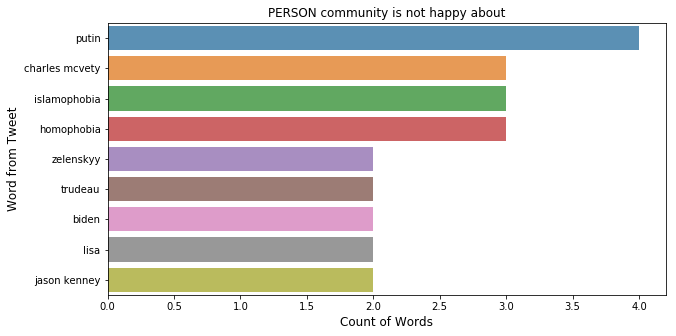

In [168]:
#Visualize topic 0 person
functions.visualize_entity(topic0_entities, 'PERSON', 10)

In [166]:
#related tweets
topic_0[topic_0['clean_text'].str.contains('charles mcvety')]['text'].head(1)

2237    Hi Minister @MacLeodLisa. This is day 4 of no response from you and I am still waiting. Lisa, will you commit to voting against Bill 213 that props up Charles McVety and his blatant hate, homophobia, and islamophobia? #onpoli #Nepean #Barrhaven
Name: text, dtype: object

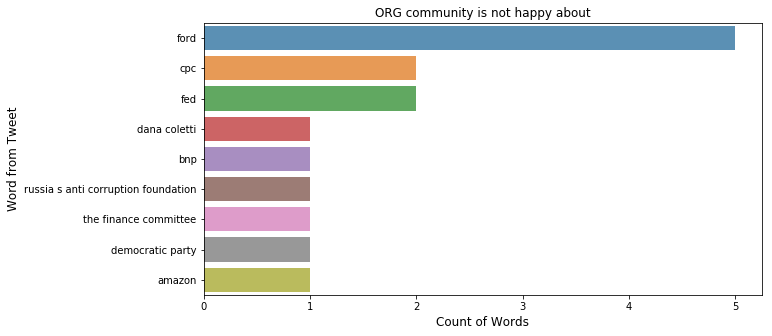

In [161]:
#Visualize topic 0 ORG
functions.visualize_entity(topic0_entities, 'ORG', 10)

In [162]:
#related tweets
ottawa_greivance_df[ottawa_greivance_df['clean_text'].str.contains('south africa')]['text'].head(1)

1898    UK claims that new COVID variant has origins in South Africa...which is incorrect. SA scientist were critical in helping discover new UK variant. #sciencecommunication matters.
Name: text, dtype: object

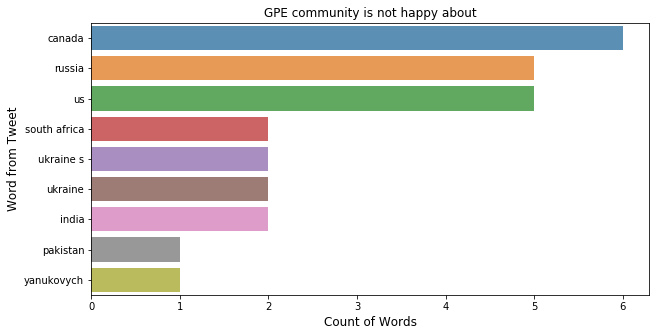

In [165]:
#Visualize topic 0 GPE
functions.visualize_entity(topic0_entities, 'GPE', 10)

It can be seen that the entities within each topic, do help elaborate on each topic. For example `hate` keyword from original topic can be associated with people not being happy about Charles McVety's islamophobia and homophobia. It must also be noted that in 1st visualization for `PERSON` entity islamophobia and homophobia have also been wrongly classified as `PERSON`. Hence, the identified entities must not be treated strictly as entities but rather sub key words within each topic that help analyze that topic further.

# Calgary
lat, long = 51.0272883,-114.3680132
radius = 100 km

In [179]:
#####################by geolocation and retweet filter of 25
#To allow for asynchronous loop
nest_asyncio.apply()
#Twint configs 
c = twint.Config()
#c.Search = "Shutterstock OR shutterstock"
c.Geo = "51.0272883,-114.3680132, 100 km"
#c.Near = "Vancouver"
c.Min_retweets = 25
#c.Filter_retweets = True
c.Limit = 10000
c.Pandas = True 
twint.run.Search(c)
tweets_df_calgary = twint.storage.panda.Tweets_df

In [180]:
tweets_df_calgary.shape

(3523, 38)

In [181]:
#Clean tweets
tweets_df_calgary_clean = functions.clean_tweets_df(tweets_df_calgary)

C:\Users\Anuroop\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Anuroop\Desktop\Capstone\project\functions.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  clean_df['date'] = clean_df['date'].apply(lambda x:
C:\Users\Anuroop\Desktop\Capstone\project\functions.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [188]:
#Verify
tweets_df_calgary_clean.shape

(3523, 7)

In [189]:
#Tweets vector
tweets_df_calgary_vectorized = functions.vectorize_no_prd_filter(tweets_df_calgary_clean['clean_text'])

In [190]:
#Predict labels
y_pred = optimized_log_reg.predict(tweets_df_calgary_vectorized)

In [192]:
#Add labels to original dataset
tweets_df_calgary_clean['label'] = y_pred

C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
#Extract greivances
calgary_greivance_df = tweets_df_calgary_clean[tweets_df_calgary_clean['label'] == 1]
calgary_greivance_df.shape

(1261, 8)

In [207]:
#Custom function to print n topics and return lda fit, greivance_vectorized
lda_fit, calgary_greivance_vectorized, calgary_topics_words = functions.lda_bagofwords_topics(calgary_greivance_df['clean_text'],10,200)

Topic #0 words: ['coal', 'cannot', 'also', 'companies', 'could', 'wrong', 'alberta', 'shit', 'going', 'months']
Topic #1 words: ['today', 'us', 'people', 'open', 'let', 'help', 'alberta', 'believe', 'get', 'one']
Topic #2 words: ['amp', 'health', 'year', 'alberta', 'care', 'mental', 'dollars', 'mental health', 'premier', 'longer']
Topic #3 words: ['canada', 'know', 'years', 'week', 'oil', 'canadian', 'state', 'company', 'said', 'tax']
Topic #4 words: ['calgary', 'would', 'alberta', 'kenney', 'jason', 'one', 'want', 'kids', 'jason kenney', 'people']
Topic #5 words: ['never', 'really', 'say', 'man', 'even', 'trying', 'people', 'right', 'see', 'trudeau']
Topic #6 words: ['trudeau', 'day', 'another', 'vote', 'every', 'money', 'million', 'government', 'canadians', 'billion']
Topic #7 words: ['get', 'last', 'still', 'going', 'already', 'amp', 'vaccine', 'end', 'call', 'pm']
Topic #8 words: ['like', 'amp', 'much', 'time', 'look', 'thought', 'ucp', 'well', 'would', 'first']
Topic #9 words: ['g

In [260]:
#Use custom function top return df with topic weights and dominant topic for each document
dominant_topics_df = functions.mapped_topics_df(calgary_greivance_vectorized, lda_fit)
display(dominant_topics_df.head())
display(dominant_topics_df.shape)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,5
Doc1,0.012507,0.012502,0.012501,0.012502,0.012500,0.012506,0.887482,0.012500,0.012501,0.012500,6
Doc2,0.335327,0.014286,0.014294,0.014286,0.014286,0.407515,0.157142,0.014286,0.014292,0.014287,5
Doc3,0.014286,0.315857,0.014288,0.014286,0.191959,0.014286,0.014288,0.392178,0.014286,0.014287,7
Doc4,0.011115,0.011112,0.011112,0.011114,0.011115,0.129357,0.011112,0.011115,0.486704,0.306144,8


(1261, 11)

In [261]:
#Mapping dominant topics back to greivance df
calgary_greivance_df['dominant_topic'] = dominant_topics_df['dominant_topic'].tolist()
calgary_greivance_df.head()

,text,date,hour,month,day,year,clean_text,label,dominant_topic
0,"We are asking for assistance to locate a missing man. Patrice Armino, 57, is 5’8"" tall, approximately 165 pounds, bald, with dark eyes. He typically wears glasses. He is known to frequent the Bridgeland and Riverfront areas. #missing #yyc @CanStopCrime https://t.co/iUgoOSI1zO https://t.co/Xwl8hZBwQS",2021-02-04,19,2,4,2021,we are asking for assistance to locate a missing man patrice armino is tall approximately pounds bald with dark eyes he typically wears glasses he is known to frequent the bridgeland and riverfront areas,1,5
2,2021 House of Reps epitomized: Masked-IT-security-guru-ousted-DNC-chair registering a proxy vote for a removed-by-impeachment-judge-turned-congressman to strip 30-days-new-duly-elected-member from committees because of her use of free speech as a citizen predating her election.,2021-02-04,19,2,4,2021,house of reps epitomized masked it security guru ousted dnc chair registering a proxy vote for a removed by impeachment judge turned congressman to strip days new duly elected member from committees because of her use of free speech as a citizen predating her election,1,6
3,This is getting dumber by the second ... Nobody voted for this shit. This is despotism. This is tyranny. I will never vote UCP again. NEVER!!! @jkenney https://t.co/dvrOo5URWe,2021-02-04,18,2,4,2021,this is getting dumber by the second nobody voted for this shit this is despotism this is tyranny i will never vote ucp again never,1,5
5,MSM is repugnant at the Hinshaw conference. All they can do is question re-opening over and over and over again no matter how low cases have dropped and how low they are in BC where restaurants are still open. Fearmongering pricks. Try living on CERB for awhile,2021-02-04,17,2,4,2021,msm is repugnant at the hinshaw conference all they can do is question re opening over and over and over again no matter how low cases have dropped and how low they are in bc where restaurants are still open fearmongering pricks try living on cerb for awhile,1,7
18,"""Two years ago, Kenney had a slogan: 'Jobs, economy, pipelines.' He has failed to deliver on any of them... He misread where the world is headed... he misread where Albertans want to head."" @jkenney: yesterday's man. #ableg https://t.co/PdkRjejluV",2021-02-04,15,2,4,2021,two years ago kenney had a slogan jobs economy pipelines he has failed to deliver on any of them he misread where the world is headed he misread where albertans want to head yesterday s man,1,8


## Compare Calgary and Ottawa topics

***Ottawa***
<br>Topic #0 words: ['like', 'paid', 'days', 'sick', 'still', 'trump', 'news', 'hate', 'bad', 'media']
<br>Topic #1 words: ['minister', 'trudeau', 'prime', 'prime minister', 'tax', 'scheer', 'country', 'cannot', 'government', 'justin']
<br>Topic #2 words: ['never', 'us', 'canadians', 'one', 'people', 'change', 'time', 'climate', 'make', 'many']
<br>Topic #3 words: ['covid', 'even', 'back', 'end', 'canada', 'today', 'work', 'war', 'vaccines', 'school']
<br>Topic #4 words: ['canada', 'says', 'week', 'time', 'new', 'next', 'much', 'election', 'last', 'doses']
<br>Topic #5 words: ['health', 'public', 'day', 'mental', 'mental health', 'mps', 'help', 'action', 'care', 'pandemic']
<br>Topic #6 words: ['ottawa', 'years', 'canadian', 'today', 'please', 'help', 'open', 'support', 'less', 'kids']
<br>Topic #7 words: ['ford', 'ontario', 'doug', 'doug ford', 'care', 'government', 'premier', 'long', 'term', 'amp']
<br>Topic #8 words: ['people', 'would', 'get', 'pm', 'going', 'vote', 'amp', 'keep', 'like', 'way']
<br>Topic #9 words: ['government', 'federal', 'want', 'federal government', 'liberal', 'lost', 'money', 'billion', 'provincial', 'year']

***Calgary***
<br>Topic #0 words: ['coal', 'cannot', 'also', 'companies', 'could', 'wrong', 'alberta', 'shit', 'going', 'months']
<br>Topic #1 words: ['today', 'us', 'people', 'open', 'let', 'help', 'alberta', 'believe', 'get', 'one']
<br>Topic #2 words: ['amp', 'health', 'year', 'alberta', 'care', 'mental', 'dollars', 'mental health', 'premier', 'longer']
<br>Topic #3 words: ['canada', 'know', 'years', 'week', 'oil', 'canadian', 'state', 'company', 'said', 'tax']
<br>Topic #4 words: ['calgary', 'would', 'alberta', 'kenney', 'jason', 'one', 'want', 'kids', 'jason kenney', 'people']
<br>Topic #5 words: ['never', 'really', 'say', 'man', 'even', 'trying', 'people', 'right', 'see', 'trudeau']
<br>Topic #6 words: ['trudeau', 'day', 'another', 'vote', 'every', 'money', 'million', 'government', 'canadians', 'billion']
<br>Topic #7 words: ['get', 'last', 'still', 'going', 'already', 'amp', 'vaccine', 'end', 'call', 'pm']
<br>Topic #8 words: ['like', 'amp', 'much', 'time', 'look', 'thought', 'ucp', 'well', 'would', 'first']
<br>Topic #9 words: ['government', 'back', 'work', 'please', 'federal', 'public', 'would', 'want', 'news', 'hard']

Just by looking at the topics from 2 cities, we do see a city specific flavor in each. Ottawa is the polictical center of Canada and modelled topics for Ottawa includes a lot of political/policy discussions like `paid sick days`, `climate`, `tax`.<br>Topics for Calgary include words like `coal`, `oil` which speak to it's nature of being the Canadian Oil and mining hub. Let's pull some tweets to represent these keywords. Let's look Calgary specific tweets.

In [286]:
#Calgary specific tweets
display(calgary_greivance_df[calgary_greivance_df['clean_text'].str.contains(' coal ')]['text'].head(2))
display(calgary_greivance_df[calgary_greivance_df['clean_text'].str.contains(' oil ')]['text'].head(2))

36     There's so much coal smoke and mirrors from @jkenney on this issue.  The truth is, it's very simple: unless the UCP reinstate the 1976 policy, the Eastern slopes are still under threat. "A mountaintop trimmed off is gone forever." #ableg  https://t.co/J8ppowFzJs   
126    "Kenney says an old policy that protected the Rockies for 45 years was obsolete and had been superseded by stronger rules".  Well, except for those pesky land categorizations that prevented open pit coal mining 🤔 #ableg #mountainsnotmines    https://t.co/SCcNK7Ei0y
Name: text, dtype: object

150    MIT ranks Canada #14 on green transition. Only oil producer ranked higher: Norway. Many of the lowest ranked countries are oil producers that compete with us for markets. So, tell me again why you want to block Cdn oil from global markets?  https://t.co/p6Wpahq5je
393    Jason Kenney is being sued by an oil company.   You can’t even make this up.   #Abpoli #Ableg #Alberta  https://t.co/XHTZHajust                                                                                                                                         
Name: text, dtype: object

In [294]:
#Calgary specific tweets
display(calgary_greivance_df[calgary_greivance_df['clean_text'].str.contains(' coal ')].head(3))
display(calgary_greivance_df[calgary_greivance_df['clean_text'].str.contains(' oil ')].head(4))

,text,date,hour,month,day,year,clean_text,label,dominant_topic
36,"There's so much coal smoke and mirrors from @jkenney on this issue. The truth is, it's very simple: unless the UCP reinstate the 1976 policy, the Eastern slopes are still under threat. ""A mountaintop trimmed off is gone forever."" #ableg https://t.co/J8ppowFzJs",2021-02-04,12,2,4,2021,there s so much coal smoke and mirrors from on this issue the truth is it is very simple unless the ucp reinstate the policy the eastern slopes are still under threat a mountaintop trimmed off is gone forever,1,8
126,"""Kenney says an old policy that protected the Rockies for 45 years was obsolete and had been superseded by stronger rules"". Well, except for those pesky land categorizations that prevented open pit coal mining 🤔 #ableg #mountainsnotmines https://t.co/SCcNK7Ei0y",2021-02-03,17,2,3,2021,kenney says an old policy that protected the rockies for years was obsolete and had been superseded by stronger rules well except for those pesky land categorizations that prevented open pit coal mining,1,0
135,Insanity. What do we think is going to be more valuable over the next couple decades... clean drinking water or coal? We're giving it away to Australian coal mining companies in return for few jobs. There are many reasons to vote Jason Kenney out... this is top of the list.,2021-02-03,15,2,3,2021,insanity what do we think is going to be more valuable over the next couple decades clean drinking water or coal we re giving it away to australian coal mining companies in return for few jobs there are many reasons to vote jason kenney out this is top of the list,1,0


,text,date,hour,month,day,year,clean_text,label,dominant_topic
150,"MIT ranks Canada #14 on green transition. Only oil producer ranked higher: Norway. Many of the lowest ranked countries are oil producers that compete with us for markets. So, tell me again why you want to block Cdn oil from global markets? https://t.co/p6Wpahq5je",2021-02-03,14,2,3,2021,mit ranks canada on green transition only oil producer ranked higher norway many of the lowest ranked countries are oil producers that compete with us for markets so tell me again why you want to block cdn oil from global markets,1,3
393,Jason Kenney is being sued by an oil company. You can’t even make this up. #Abpoli #Ableg #Alberta https://t.co/XHTZHajust,2021-02-01,22,2,1,2021,jason kenney is being sued by an oil company you can t even make this up,1,4
394,"Calgary oil company Prosper is suing the #ableg government for $400m, arguing public officials strung it along as it sought approval for its Rigel oil sands project while they worked behind the scenes to thwart the development. https://t.co/OCDeTiWncp #cdnecon #oott",2021-02-01,21,2,1,2021,calgary oil company prosper is suing the government for m arguing public officials strung it along as it sought approval for its rigel oil sands project while they worked behind the scenes to thwart the development,1,3
617,"I know that the #cdnmedia hates the oil and gas industry, but it is fascinating to see how much they generally hate small business and the airline industry too. If you work in any of those areas remember that it is ""journalists"" who are trying to destroy your livelihood. #cdnpoli",2021-01-31,13,1,31,2021,i know that the hates the oil and gas industry but it is fascinating to see how much they generally hate small business and the airline industry too if you work in any of those areas remember that it is journalists who are trying to destroy your livelihood,1,7


In [296]:
tweets_df_calgary.iloc[617]

cashtags           []                                                                                                                                                                                                                                                                                      
conversation_id    1355945863227469825                                                                                                                                                                                                                                                                     
created_at         1.61212e+12                                                                                                                                                                                                                                                                             
date               2021-01-31 13:27:40                                                              

Tweets above reprsent greivances of Oilfield workers or people related to Oilfield on slowing Oil & Gas and mining activities in Alberta. Now let's look at some common topics. Since both are Canadian cities, we do expect to have some common pain points between them.

In [271]:
#common keywords between ottawa and calgary
common_words = [x for x in ottawa_topic_words if x in calgary_topics_words]
print(', '.join(map(repr, common_words)))
print(f"\nCommon topic keywords between Calgary and Ottawa are: {len(common_words)} which is {round(len(common_words)/200*100,2)}% of total topics")

'like', 'still', 'news', 'trudeau', 'tax', 'cannot', 'government', 'never', 'us', 'canadians', 'one', 'people', 'time', 'even', 'back', 'end', 'canada', 'today', 'work', 'canada', 'week', 'time', 'much', 'last', 'health', 'public', 'day', 'mental', 'mental health', 'help', 'care', 'years', 'canadian', 'today', 'please', 'help', 'open', 'kids', 'care', 'government', 'premier', 'amp', 'people', 'would', 'get', 'pm', 'going', 'vote', 'amp', 'like', 'government', 'federal', 'want', 'money', 'billion', 'year'

Common topic keywords between Calgary and Ottawa are: 56 which is 28.0% of total topics


There are 28% common topics between the city. It seems that both cities are complaining about `government`, `premier`, `mental health`, `amp` among other issues. Let's extract some tweets from each df related to each of these keywrords.

In [287]:
#Mental health
display(calgary_greivance_df[calgary_greivance_df['clean_text'].str.contains('mental health')]['text'].head(3))
display(ottawa_greivance_df[ottawa_greivance_df['clean_text'].str.contains('mental health')]['text'].head(3))

257     Me: a mental health provider who gave away $135k in services last year b/c mental health is in crisis &amp; our gov is doing nothing.  @ucpcaucus: let’s tweet about mental health &amp; how important it is while providing no meaningful funding to address the crisis.  #ResignKenney
751     Hockey Canada: Support Athletes Mental health Give 20 year old's another year to play Hockey - Sign the Petition!  https://t.co/G1MjQ8lh70 via @CdnChange  @HockeyCanada @CHLHockey @cjhlhockey @NHL                                                                                    
1033    Far outside of my comfort zone but mental health conversations and education needs to continue past today #BellLetsTalk  https://t.co/dxhWxykYNN                                                                                                                                        
Name: text, dtype: object

65      What Drummond fails to recognize is firearms are a distant 3rd in preferred method of suicide and account for between 13-16% overall. If it was REALLY about reducing suicide he’d be advocating for mental health resources not gun bans. 🇨🇦🤷🏼‍♀️ all suicides matter #988Now        
315     What @OttawaHealth says need to change given what we've learned during the pandemic:  * Better pay, benefits for LTC workers. * Expand OHIP to cover mental health, addiction. * Cultural sensitivity training for health-care providers. * Paid sick leave.   https://t.co/nzPRZPCv6P
1031    JUST IN: Bell reports a record 159,173,435 interactions for #BellLetsTalk. Bell will donate $7,958,671.75 to mental health initiatives.                                                                                                                                               
Name: text, dtype: object

# Project Conclusion
Classification model has shown good accuracy on classifying tweets from cities. However, the model is fairly naive as it looks for certain words and sequences that it picked from train dataset and hence gets confused with sarcasm and in certain other cases where negative words but the context is positive. It can be improved further by adding semantics. Overall the model does a good job classifying most negative/greivance tweets.<br>Topic modelling with CountVectorizer does a good job identifying key words that are representative of community greivances and does give user a glimpse. However, a lot of manual inspection is still needed to completely understand the keywords and the labelled tweets have to be revisited which defeats the purpose of extracting a summary of greivances of from labelled tweets. This problem can be addressed by employing a text summarization model.<br>Also this analysis must be exteneded to other social media platforms like reddit, quora etc., as well, as we have seen from tweets patterns from 2 Canadian cities that there are not enough tweets with a retweet filter of 25. Moving the filter any lower will just add tweets that do not convey much meaning and just add noise to the model. Hence, the dataset must be enriched by collecting data from other sources as well.